# Combine_all_in_one_Report

Name - Yash Panchal

NUID - 002771456

Git Link - https://github.com/panchalyash218/INFO6105

# Abstract
The dataset we have is from Kaggle. It has about 267,000 observations (number of apps) and 13 variables(number of characteristics for each app). This information is scraped from Google Play Store. Our target variable is “Installs” (number of installation), which we consider as a proxy for the popularity of an app. The remaining 12 variables basically cover all the important information that users will pay attention to on each app in the Google app store, including category, price, ratings, reviews, version, etc. So we can predict the number of installations of an app based on them.

# Data Set
The Data set consist of :

>It has about 267,000 observations (number of apps) and 13 variables(number of characteristics for each app)

>Installs column - is an Target Variable (Dependent Variable)

>Rest 12 column acts as Independent Variable

# Importing the Libraries

In [ ]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=c0b1f7c5ad04eb839e37ba5d1b374c62c9dd269784986d815ceaab76f4afd528
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

In [ ]:
#initializing the h2o library
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4ha8l3is
  JVM stdout: /tmp/tmp4ha8l3is/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4ha8l3is/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_guduun
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

# What question are you trying to answer? How did you frame it as an ML task?
--Here I am trying to predict what features gives an app to increase its installs.

--The Installs Column is represented by a integer value. This is a classical Regression problem. But if we look at other Column they contain categorical value which makes it difficult to use regression method. Hence, we use one hot encoding on some of the column which is required in our analysis.

# Importing Data

In [ ]:
# Reading Data into Pandas Dataframe
Google_Play_Store = pd.read_csv(
    "https://raw.githubusercontent.com/panchalyash218/INFO6105/main/googleplaystore.csv"
)  # Reading CSV file into Pandas DataFrame

# Exploratory Data Analysis

# Removing Unwanted Columns

In [ ]:
Google_Play_Store.drop(['App', 'Last Updated','Current Ver','Android Ver','Genres','Price'], axis=1, inplace=True)
Google_Play_Store.head()

Category  Rating Reviews  Size     Installs  Type Content Rating
0  ART_AND_DESIGN     4.1     159   19M      10,000+  Free       Everyone
1  ART_AND_DESIGN     3.9     967   14M     500,000+  Free       Everyone
2  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free       Everyone
3  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free           Teen
4  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free       Everyone

# Checking Data Type

In [ ]:
Google_Play_Store.dtypes

Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Content Rating     object
dtype: object

# Converting the Datatype of the columns

As in the main data frame name of the column 'Content Rating' have space so by writing below code remove the space between the words and renaming the column with 'Content_Rating'

In [ ]:
# Rename the columns by replacing spaces with underscores
Google_Play_Store = Google_Play_Store.rename(columns={'Content Rating': 'Content_Rating'})
# Print the updated column names
print(Google_Play_Store.columns)

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Content_Rating'],
      dtype='object')


In [ ]:
Google_Play_Store['Rating'] = Google_Play_Store['Rating'].astype(float)

In [ ]:
#Converting the Review column datatype from object to int64
Google_Play_Store['Reviews'] = pd.to_numeric(Google_Play_Store.Reviews,errors='coerce').fillna(0).astype(np.int64)

In [ ]:
#Converting the Size column datatype from object to int64
Google_Play_Store['Size'] = Google_Play_Store['Size'].str.replace('M','000000',regex=True)
Google_Play_Store['Size'] = Google_Play_Store['Size'].str.replace('k','000',regex=True)
Google_Play_Store['Size'] = pd.to_numeric(Google_Play_Store.Size,errors='coerce').fillna(0).astype(np.int64)

In [ ]:
#Converting the Installs column datatype from object to int64
Google_Play_Store['Installs'] = Google_Play_Store['Installs'].str.replace('+','',regex=True)
Google_Play_Store['Installs'] = Google_Play_Store['Installs'].str.replace(',','',regex=True)
Google_Play_Store['Installs'] = pd.to_numeric(Google_Play_Store.Installs,errors='coerce').fillna(0).astype(np.int64)

As the column 'Type' and 'Content_Rating' had object has datatype and contained character value so applying One Hot Encoding on it.

In [ ]:
# perform one hot encoding on the 'Color' and 'Size' columns
encoded_df = pd.get_dummies(Google_Play_Store, columns=['Type','Content_Rating'])

new_df = encoded_df
# concatenate the encoded columns with the remaining columns in the original DataFrame
# new_df = pd.concat([Google_Playstore_Apps.drop(['Type','Content_Rating'], axis=1), encoded_df], axis=1)

# set the index of the new DataFrame to the original index
new_df.set_index(Google_Play_Store.index, inplace=True)

# display the new DataFrame
print(new_df)

                  Category  Rating  Reviews      Size  Installs  Type_0  \
0           ART_AND_DESIGN     4.1      159  19000000     10000       0   
1           ART_AND_DESIGN     3.9      967  14000000    500000       0   
2           ART_AND_DESIGN     4.7    87510         8   5000000       0   
3           ART_AND_DESIGN     4.5   215644  25000000  50000000       0   
4           ART_AND_DESIGN     4.3      967         2    100000       0   
...                    ...     ...      ...       ...       ...     ...   
10836               FAMILY     4.5       38  53000000      5000       0   
10837               FAMILY     5.0        4         3       100       0   
10838              MEDICAL     NaN        3         9      1000       0   
10839  BOOKS_AND_REFERENCE     4.5      114         0      1000       0   
10840            LIFESTYLE     4.5   398307  19000000  10000000       0   

       Type_Free  Type_Paid  Content_Rating_Adults only 18+  \
0              1          0         

As the Column 'Category' had lot of Unique values in it and was difficult to perform one hot encoding to it as it made a lot of new column so tried using cat.codes on it.

Reference https://datascience.stackexchange.com/questions/79636/how-to-play-with-cat-codes-and-get-dummies

In [ ]:
##############CAT CODES for CATEGORY##########################
new_df['CategoryCode'] = new_df['Category'].astype('category').cat.codes

In [ ]:
new_df.drop(['Category'], axis=1, inplace=True)

In [ ]:
new_df.head()

Rating  Reviews      Size  Installs  Type_0  Type_Free  Type_Paid  \
0     4.1      159  19000000     10000       0          1          0   
1     3.9      967  14000000    500000       0          1          0   
2     4.7    87510         8   5000000       0          1          0   
3     4.5   215644  25000000  50000000       0          1          0   
4     4.3      967         2    100000       0          1          0   

   Content_Rating_Adults only 18+  Content_Rating_Everyone  \
0                               0                        1   
1                               0                        1   
2                               0                        1   
3                               0                        0   
4                               0                        1   

   Content_Rating_Everyone 10+  Content_Rating_Mature 17+  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Content_Rating_Teen  Content_Rating_Unrated  CategoryCode  
0                    0                       0             1  
1                    0                       0             1  
2                    0                       0             1  
3                    1                       0             1  
4                    0                       0             1

In [ ]:
# Checking Data Type of each variable
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rating                          9367 non-null   float64
 1   Reviews                         10841 non-null  int64  
 2   Size                            10841 non-null  int64  
 3   Installs                        10841 non-null  int64  
 4   Type_0                          10841 non-null  uint8  
 5   Type_Free                       10841 non-null  uint8  
 6   Type_Paid                       10841 non-null  uint8  
 7   Content_Rating_Adults only 18+  10841 non-null  uint8  
 8   Content_Rating_Everyone         10841 non-null  uint8  
 9   Content_Rating_Everyone 10+     10841 non-null  uint8  
 10  Content_Rating_Mature 17+       10841 non-null  uint8  
 11  Content_Rating_Teen             10841 non-null  uint8  
 12  Content_Rating_Unrated          

In [ ]:
# Checking for any null values in the dataset
new_df.isnull().sum()

Rating                            1474
Reviews                              0
Size                                 0
Installs                             0
Type_0                               0
Type_Free                            0
Type_Paid                            0
Content_Rating_Adults only 18+       0
Content_Rating_Everyone              0
Content_Rating_Everyone 10+          0
Content_Rating_Mature 17+            0
Content_Rating_Teen                  0
Content_Rating_Unrated               0
CategoryCode                         0
dtype: int64

Removing null values from Rating column

In [ ]:
new_df = new_df.dropna(subset=['Rating'])

In [ ]:
# Checking for any null values in the dataset
new_df.isnull().sum()

Rating                            0
Reviews                           0
Size                              0
Installs                          0
Type_0                            0
Type_Free                         0
Type_Paid                         0
Content_Rating_Adults only 18+    0
Content_Rating_Everyone           0
Content_Rating_Everyone 10+       0
Content_Rating_Mature 17+         0
Content_Rating_Teen               0
Content_Rating_Unrated            0
CategoryCode                      0
dtype: int64

In [ ]:
# Shape of the dataframe - Here, we have 9376 samples of data with 14 predictors and 1 result
new_df.shape

(9367, 14)

In [ ]:
columns = list(new_df.columns)
print(columns)  # Name of all predictors and result

['Rating', 'Reviews', 'Size', 'Installs', 'Type_0', 'Type_Free', 'Type_Paid', 'Content_Rating_Adults only 18+', 'Content_Rating_Everyone', 'Content_Rating_Everyone 10+', 'Content_Rating_Mature 17+', 'Content_Rating_Teen', 'Content_Rating_Unrated', 'CategoryCode']


Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.43it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
cauchy          0.300181   1114.234850 -96914.417762     inf      0.109822   
norm            0.703998  21086.539679 -88930.068388     inf      0.157116   
lognorm         0.709511  18934.273230 -88847.854591     inf      0.158153   
gamma           0.800147  12503.287319 -87721.764330     inf      0.174553   
chi2            0.879089   8858.910043 -86840.413367     inf      0.167259   

             ks_pvalue  
cauchy    7.572883e-99  
norm     1.994827e-202  
lognorm  4.073923e-205  
gamma    4.507322e-250  
chi2     1.623842e-229  


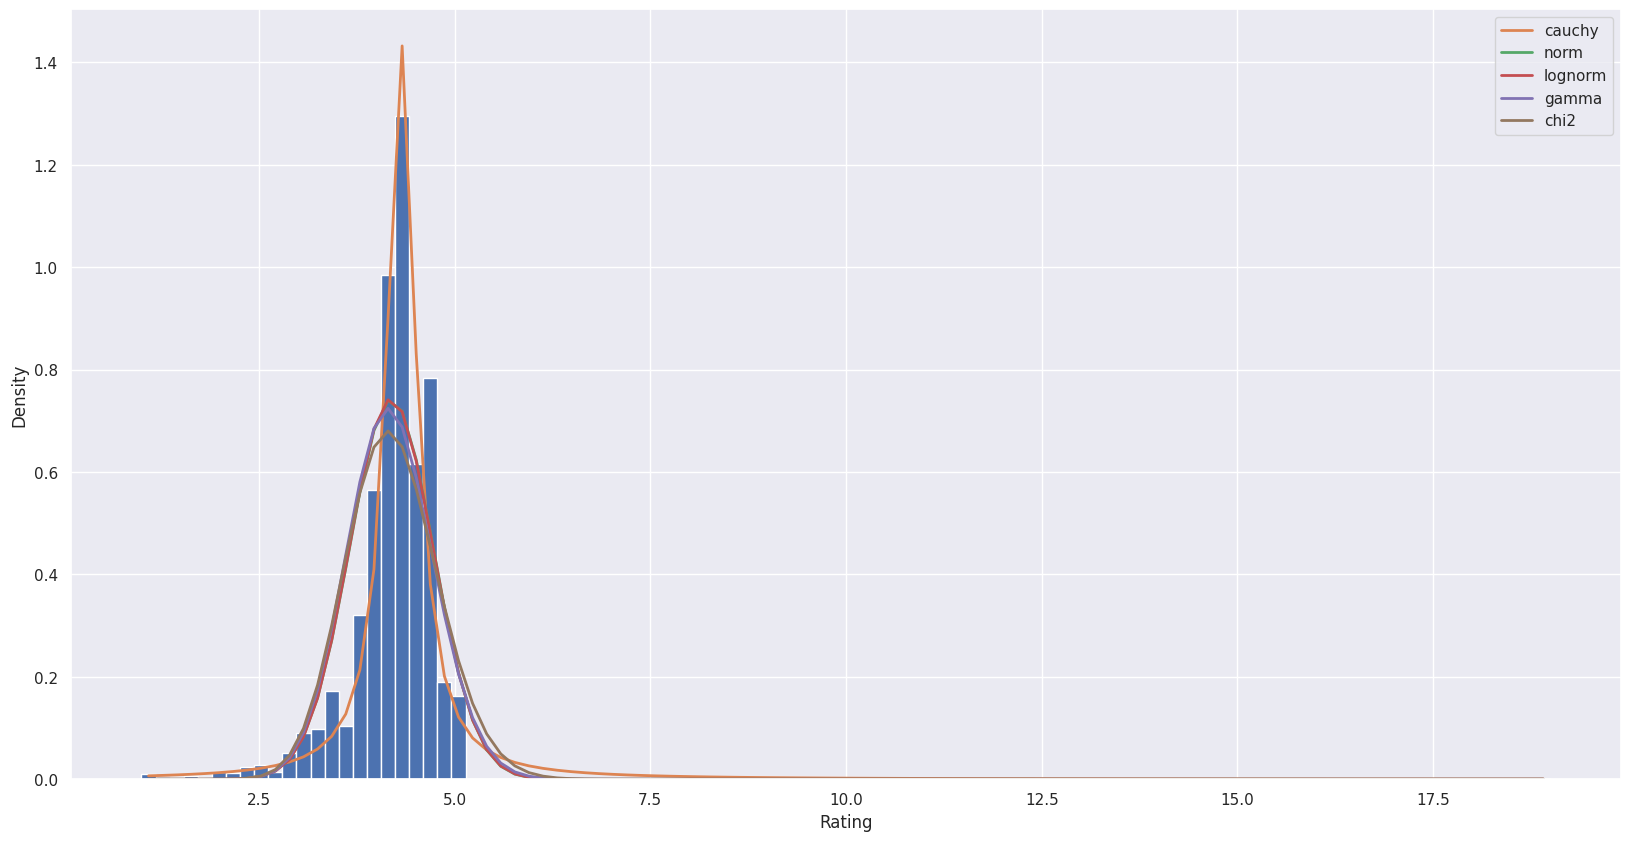

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


          sumsquare_error           aic            bic  kl_div  ks_statistic  \
expon        9.262248e-14  17840.039025 -366748.399463     inf      0.611214   
chi2         9.016350e-13   4465.392784 -345422.980203     inf      0.205515   
exponpow     9.761358e-13   4016.318901 -344679.316079     inf      0.298327   
rayleigh     1.029748e-12  23175.733135 -344187.630840     inf      0.474980   
powerlaw     1.036588e-12   3920.054911 -344116.470037     inf      0.291238   

          ks_pvalue  
expon           0.0  
chi2            0.0  
exponpow        0.0  
rayleigh        0.0  
powerlaw        0.0  


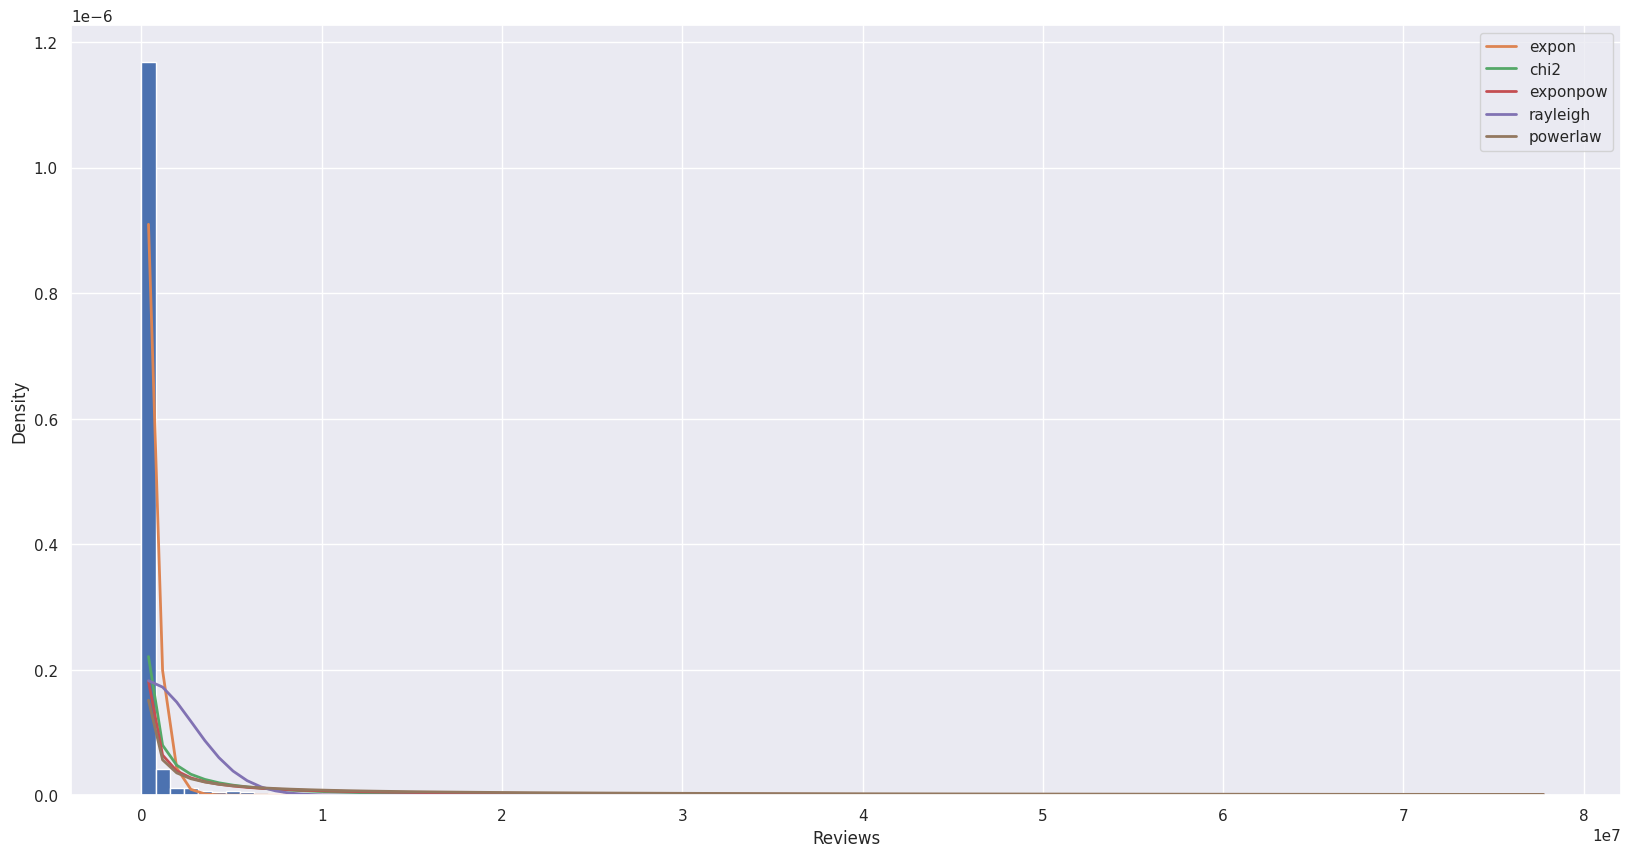

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.43it/s]


          sumsquare_error          aic            bic  kl_div  ks_statistic  \
cauchy       4.206792e-14  4605.068884 -374141.271717     inf      0.487573   
gamma        1.157872e-13  4151.815851 -364648.334282     inf      0.479899   
exponpow     1.184353e-13  4081.501562 -364436.516327     inf      0.415344   
lognorm      2.072761e-13  4592.399581 -359193.950108     inf      0.473985   
expon        2.257346e-13  3913.076503 -358404.014656     inf      0.484253   

          ks_pvalue  
cauchy          0.0  
gamma           0.0  
exponpow        0.0  
lognorm         0.0  
expon           0.0  


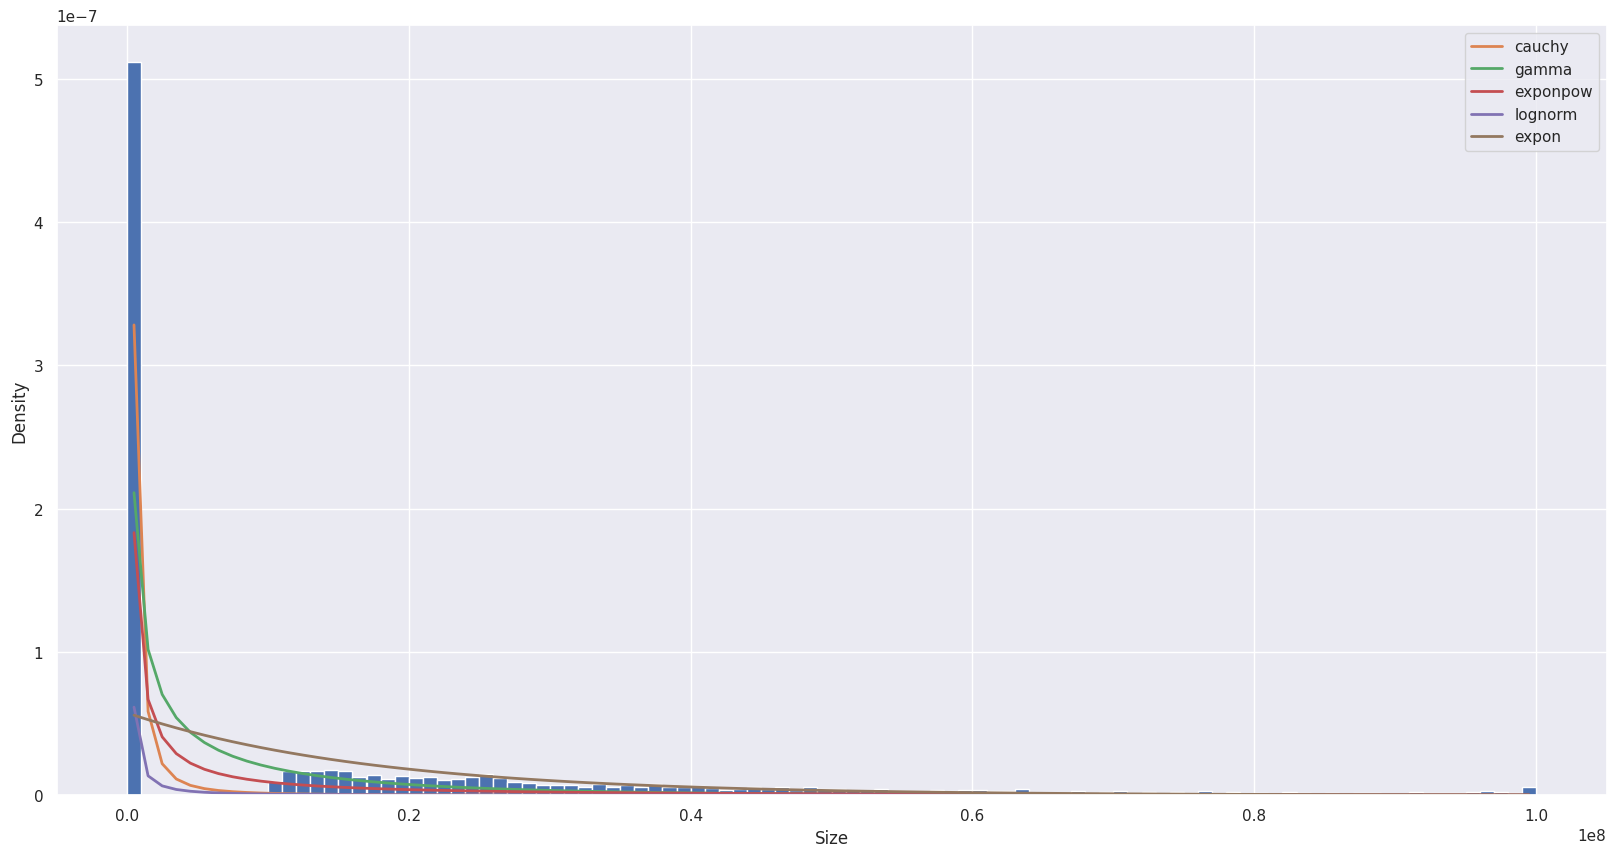

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


          sumsquare_error          aic            bic  kl_div  ks_statistic  \
expon        1.675567e-15  8931.999005 -404332.364739     inf      0.643315   
gamma        3.341139e-15  5198.642030 -397858.491557     inf      0.207603   
chi2         3.854339e-15  4613.595877 -396520.059947     inf      0.273005   
lognorm      3.994797e-15  4760.456893 -396184.784986     inf      0.102812   
exponpow     4.091085e-15  4481.840306 -395961.687818     inf      0.353866   

             ks_pvalue  
expon     0.000000e+00  
gamma     0.000000e+00  
chi2      0.000000e+00  
lognorm   1.172453e-86  
exponpow  0.000000e+00  


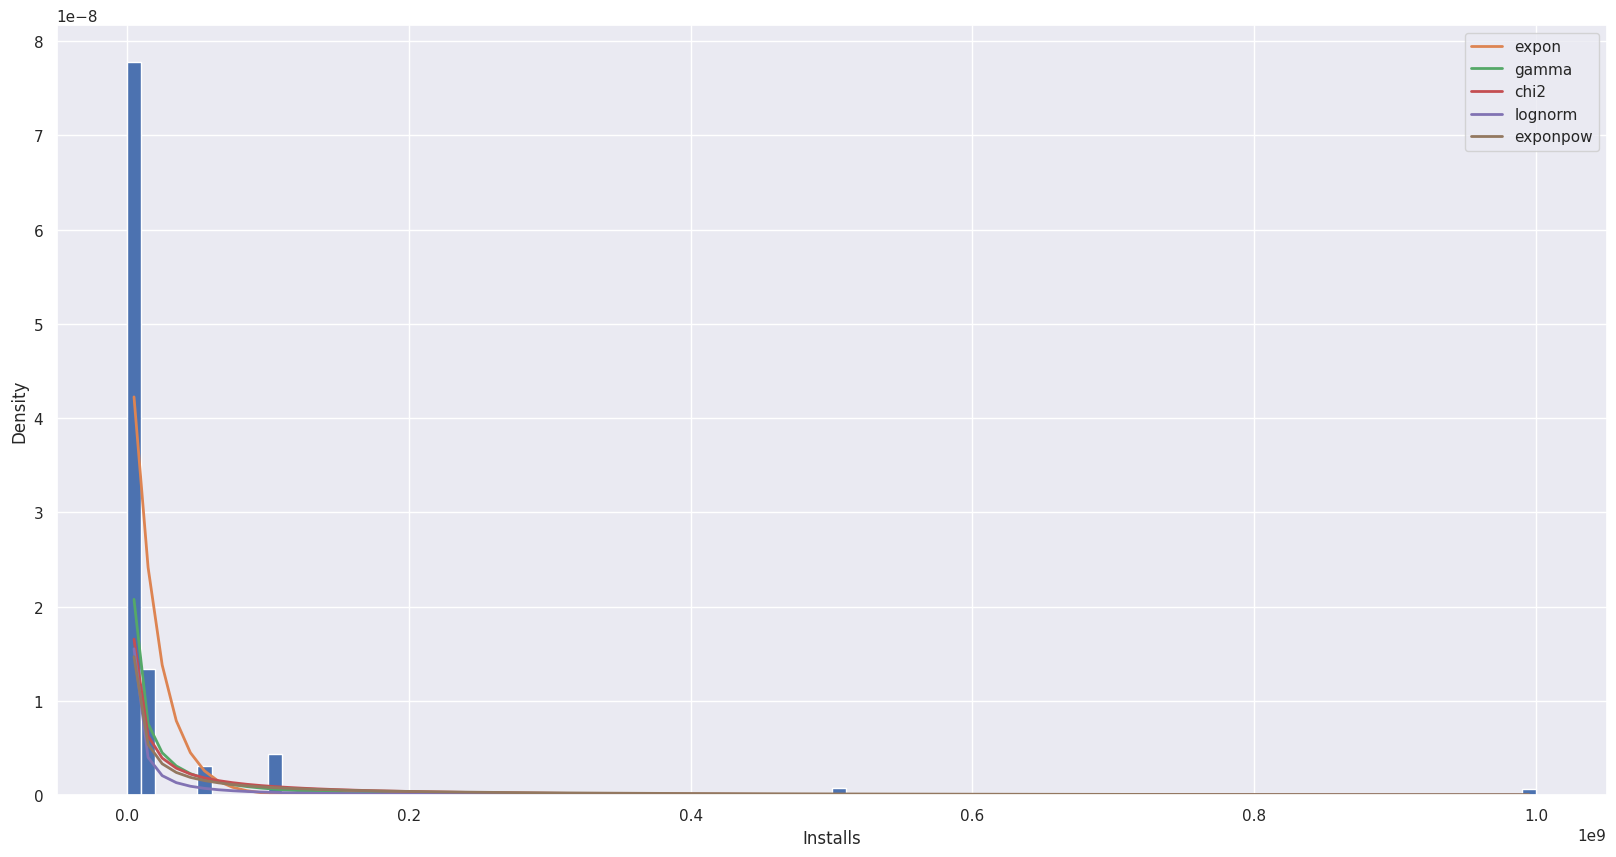

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.09it/s]


          sumsquare_error            aic           bic  kl_div  ks_statistic  \
rayleigh      2867.610094  317109.241983 -11069.558309     inf      0.609565   
chi2          3356.256367    4991.008127  -9586.542016     inf      0.999893   
norm          4477.862040  311432.145774  -6894.997898     inf      0.504015   
exponpow      5877.740231    1382.591224  -4337.779186     inf      0.999893   
uniform       9897.865073       4.000000    534.657109     inf      0.999893   

          ks_pvalue  
rayleigh        0.0  
chi2            0.0  
norm            0.0  
exponpow        0.0  
uniform         0.0  


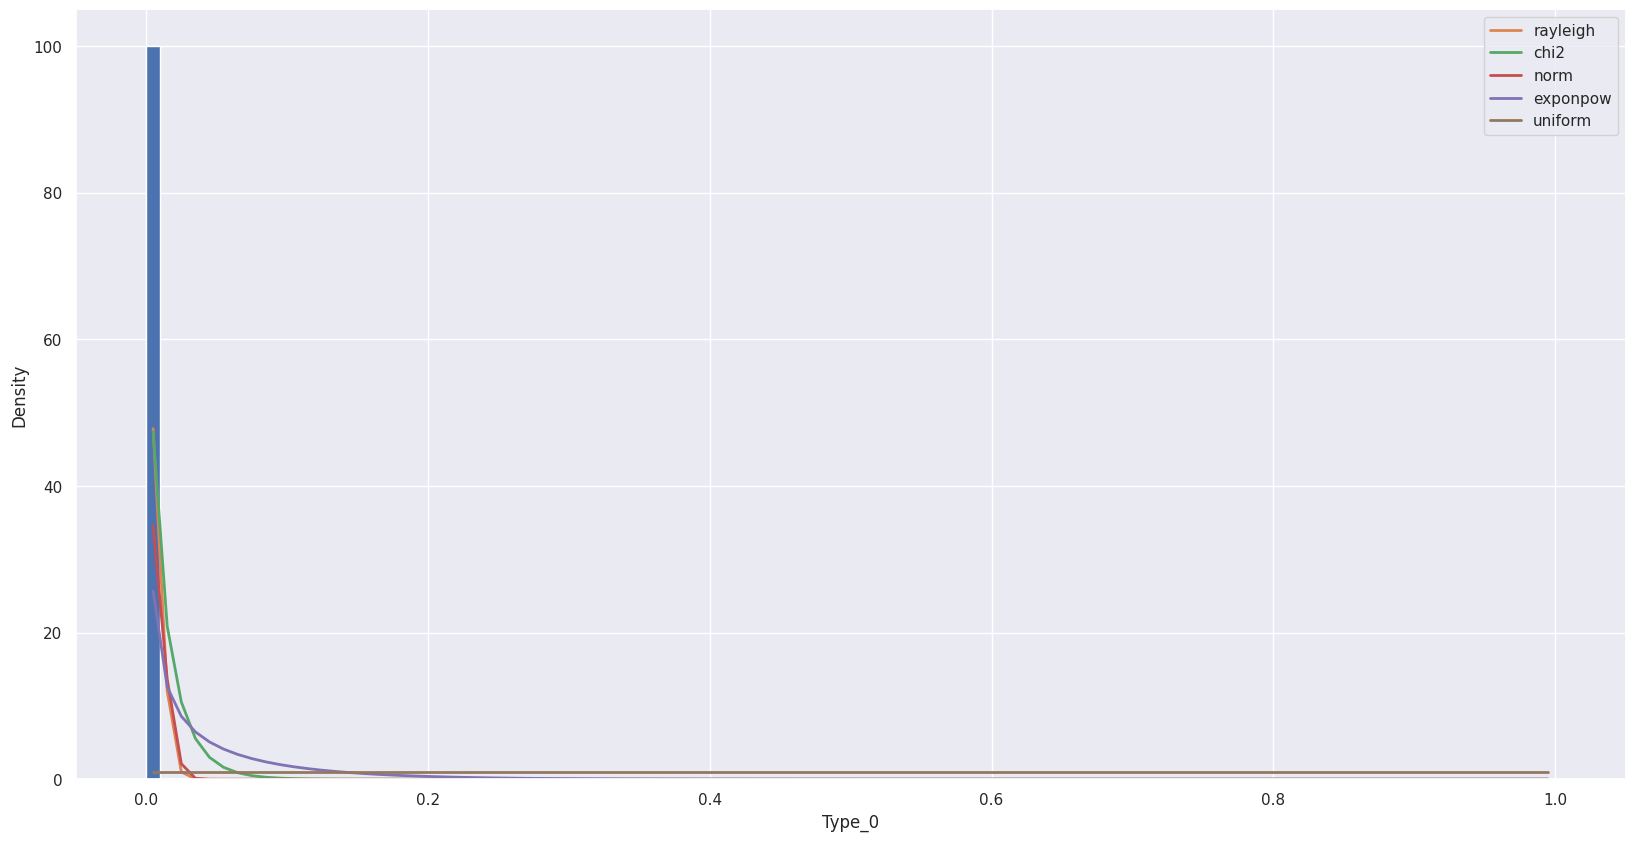

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.56it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow      7642.764839  956.780969 -1878.126250     inf      0.656637   
norm          8500.912824  331.152433  -890.490125     inf      0.538247   
lognorm       8501.818454  331.597195  -880.347333     inf      0.541105   
chi2          8525.054394  286.759498  -854.781724     inf      0.533422   
uniform       8612.134116    4.000000  -768.732204     inf      0.930821   

          ks_pvalue  
exponpow        0.0  
norm            0.0  
lognorm         0.0  
chi2            0.0  
uniform         0.0  


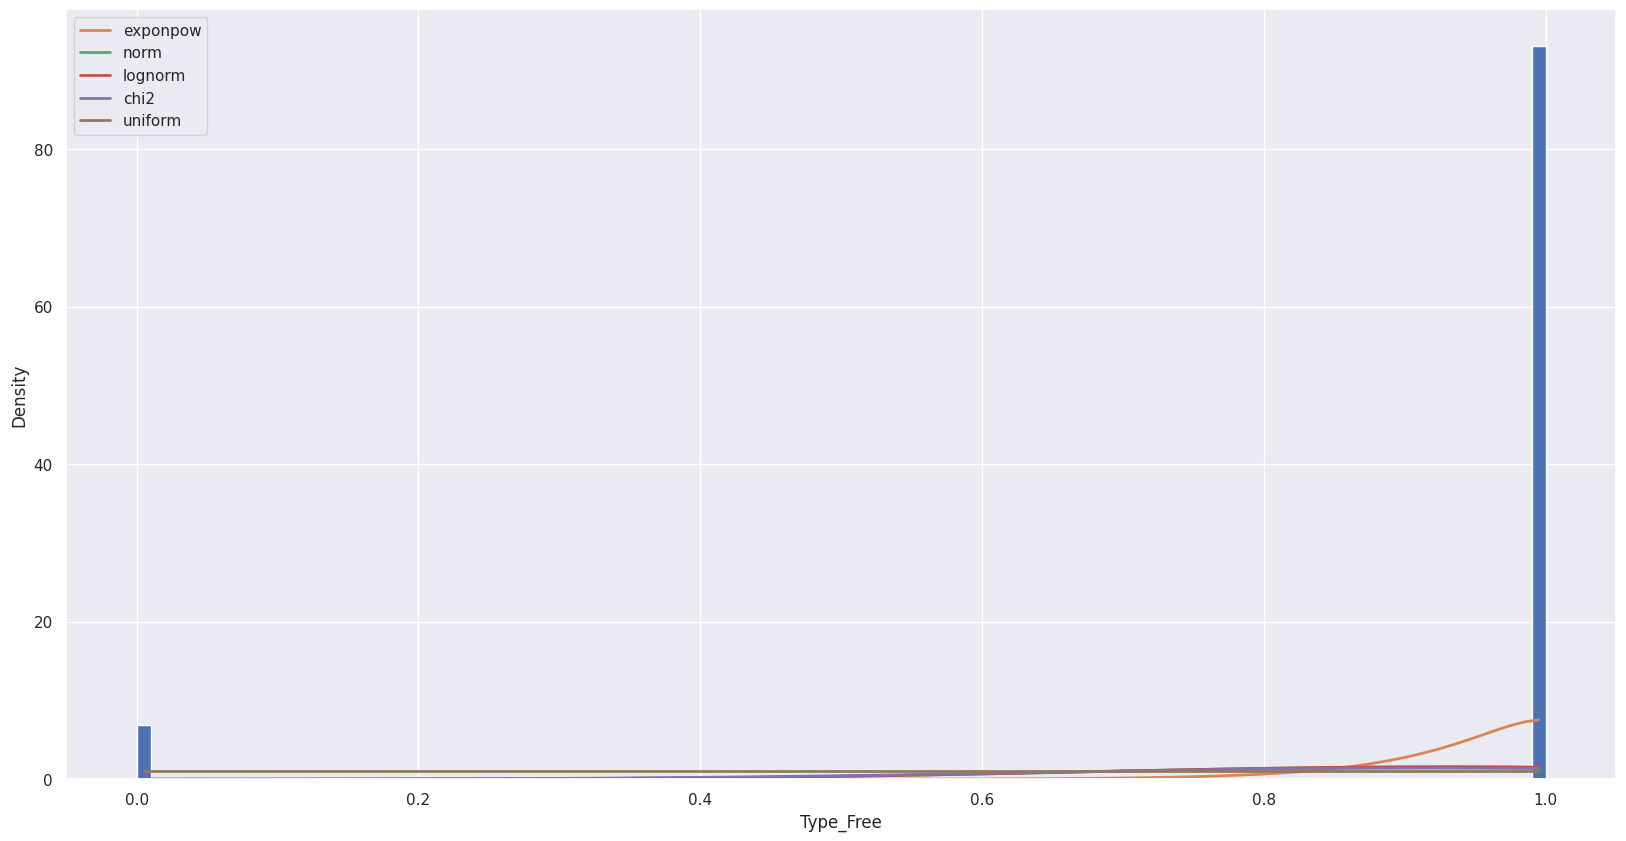

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.04it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
expon         6928.041135  917.238515 -2806.944979     inf      0.930928   
gamma         7105.730977  137.715640 -2560.585163     inf      0.930928   
chi2          7772.165888  101.521170 -1720.859490     inf      0.930928   
exponpow      8023.738383  608.661556 -1422.468365     inf      0.841016   
rayleigh      8431.518798  362.529945  -967.267932     inf      0.622766   

          ks_pvalue  
expon           0.0  
gamma           0.0  
chi2            0.0  
exponpow        0.0  
rayleigh        0.0  


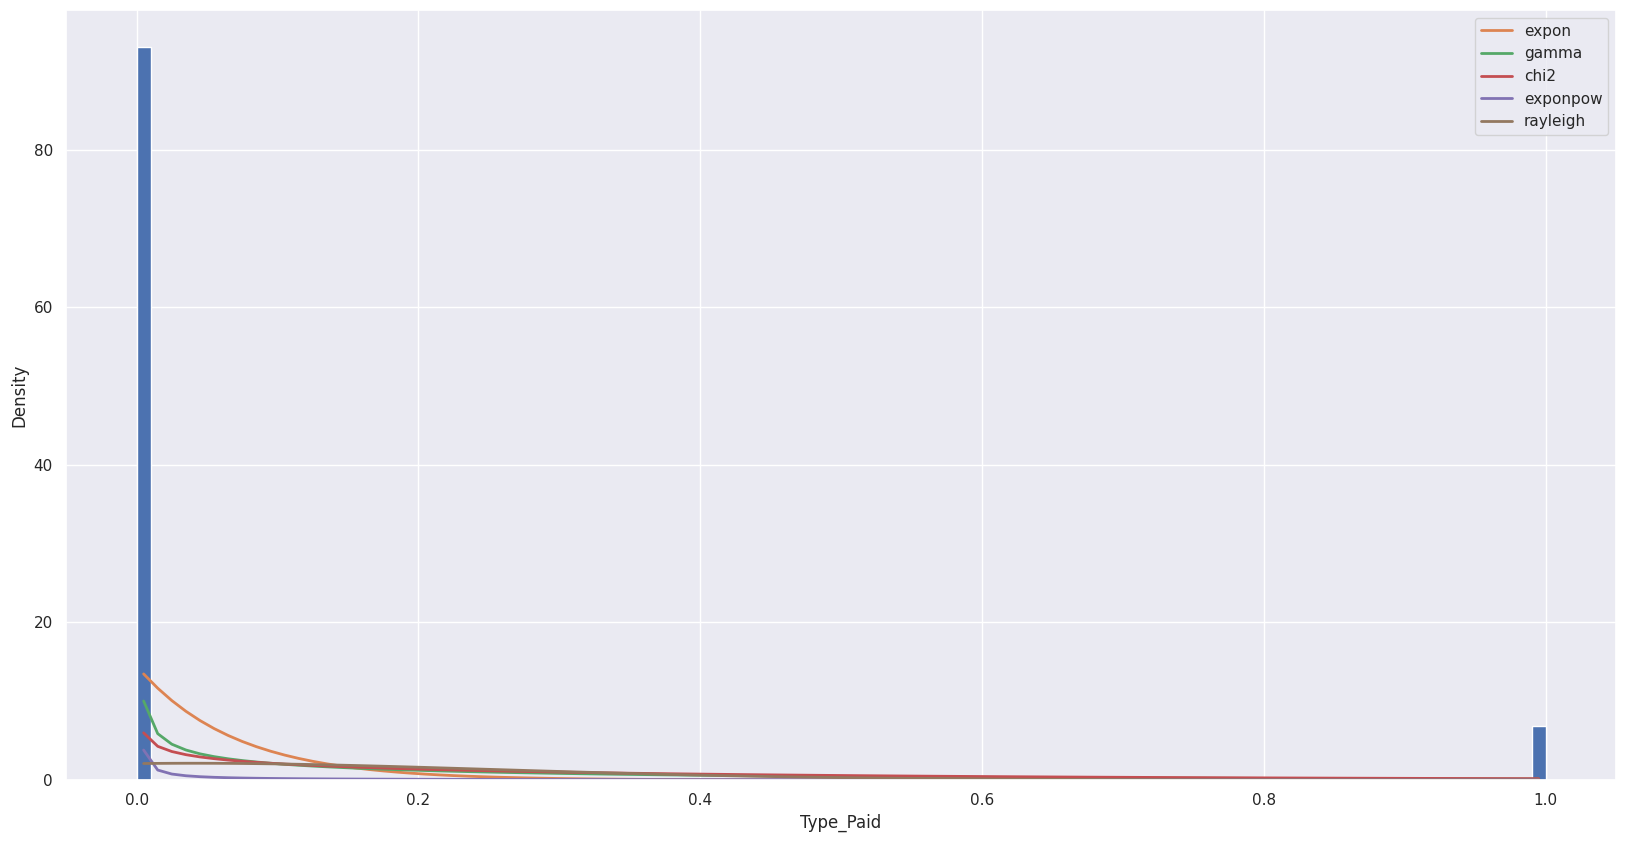

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.95it/s]


          sumsquare_error            aic          bic  kl_div  ks_statistic  \
chi2          4883.006668    2704.513300 -6074.526111     inf      0.999680   
rayleigh      5131.283198  106446.038467 -5619.118316     inf      0.611662   
norm          6490.407046  103391.641100 -3418.159162     inf      0.506820   
exponpow      6902.345236    3358.611617 -2832.606544     inf      0.999680   
uniform       9893.596586       4.000000   530.616688     inf      0.999680   

          ks_pvalue  
chi2            0.0  
rayleigh        0.0  
norm            0.0  
exponpow        0.0  
uniform         0.0  


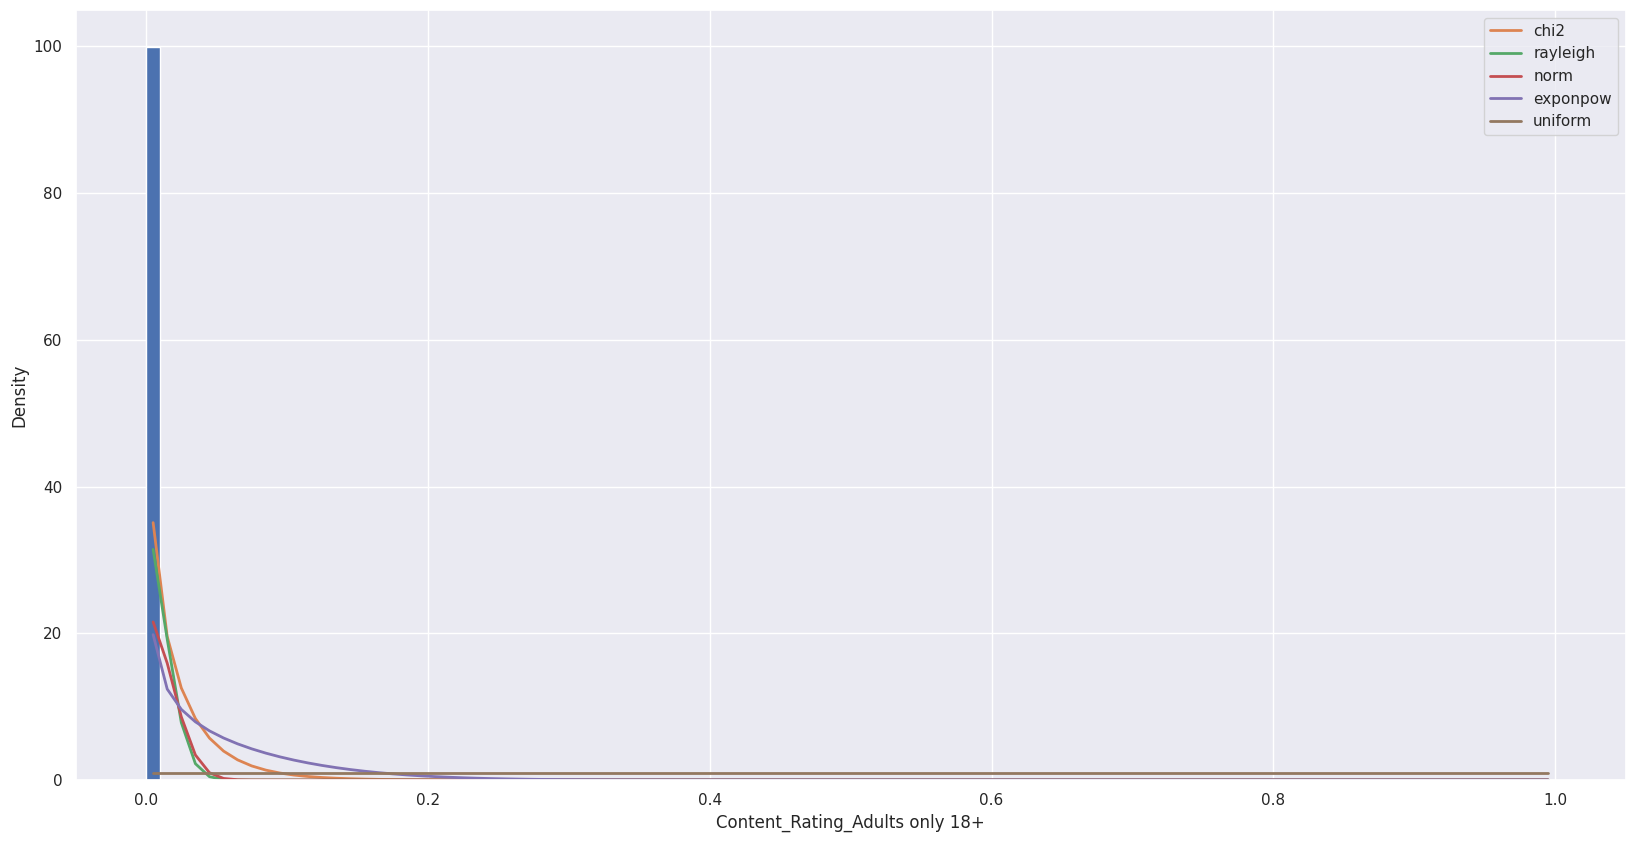

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.92it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow      6383.654536  254.810624 -3564.361253     inf      0.551640   
chi2          6595.134994  101.811010 -3259.076575     inf      0.526944   
uniform       6606.946306    4.000000 -3251.461046     inf      0.792143   
lognorm       6616.027444  112.503080 -3229.450152     inf      0.486235   
norm          6616.280415  109.837289 -3238.236950     inf      0.487904   

          ks_pvalue  
exponpow        0.0  
chi2            0.0  
uniform         0.0  
lognorm         0.0  
norm            0.0  


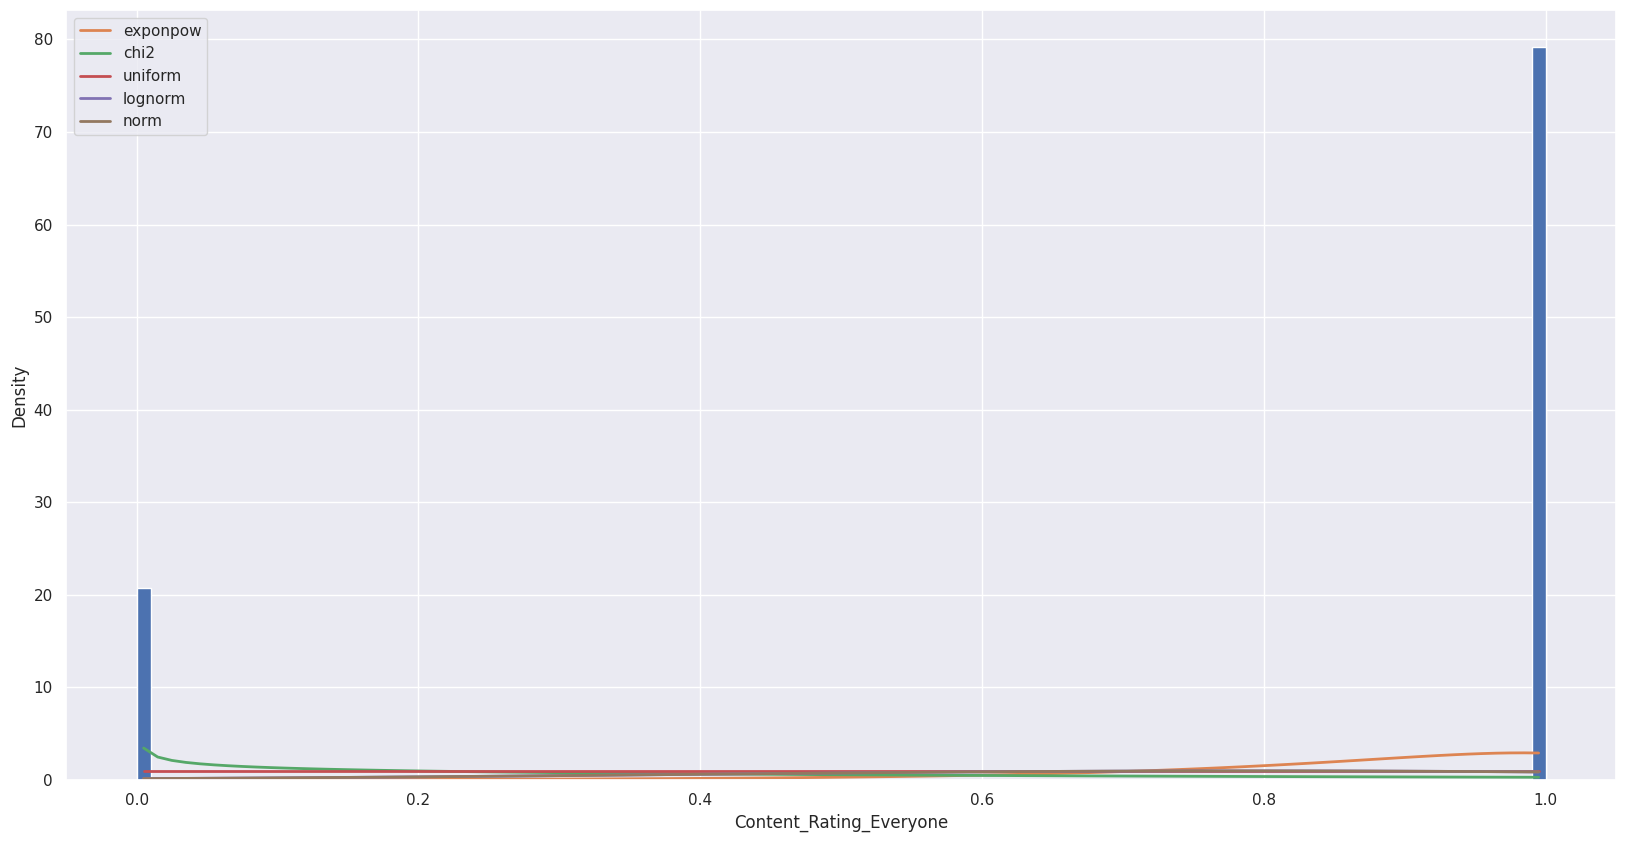

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.33it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon         6341.084711  1731.243469 -3636.179869     inf      0.957617   
gamma         6521.915692   228.797190 -3363.650741     inf      0.957617   
exponpow      7554.816957   133.866853 -1986.540473     inf      0.957617   
chi2          8174.504346   123.008210 -1248.095678     inf      0.957617   
rayleigh      8800.088012   655.739508  -566.502700     inf      0.629949   

          ks_pvalue  
expon           0.0  
gamma           0.0  
exponpow        0.0  
chi2            0.0  
rayleigh        0.0  


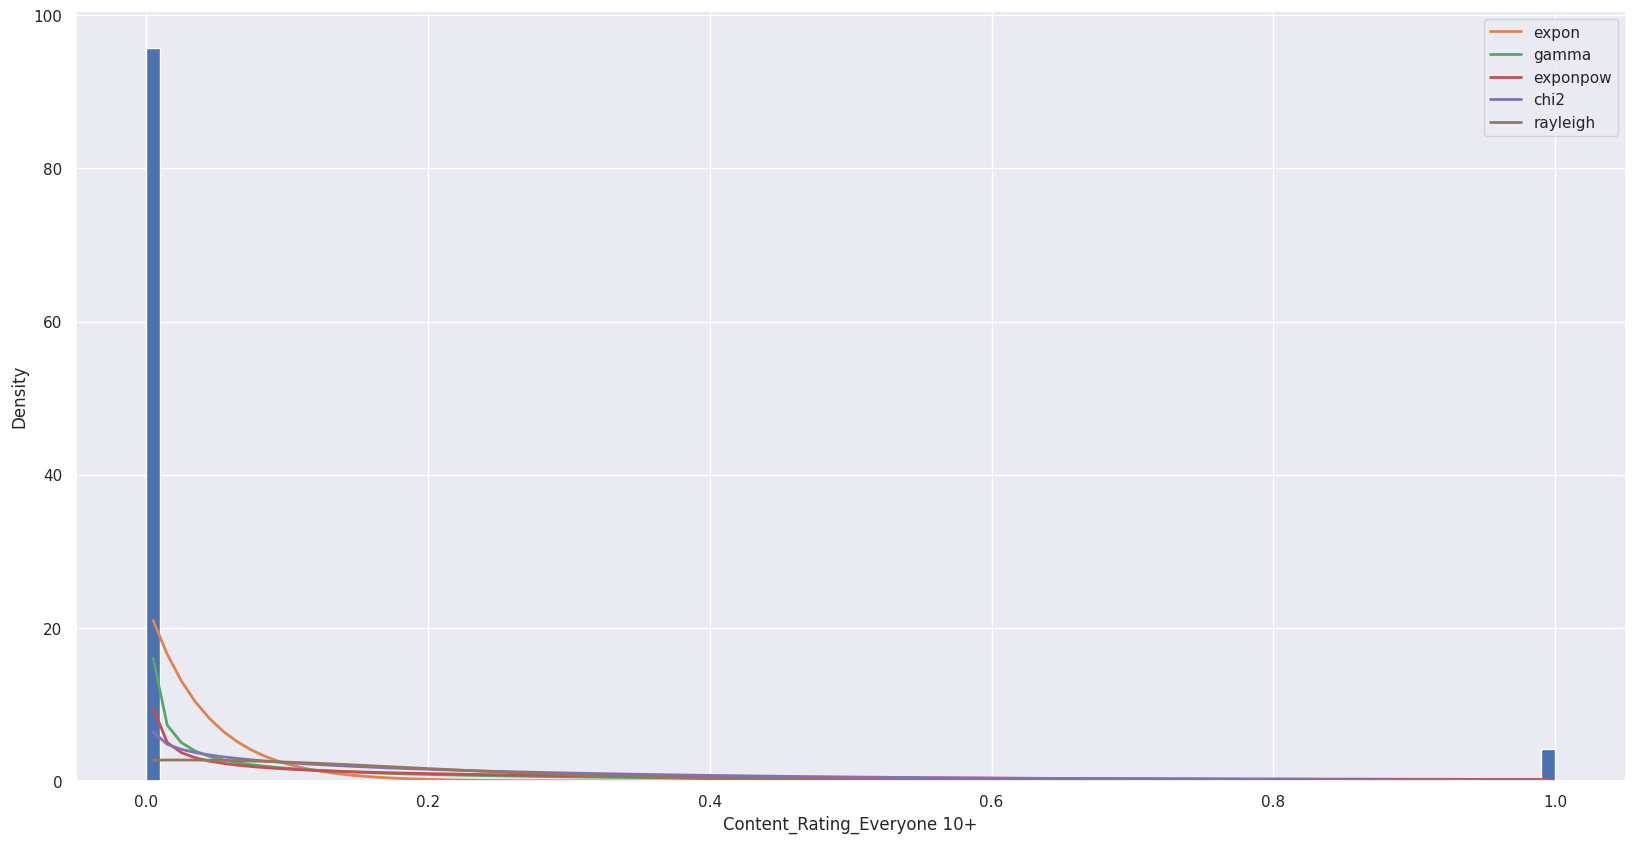

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.44it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon         6582.604770  1433.577180 -3286.034995     inf      0.950785   
gamma         6627.057232   199.179575 -3213.847134     inf      0.950785   
exponpow      7486.582643   134.081144 -2071.526607     inf      0.950785   
lognorm       8034.609271   816.531274 -1409.786161     inf      0.950785   
chi2          8107.840008   114.113211 -1324.798187     inf      0.950785   

          ks_pvalue  
expon           0.0  
gamma           0.0  
exponpow        0.0  
lognorm         0.0  
chi2            0.0  


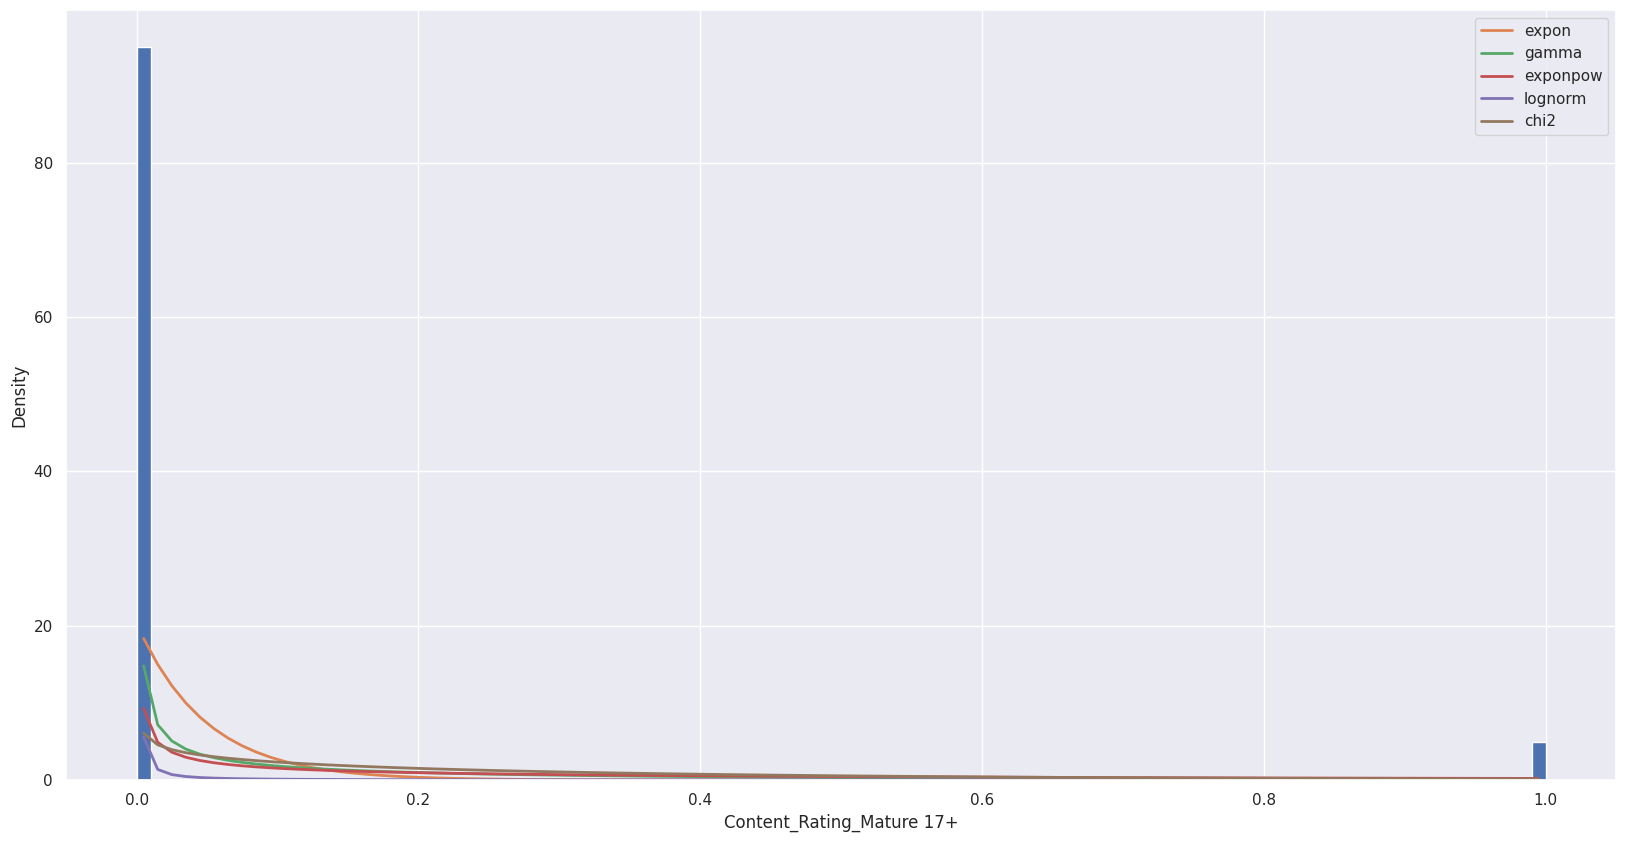

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.13it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma         6041.569719  422.088425 -4080.266380     inf      0.880709   
exponpow      6783.325568  519.490051 -2995.533938     inf      0.868660   
expon         6921.215500  436.807397 -2816.178070     inf      0.884275   
chi2          7188.740797   91.527527 -2451.793213     inf      0.884275   
rayleigh      7760.108033  192.368662 -1744.547827     inf      0.603694   

          ks_pvalue  
gamma           0.0  
exponpow        0.0  
expon           0.0  
chi2            0.0  
rayleigh        0.0  


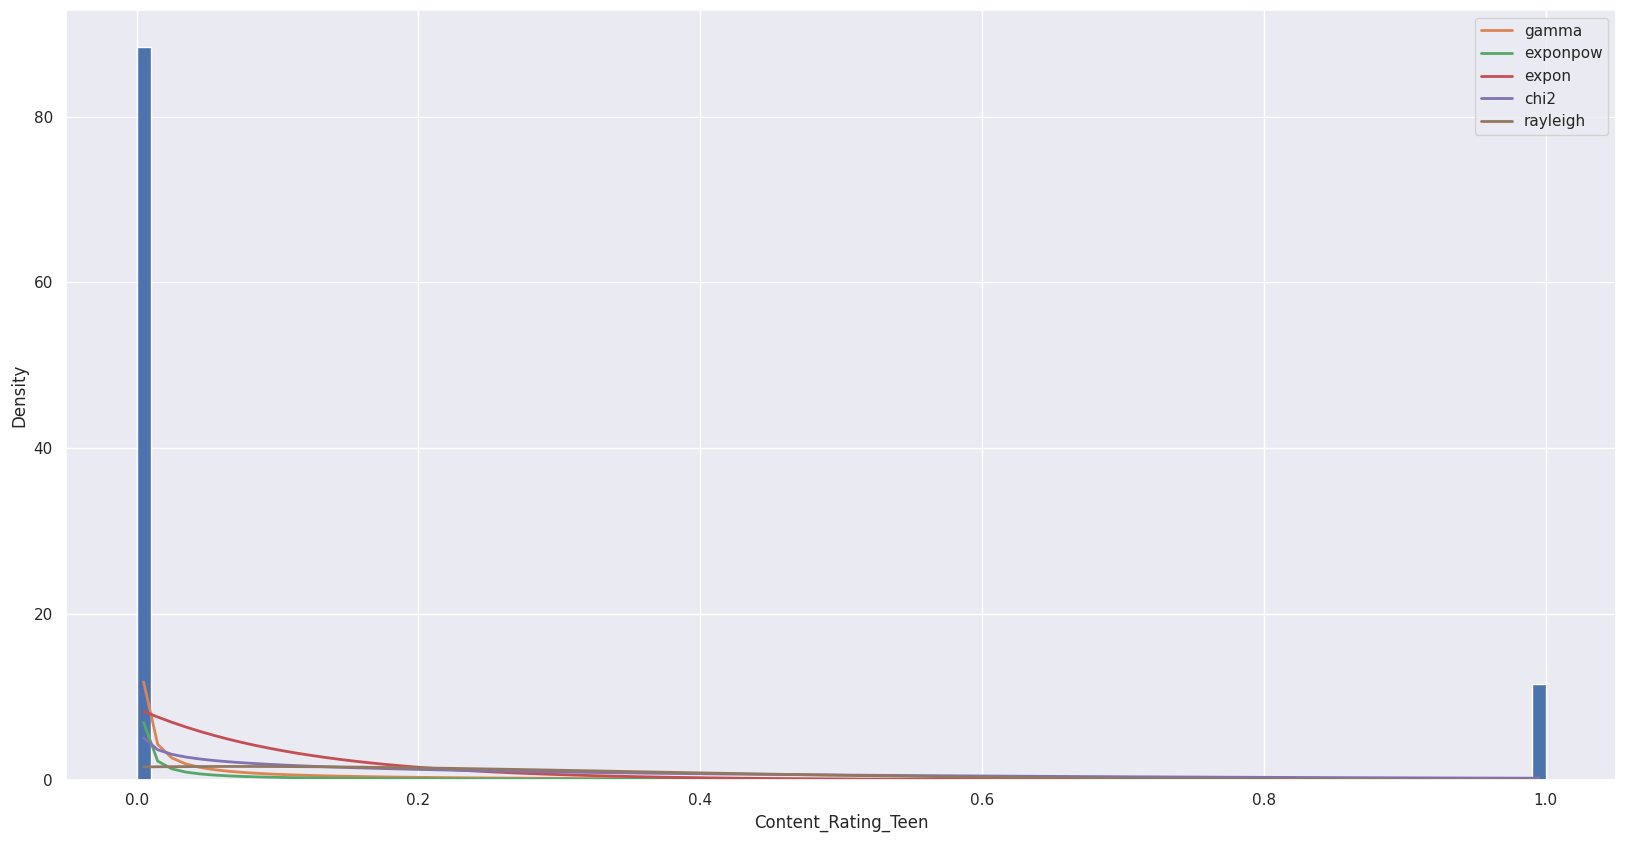

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.18it/s]


          sumsquare_error            aic           bic  kl_div  ks_statistic  \
rayleigh      2867.610094  317109.241983 -11069.558309     inf      0.609565   
chi2          3356.256367    4991.008127  -9586.542016     inf      0.999893   
norm          4477.862040  311432.145774  -6894.997898     inf      0.504015   
exponpow      5877.740231    1382.591224  -4337.779186     inf      0.999893   
uniform       9897.865073       4.000000    534.657109     inf      0.999893   

          ks_pvalue  
rayleigh        0.0  
chi2            0.0  
norm            0.0  
exponpow        0.0  
uniform         0.0  


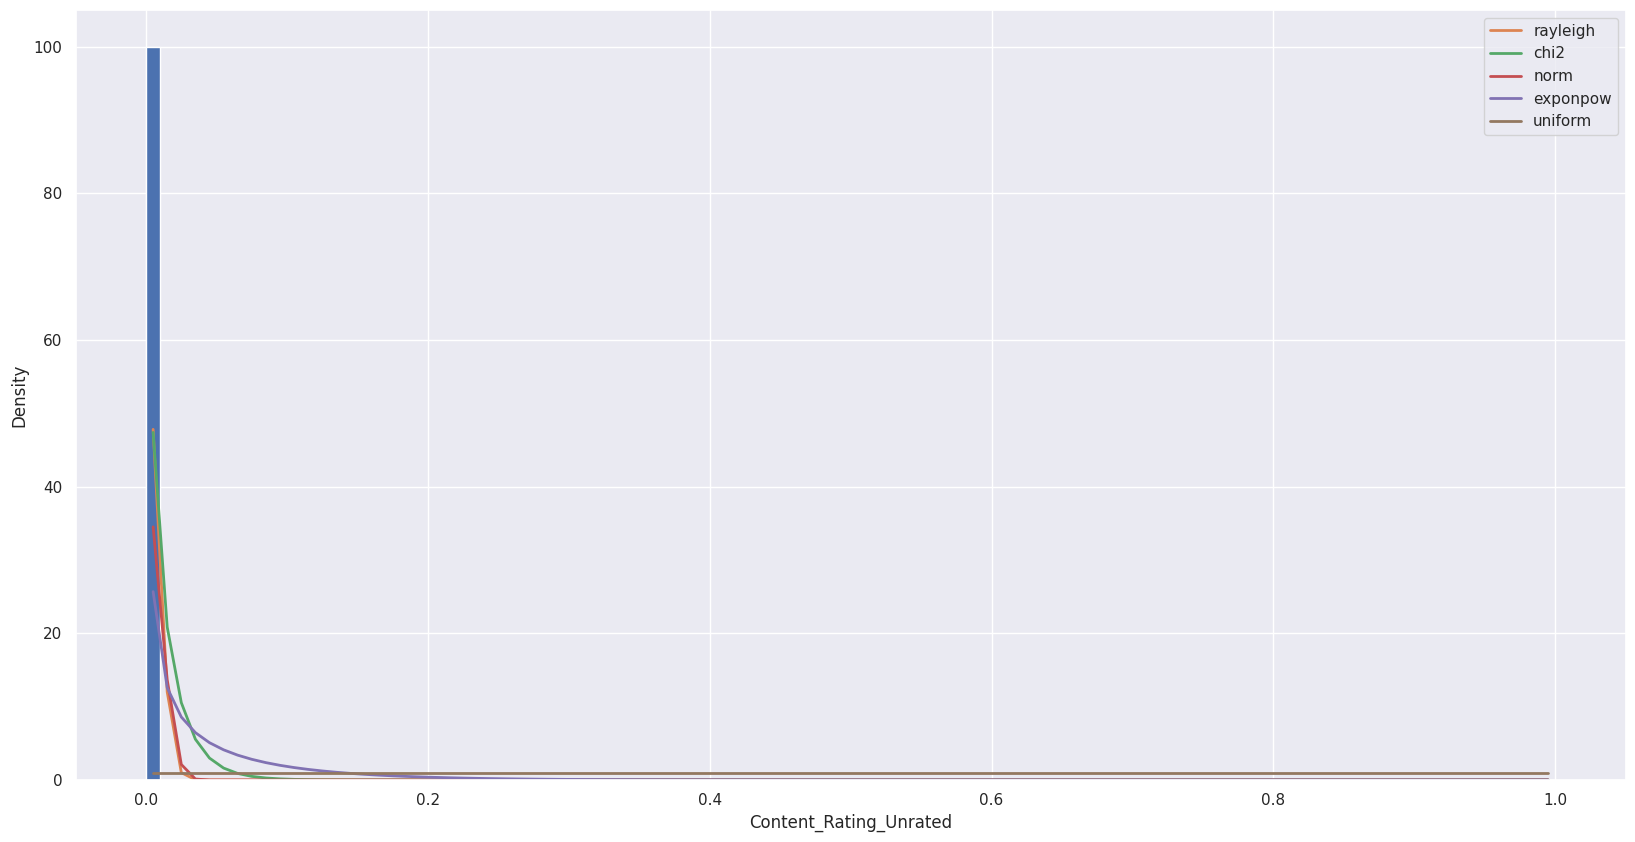

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.78it/s]


          sumsquare_error         aic           bic  kl_div  ks_statistic  \
rayleigh         0.556111  744.376800 -91138.883276     inf      0.142411   
chi2             0.557686  753.451545 -91103.246999     inf      0.121111   
lognorm          0.558674  752.012842 -91086.658818     inf      0.128713   
gamma            0.559098  750.515644 -91079.553400     inf      0.129651   
exponpow         0.559168  736.789505 -91078.375775     inf      0.147360   

              ks_pvalue  
rayleigh  3.206323e-166  
chi2      3.444274e-120  
lognorm   9.443443e-136  
gamma     9.757297e-138  
exponpow  5.324034e-178  


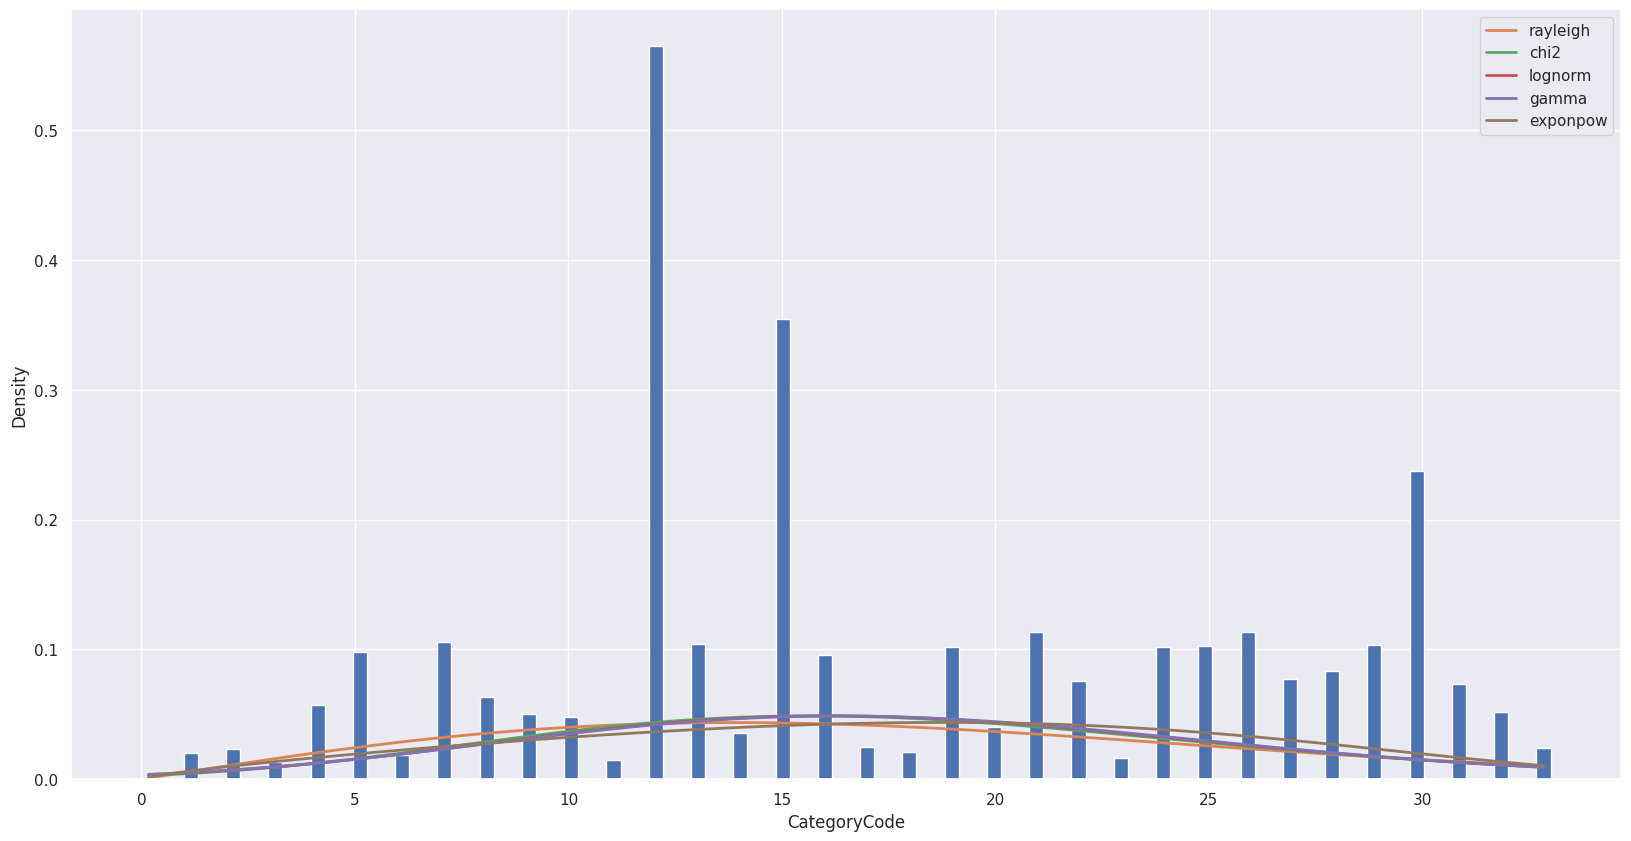

In [ ]:
plt.rcParams["figure.figsize"] = (20, 10)
for i in new_df.columns:
    values = new_df[i].values
    f = Fitter(values, distributions=get_common_distributions())
    f.fit()
    print(f.summary())
    plt.ylabel("Density")
    plt.xlabel(i)
    plt.show()

<Axes: >

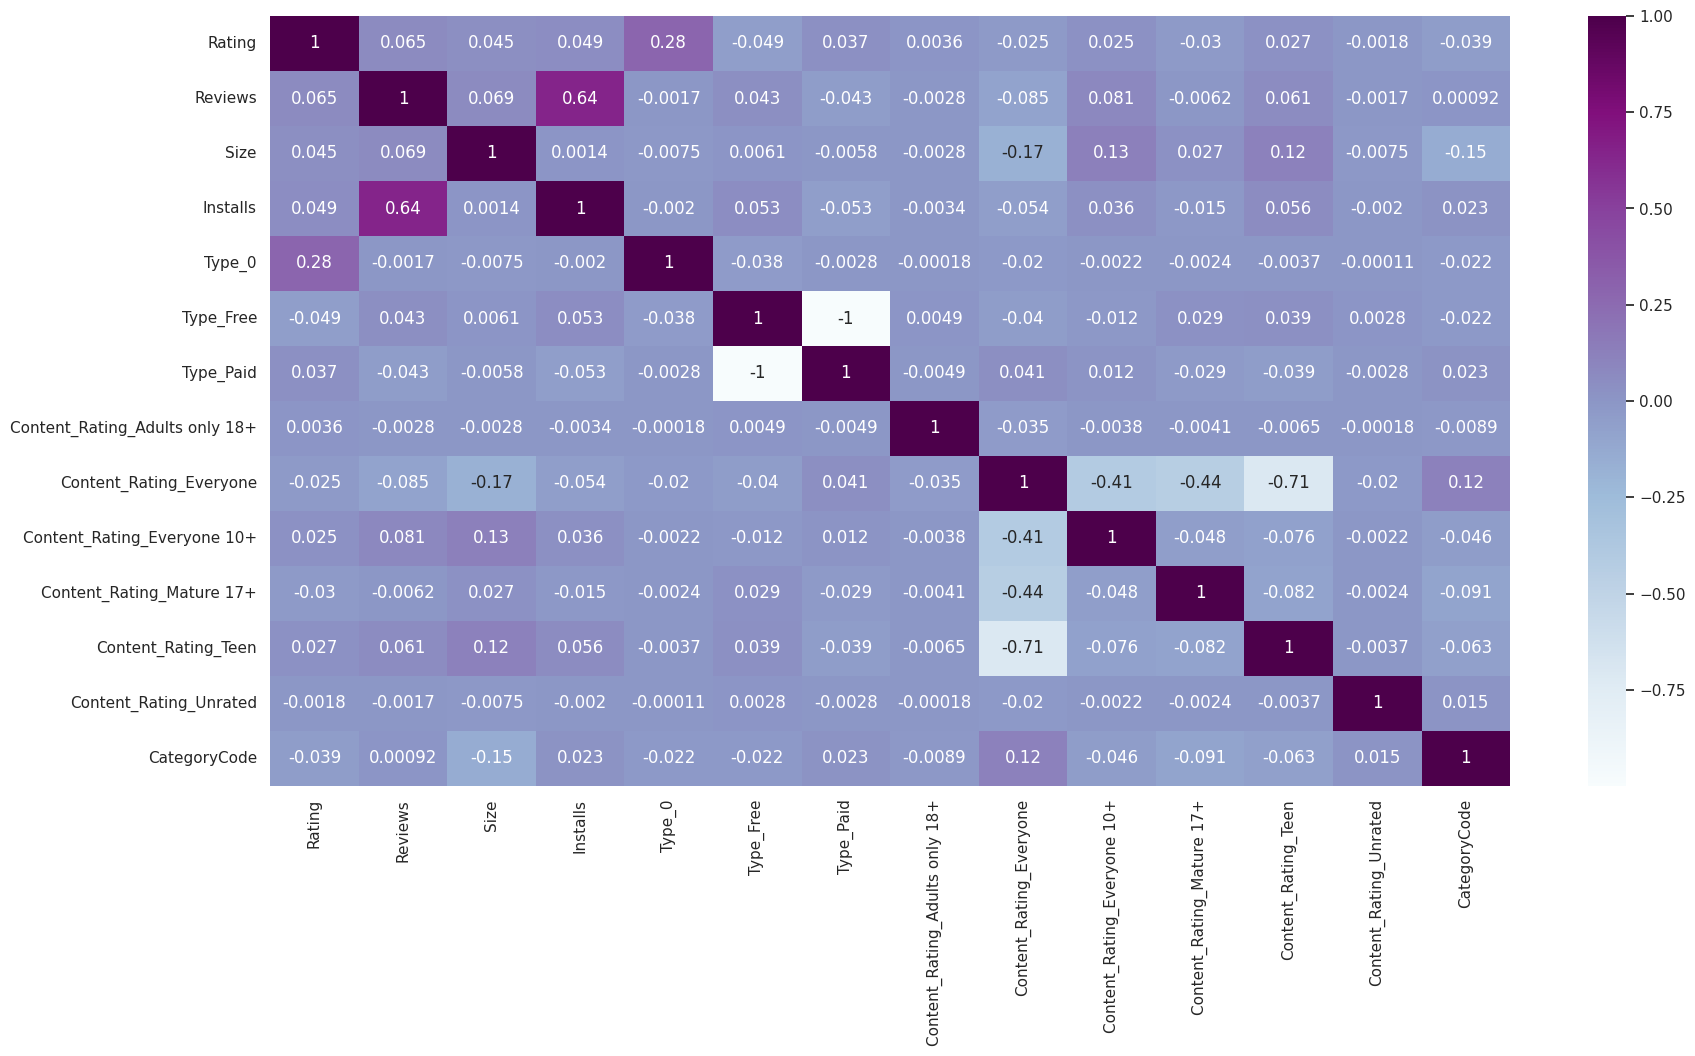

In [ ]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(
    new_df.corr(), annot=True, cmap="BuPu"
)  # Heatmap showing correlation between the attributes.

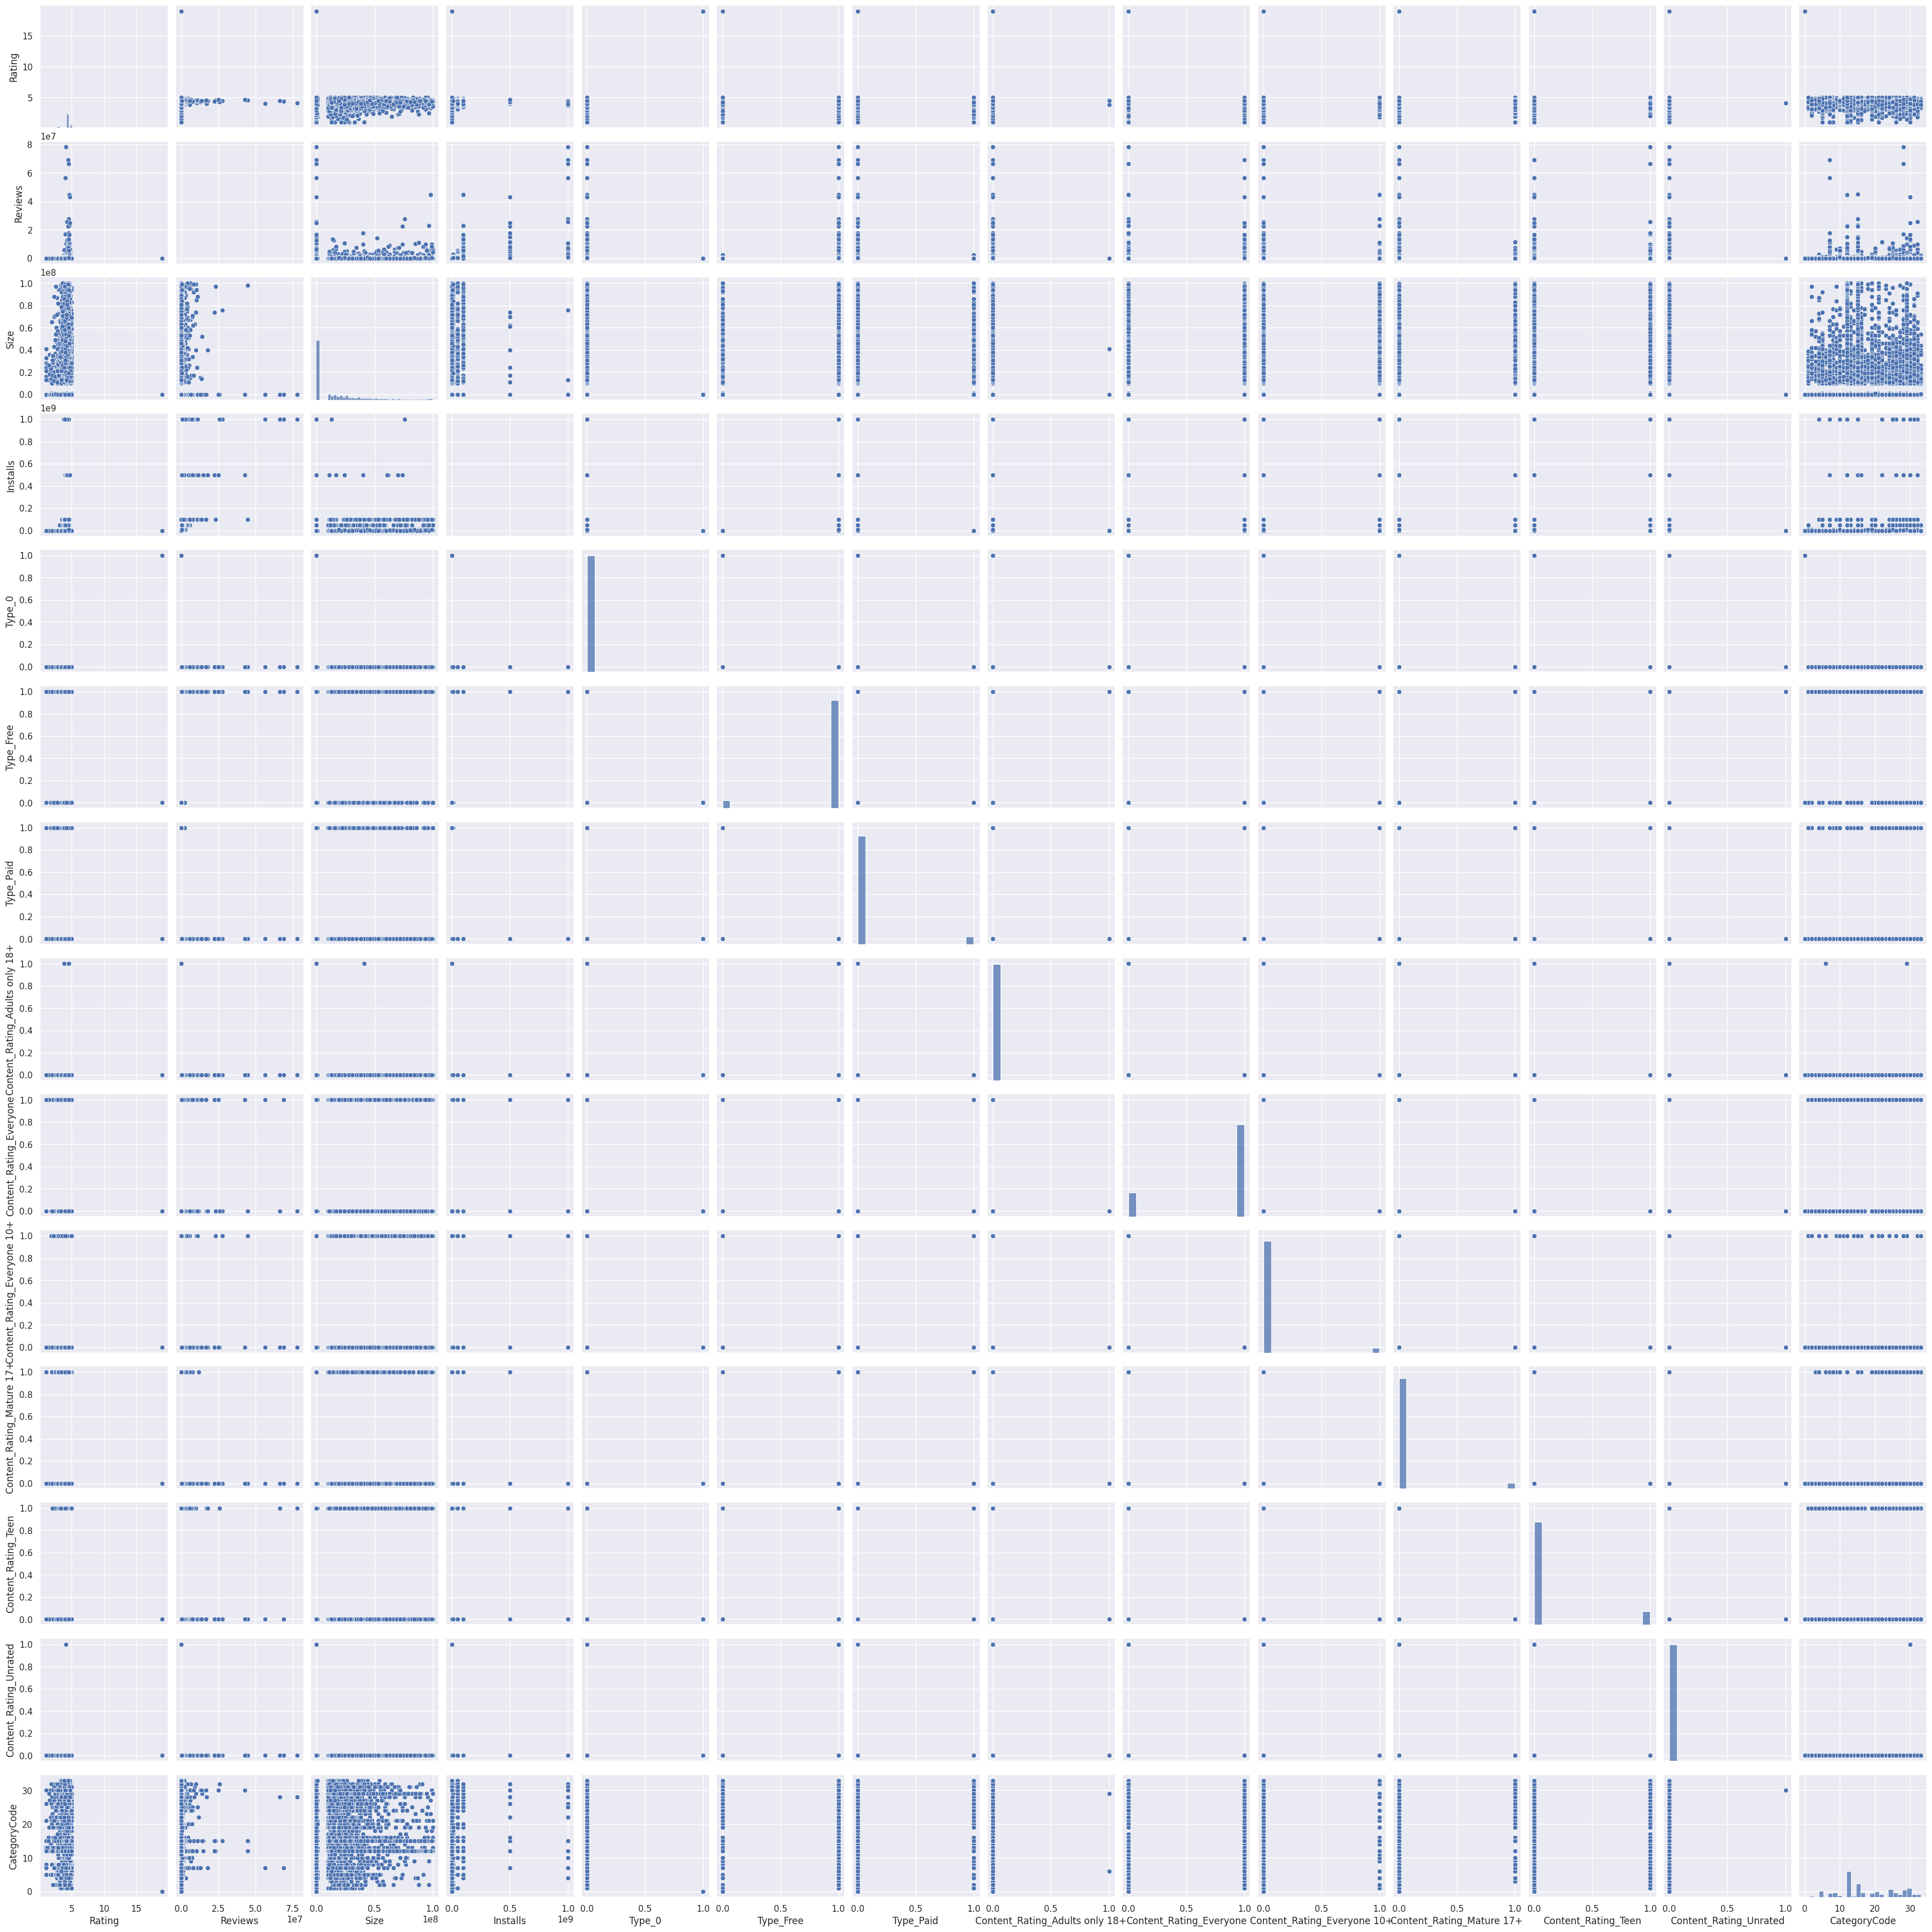

In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(new_df)

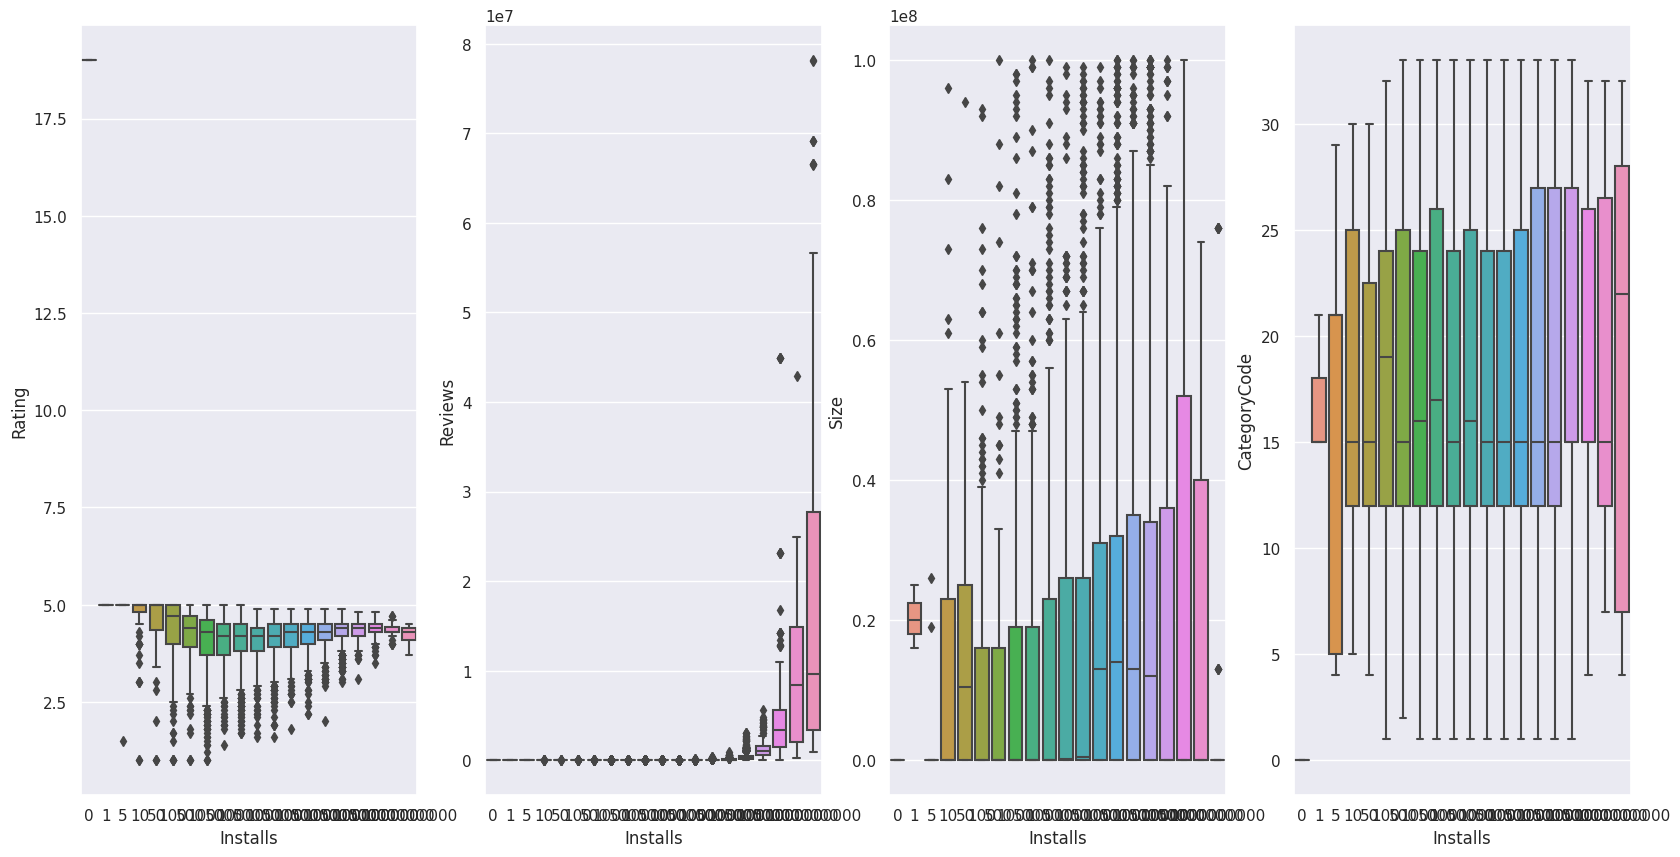

In [ ]:
names = new_df[
    [
        "Rating",
        "Reviews",
        "Size",
        "Installs",
        "CategoryCode",
    ]
].columns.drop("Installs")
ncols = len(names)
fig, axes = plt.subplots(1, ncols)
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(
        y=name,
        x="Installs",
        data=new_df[
            [
                "Rating",
                "Reviews",
                "Size",
                "Installs",
                "CategoryCode",
            ]
        ],
        orient="v",
        ax=ax,
    )
plt.rcParams["figure.figsize"] = (12, 16)

# What kind of data exploration did you do?

Preliminary findings from the EDA.

--Datatype Check - All the features in the dataset are converted to Integers using one hot encoding, Using formula to change from object datatype to Integer,Catcoding, etc .

--Missing Data Check - Our Dataset  had missing values in Rating column which we cleaned it above.

--Distribution of training data - I checked the probability distribution of each and every feature in the training dataset

--Correlation Check - I performed a correlation check on the dataset using heatmap and pirplot, the findings from it was that the didn't had any significant multi colinearity issues.

--Barplot - Performed Barplot analysis to findout how a variable impacts the Installs of an app

The above graphs are a cohesive representation of how Installs of an app is changing w.r.t. all the significant variables.

A few findings which we can interpret from the above graph as

--Installs of app remains unchanged as the Rating is not changing

--Installs of app increase as the Reviews increases

--Installs of app may increase as the  Size increase

--Installs of app may increase as the Category increase

These are the preliminary findings about how the individual parameters are affecting the Installs of app.

# Data Cleaning
This dataset had a missing values in Rating Column.handing missing values is one of the most important tasks in any Data Science project.

# Handling Missing Data
--In any ML modeling task, one of the very important task is to check if we have any missing values in our dataset. If there are missing values in the dataset it can horribly change the results and make our model inefficient.

--But there are ways to tackle this problem, we will discuss these methods in a bit detail below

# How to handle missing data - Data Imputation techniques
1.Delete rows with missing data

2.Fill the missing data points by either mean/mode/median

3.Model a regression with rest of the feature as input and the missing value as the target i.e. MICE Imputation

Our dataset have missing values in Rating.

We will remove 1%, 5% and 10% of the data from Ratinh in our dataset and see how well Mean Imputation and MICE imputation will recover the data back

In [ ]:
df_imputation = new_df.copy()
# Creating three extra coloumns of Alcohol for performing Data Imputation techniques
df_imputation["Rating_1_percent"] = df_imputation[["Rating"]]
df_imputation["Rating_5_percent"] = df_imputation[["Rating"]]
df_imputation["Rating_10_percent"] = df_imputation[["Rating"]]

In [ ]:
# Function to calculate percentage of missing data in dataset
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame(
        {"column_name": dataframe.columns, "percent_missing": percent_missing}
    )
    return missing_value_df


# Function to create missing values
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan


# Modified function to impute data using mean imputation
def mean_impute(train_df):
    mm_impute_train_df = train_df.copy()  # Make a copy of dataframe for imputation
    mm_impute_train_df["Rating_1_percent"] = mm_impute_train_df[
        "Rating_1_percent"
    ].fillna(mm_impute_train_df["Rating"].mean())
    mm_impute_train_df["Rating_5_percent"] = mm_impute_train_df[
        "Rating_5_percent"
    ].fillna(mm_impute_train_df["Rating"].mean())
    mm_impute_train_df["Rating_10_percent"] = mm_impute_train_df[
        "Rating_10_percent"
    ].fillna(mm_impute_train_df["Rating"].mean())
    return mm_impute_train_df


# Function to impute data using MICE method
def mice_impute(train_df):
    mice_imputed_train_df = pd.DataFrame(
        MICE().fit_transform(train_df), columns=list(train_df.columns)
    )
    return mice_imputed_train_df


# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [ ]:
# Checking for % missing values in dataset
print(get_percent_missing(df_imputation))

                                                   column_name  \
Rating                                                  Rating   
Reviews                                                Reviews   
Size                                                      Size   
Installs                                              Installs   
Type_0                                                  Type_0   
Type_Free                                            Type_Free   
Type_Paid                                            Type_Paid   
Content_Rating_Adults only 18+  Content_Rating_Adults only 18+   
Content_Rating_Everyone                Content_Rating_Everyone   
Content_Rating_Everyone 10+        Content_Rating_Everyone 10+   
Content_Rating_Mature 17+            Content_Rating_Mature 17+   
Content_Rating_Teen                        Content_Rating_Teen   
Content_Rating_Unrated                  Content_Rating_Unrated   
CategoryCode                                      CategoryCode   
Rating_1_p

In [ ]:
# Performing Mean Imputation
mm_imputed_df_imputation = mean_impute(df_imputation)

For MICE imputation, we have to be carefull and create three different dataframes for all three configuration, because MICE imputation uses all features in the data to predict(impute) the missing value. Having all coloumns in one dataframe can lead to the issue of co-linearity which will mislead the regression model and result in bad imputation

In [ ]:
# Dataframe for 1% missing value
df_imputation_1_percent = df_imputation.drop(
    ["Rating", "Rating_5_percent", "Rating_10_percent"], axis=1
)
# Dataframe for 5% missing value
df_imputation_5_percent = df_imputation.drop(
    ["Rating", "Rating_1_percent", "Rating_10_percent"], axis=1
)
# Dataframe for 10% missing value
df_imputation_10_percent = df_imputation.drop(
    ["Rating", "Rating_1_percent", "Rating_5_percent"], axis=1
)

# Performing Imputation on Dataframe with 1% missing values
mice_imputed_df_imputation_1_percent = mice_impute(df_imputation_1_percent)
# Performing Imputation on Dataframe with 5% missing values
mice_imputed_df_imputation_5_percent = mice_impute(df_imputation_5_percent)
# Performing Imputation on Dataframe with 10% missing values
mice_imputed_df_imputation_10_percent = mice_impute(df_imputation_10_percent)

Lets see how our imputation methods have recovered the data

In [ ]:
# This is the average % error on residuals for 1% missing data imputed using Mean Imputation
print("Average % error on residuals for 1% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Rating"],
        mm_imputed_df_imputation["Rating_1_percent"],
    )
)

# This is the average % error on residuals for 1% missing data imputed using MICE Imputation
print("Average % error on residuals for 1% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Rating"],
        mice_imputed_df_imputation_1_percent["Rating_1_percent"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using Mean Imputation
print("Average % error on residuals for 5% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Rating"],
        mm_imputed_df_imputation["Rating_5_percent"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using MICE Imputation
print("Average % error on residuals for 5% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Rating"],
        mice_imputed_df_imputation_5_percent["Rating_5_percent"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using Mean Imputation
print("Average % error on residuals for 10% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Rating"],
        mm_imputed_df_imputation["Rating_10_percent"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using MICE Imputation
print("Average % error on residuals for 10% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Rating"],
        mice_imputed_df_imputation_10_percent["Rating_10_percent"],
    )
)

Average % error on residuals for 1% missing data imputed using Mean Imputation
0.0
Average % error on residuals for 1% missing data imputed using MICE Imputation
13.228447789269044
Average % error on residuals for 5% missing data imputed using Mean Imputation
0.0
Average % error on residuals for 5% missing data imputed using MICE Imputation
13.228447789269044
Average % error on residuals for 10% missing data imputed using Mean Imputation
0.0
Average % error on residuals for 10% missing data imputed using MICE Imputation
13.228447789269044


# Interpreting the Imputation Methods
--From the above 6 readings we can conclude that the MICE imputation works well when compared to the Mean imputation method as the imputed value is a function of rest of the features.

--From this we can conclude that if we have less missing data in the dataset, more perfectly it is imputed back by the imputation method.

# Why Imputing data is always better than deleting the row ?

1.For obvious reason - Data Loss. When we delete a row we end up deleting a sample from training data which will do more harm to the model instead of doing any good.

2.Selecting of imputation method is really a personal choice, although from the above analysis we can come to the conclusion that MICE does a better job in getting the databack, but after creating a model it hardly has any positive effects on the accuracy of model. But it is always a better choice to use MICE as it can give you the closest possible value.

# Feature Importance and Selection

Lets fit a very simple linear model to understand how the features of App are affecting Installs

#How did you split the data into train, and test?
The data was splitted into Training ad Testing Data into 90% and 10% respectively.

In [ ]:
X = new_df.drop(["Installs"], axis=1)  # Training Feature
Y = new_df["Installs"]  # Target

In [ ]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
     


# Fitting a Linear Model

In [ ]:
import sklearn

linear_model = sklearn.linear_model.LogisticRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
#Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df = new_df.drop("Installs", axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.concat((df_norm, new_df.Installs), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [ ]:
y_linear_predictions = linear_model.predict(x_test).round()

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

# model = sm.OLS(y_train['Installs'], x_train[[ 'CategoryCode','Rating', 'Size', 'Reviews', 'Price','Type_0','Type_Free','Type_Paid','Content_Rating_Everyone','Content_Rating_Teen','Content_Rating_Unrated']]).fit()
model = sm.OLS(y_train, x_train).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     486.4
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:07:14   Log-Likelihood:            -1.6435e+05
No. Observations:                8430   AIC:                         3.287e+05
Df Residuals:                    8418   BIC:                         3.288e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Rating                          2.063e+06    1.5e+06      1.373      0.170   -8.83e+05    5.01e+06
Reviews                           18.2570      0.253     72.211      0.000      17.761      18.753
Size                              -0.1726      0.033     -5.197      0.000      -0.238      -0.108
Type_0                          -3.92e+07   7.65e+07     -0.513      0.608   -1.89e+08    1.11e+08
Type_Free                       -1.39e+06   1.14e+07     -0.122      0.903   -2.37e+07     2.1e+07
Type_Paid                       -1.09e+07   1.17e+07     -0.927      0.354   -3.39e+07    1.21e+07
Content_Rating_Adults only 18+ -6.853e+06    3.7e+07     -0.185      0.853   -7.93e+07    6.56e+07
Content_Rating_Everyone         2.278e+06   1.04e+07      0.218      0.827   -1.82e+07    2.27e+07
Content_Rating_Everyone 10+    -4.494e+06   1.09e+07     -0.411      0.681   -2.59e+07    1.69e+07
Content_Rating_Mature 17+      -5.959e+05   1.08e+07     -0.055      0.956   -2.18e+07    2.06e+07
Content_Rating_Teen             8.594e+06   1.06e+07      0.811      0.417   -1.22e+07    2.94e+07
Content_Rating_Unrated         -1.121e+07   6.23e+07     -0.180      0.857   -1.33e+08    1.11e+08
CategoryCode                    1.391e+05   9.51e+04      1.462      0.144   -4.74e+04    3.26e+05
==============================================================================
Omnibus:                    12392.916   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4827299.101
Skew:                           8.969   Prob(JB):                         0.00
Kurtosis:                     118.851   Cond. No.                     2.52e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Feature Selection
Feature Selection is the process of selecting the features which are relevant to a machine learning model. It means that you select only those attributes that have a significant effect on the modelâ€™s output.

Consider the case when you go to the departmental store to buy grocery items. A product has a lot of information on it, i.e., product, category, expiry date, retail cost, ingredients, and manufacturing details. All this information is the features of the product. Normally, you check the brand, retail cost, expiry date, weather the item is vegetarian or not before buying a product. However, manufacturing section is not your concern. Therefore, brand, retail cost, expiry date, vegetraian/non-vegetarian are relevant features, and the manufacturing details are irrelevant. This is how feature selection is done.

# P-Value - 

It stands for â€˜probability valueâ€™; it tells how likely it is that a result occurred by chance alone. Basically, the p-value is used in hypothesis testing to help you support or reject the null hypothesis. The smaller the p-value, the stronger the evidence to reject the null hypothesis.


Leaving Review and Size rest all have P value < 0.05

# Fitting a Tree Based Model

showing decision tree and gradientboosting classifier method to show the best accuracy for my dataset and as we can see below Decision Tree classifier gives us the best accuracy of 51.33%



In [ ]:
from sklearn.metrics import accuracy_score
# Create a Decision Tree Classifier model
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 51.33%


In [ ]:
# Create a Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 58.59%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

In [ ]:
y_tree_based_predictions = tree_model.predict(x_test).round()

# Fitting a Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

In [ ]:
svm_predictions = svm_model.predict(x_test).round()

# Fitting a MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [ ]:
mlp_predictions = regr.predict(x_test).round()

# Using AutoML to find out the best Model

In [ ]:
new_hf = h2o.H2OFrame(new_df)  # Converting Pandas dataframe in H2O dataframe

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
print(new_hf)

  Rating    Reviews     Size    Installs    Type_0    Type_Free    Type_Paid    Content_Rating_Adults only 18+    Content_Rating_Everyone    Content_Rating_Everyone 10+    Content_Rating_Mature 17+    Content_Rating_Teen    Content_Rating_Unrated    CategoryCode
     4.1        159  1.9e+07   10000             0            1            0                                 0                          1                              0                            0                      0                         0               1
     3.9        967  1.4e+07  500000             0            1            0                                 0                          1                              0                            0                      0                         0               1
     4.7      87510  8             5e+06         0            1            0                                 0                          1                              0                            0              

In [ ]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.transforms import H2OScaler
# Split data into train and test sets
df_train, df_test = new_hf.split_frame(ratios=[0.8])

# Create an instance of H2OScaler with the "center" and "scale" arguments
scaler = H2OScaler(center=True, scale=True)

# Fit the scaler to the training data
scaler.fit(df_train)

# Scale the training data
scaled_train = scaler.transform(df_train)

# Scale the test data
scaled_test = scaler.transform(df_test)

# Train the model on the scaled training data
model = H2OGradientBoostingEstimator()
model.train(x=df_train.columns[:-1], y="Installs", training_frame=scaled_train)

# Make predictions on the scaled test data
predictions = model.predict(scaled_test)

# Compute the RMSE value on the scaled test data
rmse = model.model_performance(scaled_test).rmse()

# Print the RMSE value
print("RMSE:", rmse)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
RMSE: 3437319707306809.0


In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
# Define the predictor columns and response column
predictors = df_train.columns[:-1]
response = "Installs"

# Create an instance of H2OGeneralizedLinearEstimator with regularization
model = H2OGeneralizedLinearEstimator(alpha=0.5, lambda_=0.1)

# Train the model on the training data
model.train(x=predictors, y=response, training_frame=df_train)

# Make predictions on the test data
predictions = model.predict(df_test)

# Compute the RMSE value on the test data
rmse = model.model_performance(df_test).rmse()

# Print the RMSE value
print("RMSE:", rmse)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
RMSE: 65743027.82671259


In [ ]:
pct_rows = 0.60  # Setting up the data split between training and test dataset.
df_train, df_test = new_hf.split_frame([pct_rows])

In [ ]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "Installs"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [ ]:
autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |
00:03:04.202: _train param, Dropping bad and constant columns: [Content_Rating_Unrated, Type_0]

████
00:03:17.380: _train param, Dropping bad and constant columns: [Content_Rating_Unrated, Type_0]
00:03:17.611: _train param, Dropping bad and constant columns: [Content_Rating_Unrated, Type_0]

███
00:03:26.692: _train param, Dropping unused columns: [Content_Rating_Unrated, Type_0]
00:03:27.174: _train param, Dropping bad and constant columns: [Content_Rating_Unrated, Type_0]

█
00:03:32.205: _train param, Dropping bad and constant columns: [Content_Rating_Unrated, Type_0]

██
00:03:36.676: _train param, Dropping bad and constant columns: [Content_Rating_Unrated, Type_0]

█
00:03:42.662: _train param, Dropping bad and constant columns: [Content_Rating_Unrated, Type_0]

██
00:03:48.799: _train param, Dropping bad and constant columns: [Content_Rating_Unrated, Type_0]

███
00:03:57.576: _train param, Dropping unused columns: [Content_Rating_Unrated, Type_0]
00:03:57.92

In [ ]:
def Metrics(y_actual,y_hat):
    TP = 0 #True Positives
    FP = 0 # False Positives
    TN = 0 # True Negatives
    FN = 0 # False Negatives

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1
    #Precision Score
    precision = TP / (FP + TP)
    #Recall Score
    recall = TP / (FN + TP)
    #Accuracy
    accuracy = ((TP + TN)/ (TP + FN + TN + FP)) * 100
    #F1 Score
    F1_Score = 2* precision * recall/ (precision + recall)
    print(f'Accuracy: {round(accuracy,2)}%')
    print(f'Precision:{round(precision,2)}')
    print(f'Recall Score:{round(recall,2)}')
    print(f'F1 Score:{round(F1_Score,2)}')

In [ ]:
autoML[2].leaderboard  # Leaderbord of AutoML output

model_id                                                       rmse          mse          mae    rmsle    mean_residual_deviance
------------------------------------------------------  -----------  -----------  -----------  -------  ------------------------
StackedEnsemble_AllModels_3_AutoML_8_20230410_00304     3.44584e+07  1.18738e+15  7.06812e+06      nan               1.18738e+15
XGBoost_grid_1_AutoML_8_20230410_00304_model_2          3.49425e+07  1.22098e+15  6.85294e+06      nan               1.22098e+15
StackedEnsemble_BestOfFamily_4_AutoML_8_20230410_00304  3.49734e+07  1.22314e+15  6.92593e+06      nan               1.22314e+15
StackedEnsemble_BestOfFamily_3_AutoML_8_20230410_00304  3.51462e+07  1.23526e+15  7.6404e+06       nan               1.23526e+15
XGBoost_grid_1_AutoML_8_20230410_00304_model_10         3.56057e+07  1.26777e+15  8.37718e+06      nan               1.26777e+15
StackedEnsemble_AllModels_2_AutoML_8_20230410_00304     3.58798e+07  1.28736e+15  7.70214e+06      nan               1.28736e+15
GBM_5_AutoML_8_20230410_00304                           3.59885e+07  1.29518e+15  7.60822e+06      nan               1.29518e+15
StackedEnsemble_AllModels_1_AutoML_8_20230410_00304     3.61173e+07  1.30446e+15  8.33768e+06      nan               1.30446e+15
StackedEnsemble_BestOfFamily_2_AutoML_8_20230410_00304  3.62793e+07  1.31618e+15  8.24572e+06      nan               1.31618e+15
XGBoost_grid_1_AutoML_8_20230410_00304_model_7          3.63751e+07  1.32315e+15  7.92287e+06      nan               1.32315e+15
[41 rows x 6 columns]

In [ ]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model

1


In [ ]:
autoML_best_predictions = autoML_model.predict(df_test).round()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["Installs"], use_pandas=False)

In [ ]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [ ]:
autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)

In [ ]:
autoML_model = getBestModel(autoML[2])
print(autoML_model)

1
Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_8_20230410_00304_model_2


Model Summary: 
    number_of_trees
--  -----------------
    100

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 41346279201084.03
RMSE: 6430107.246468292
MAE: 1361293.5138901018
RMSLE: NaN
Mean Residual Deviance: 41346279201084.03

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 1220978159853440.2
RMSE: 34942497.905179024
MAE: 6852941.585328935
RMSLE: NaN
Mean Residual Deviance: 1220978159853440.2

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     6.85294e+06  807800       6.14064e+06   6.47535e+06   8.17684e+06   6.43582e+06   7.03605e+06
mean_residual_deviance  1.22098e+15  5.97997e+14 

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

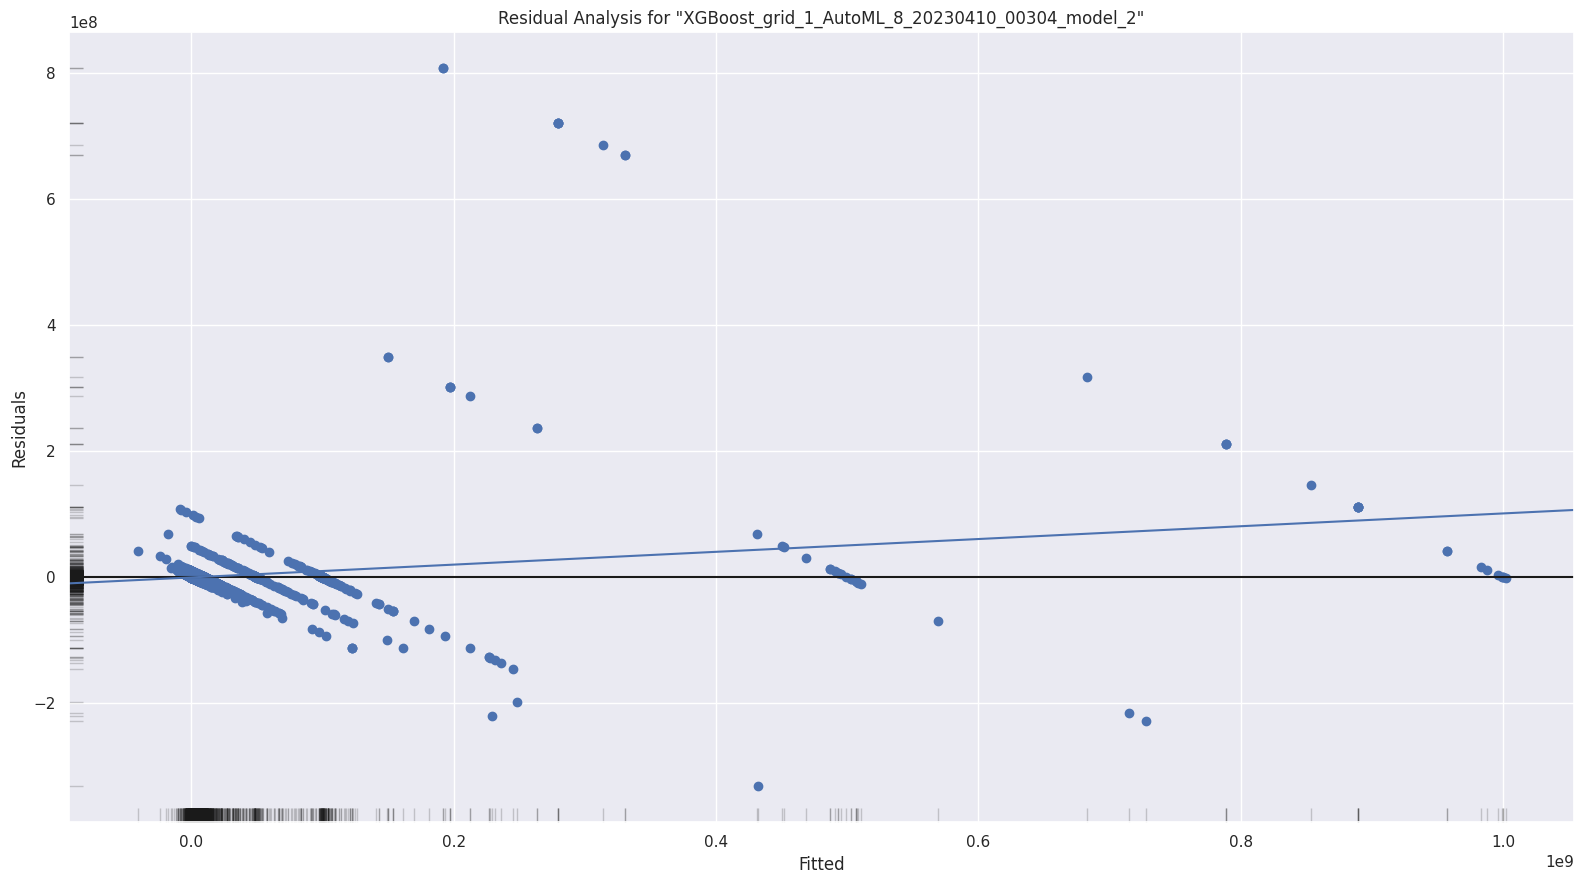

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

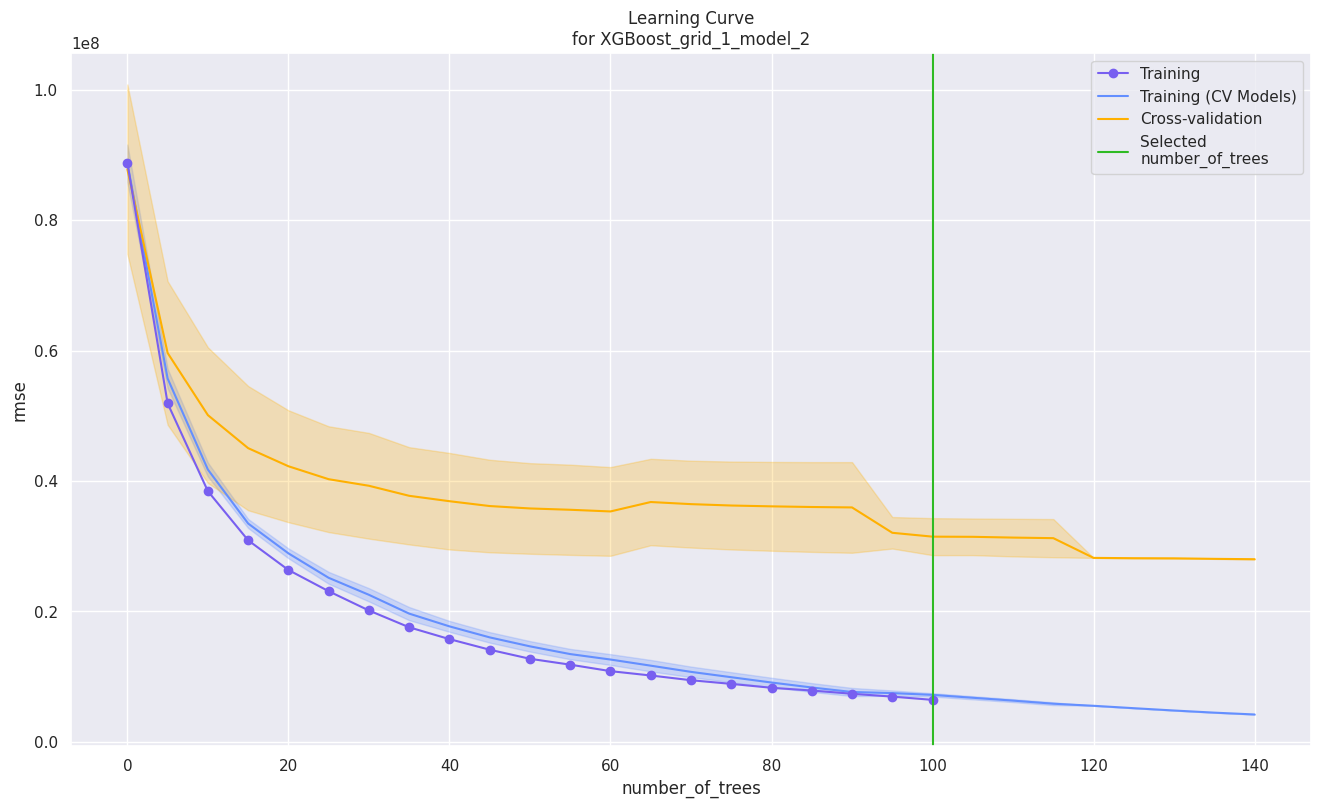

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

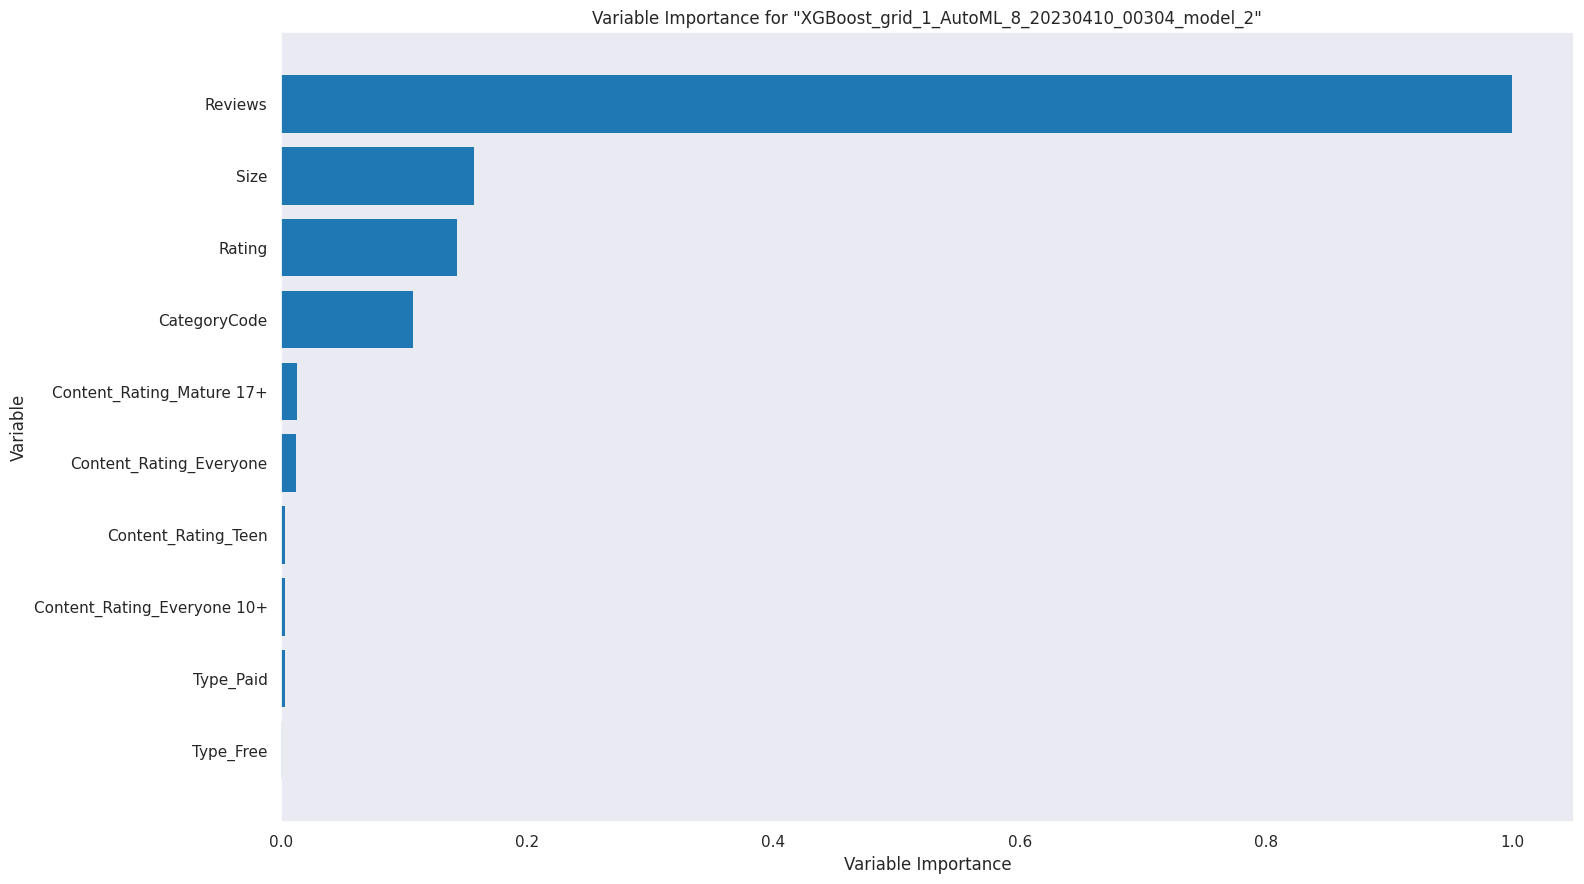

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

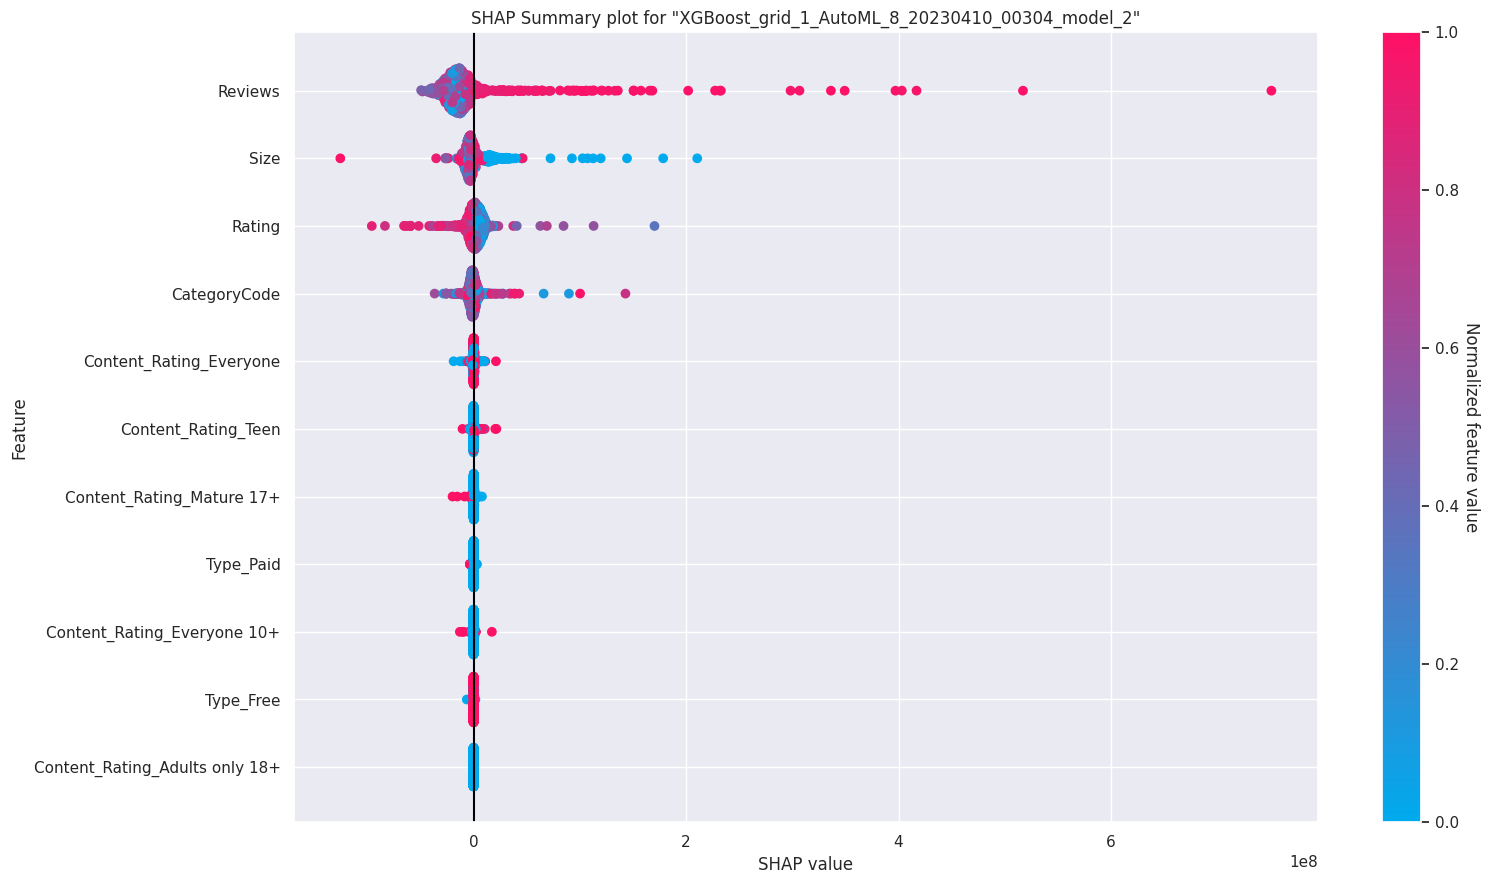

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

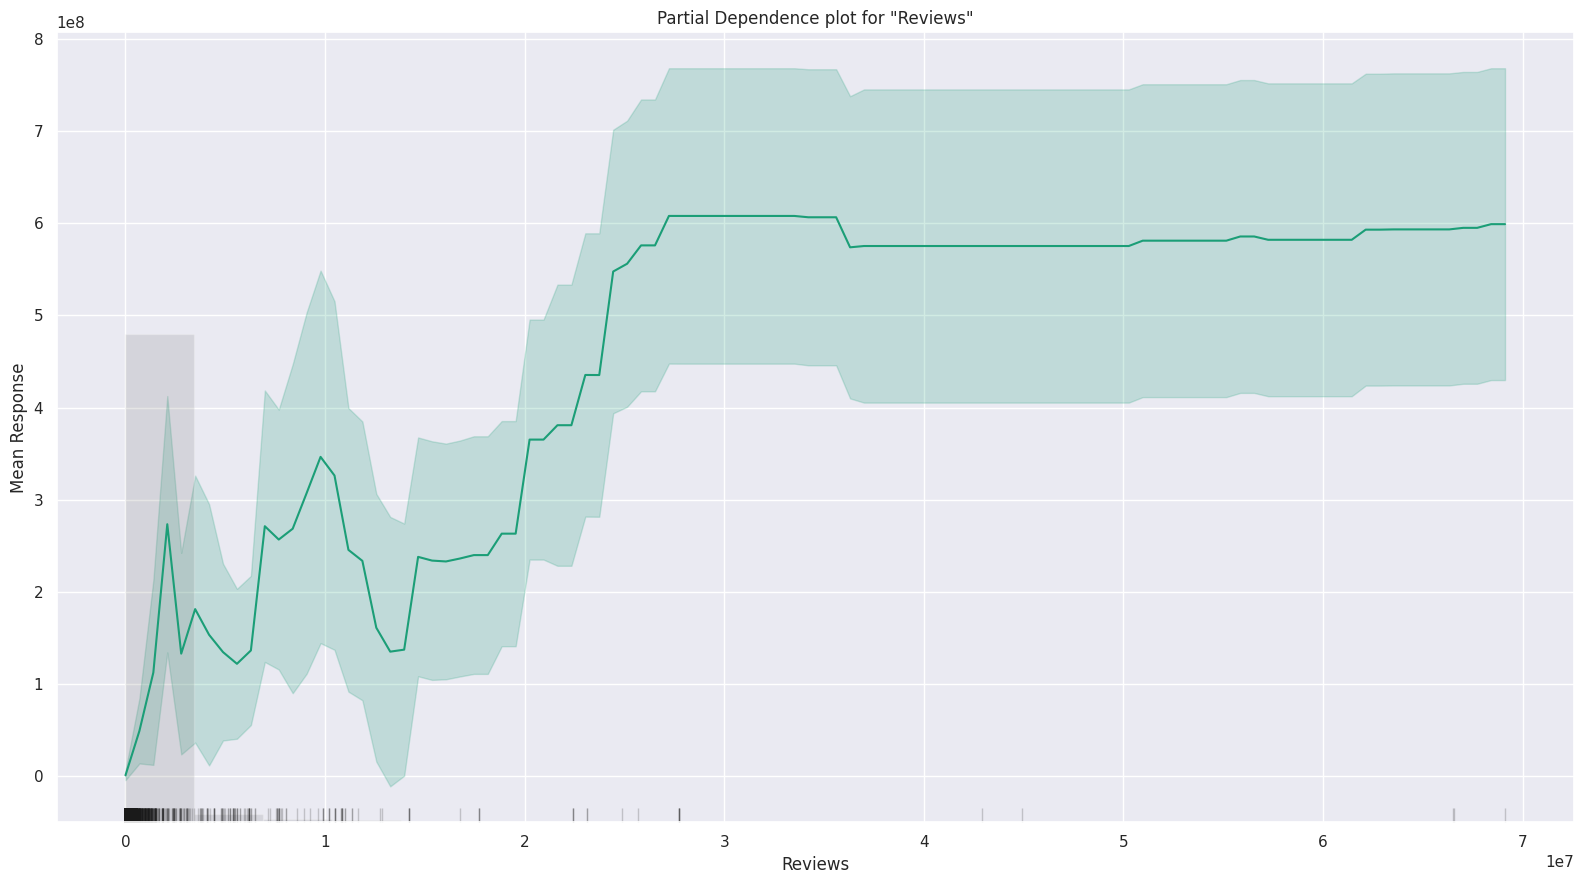

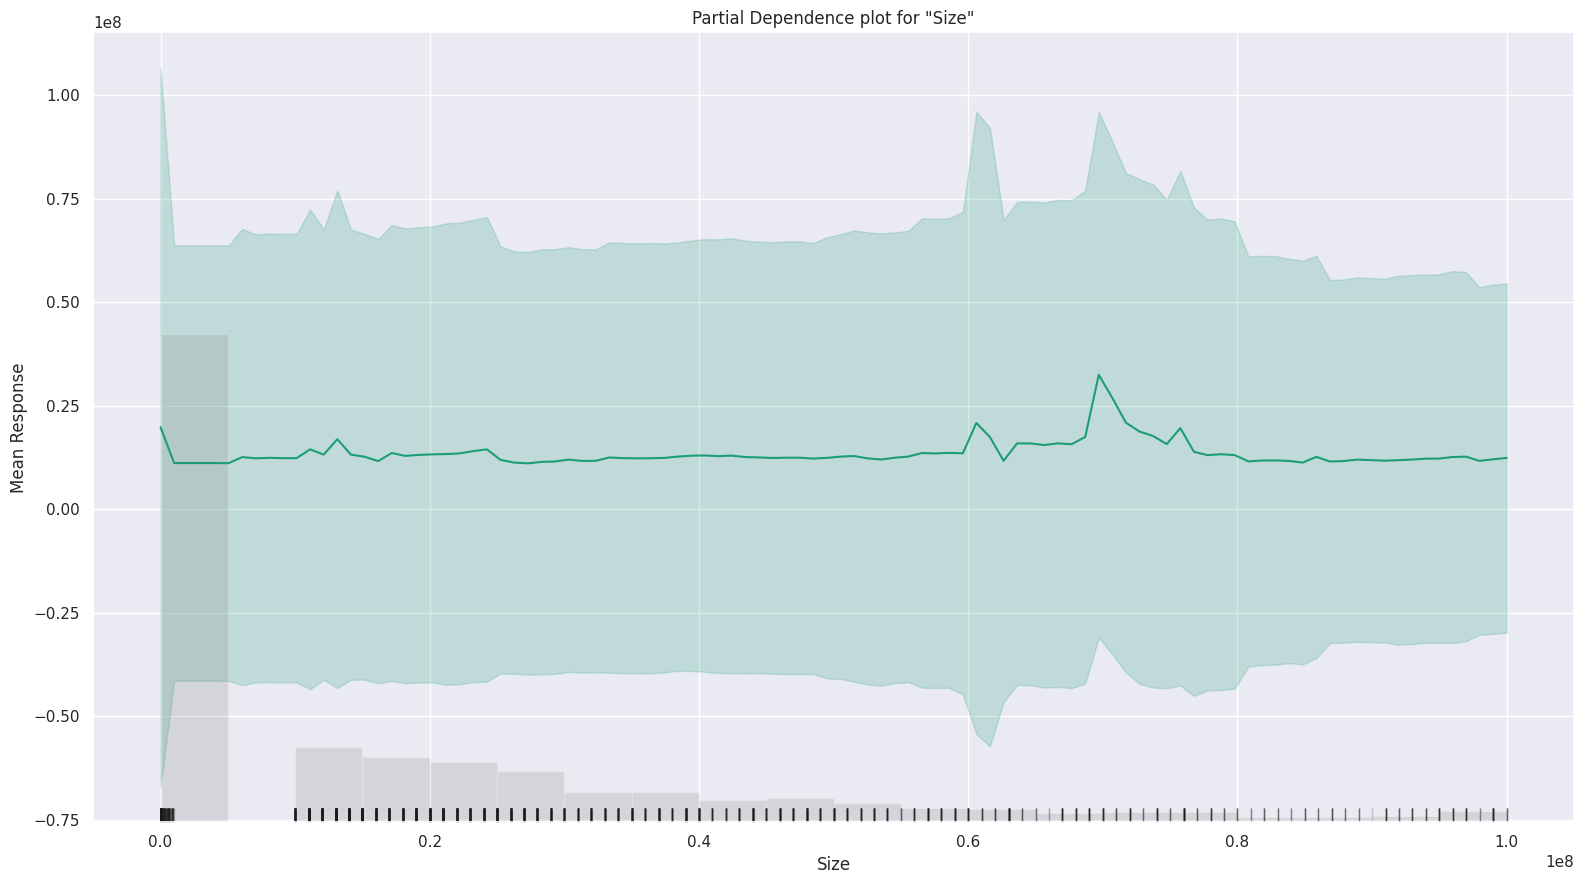

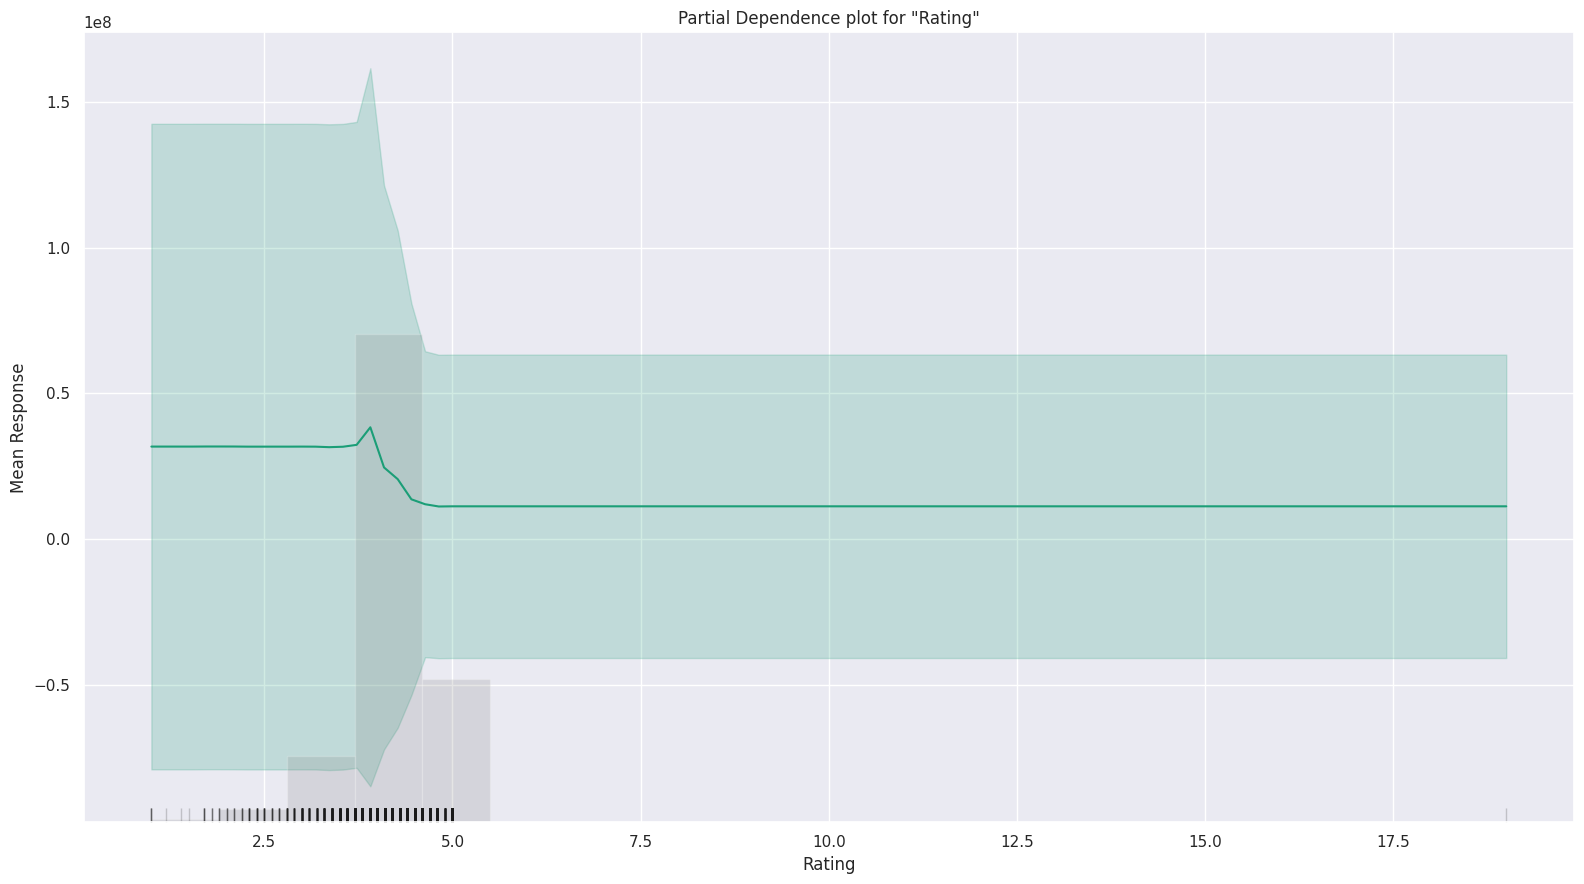

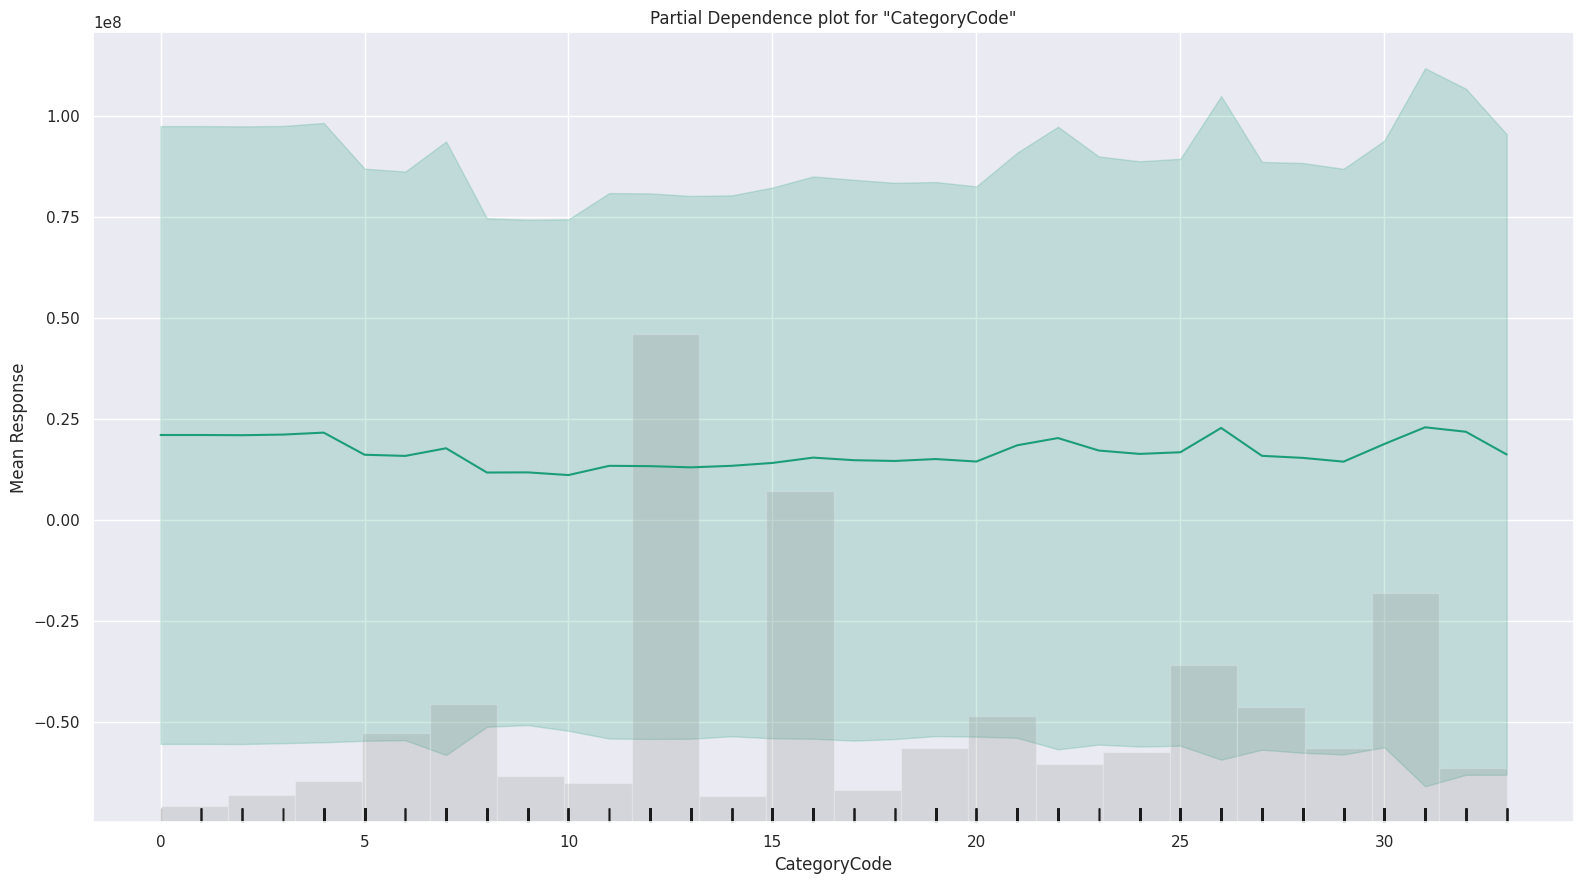

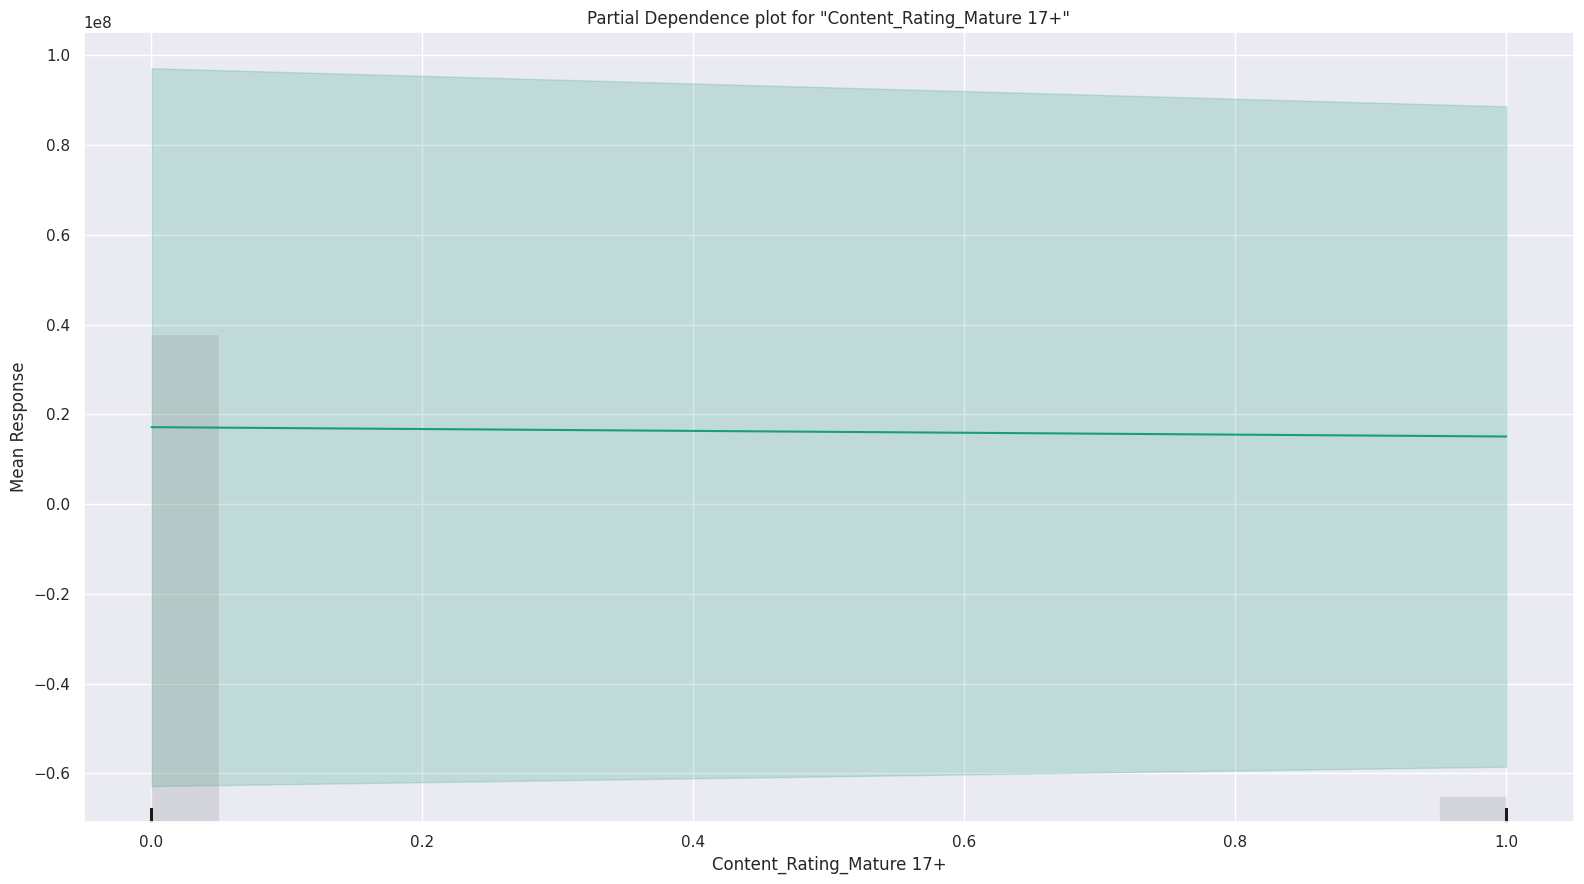

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

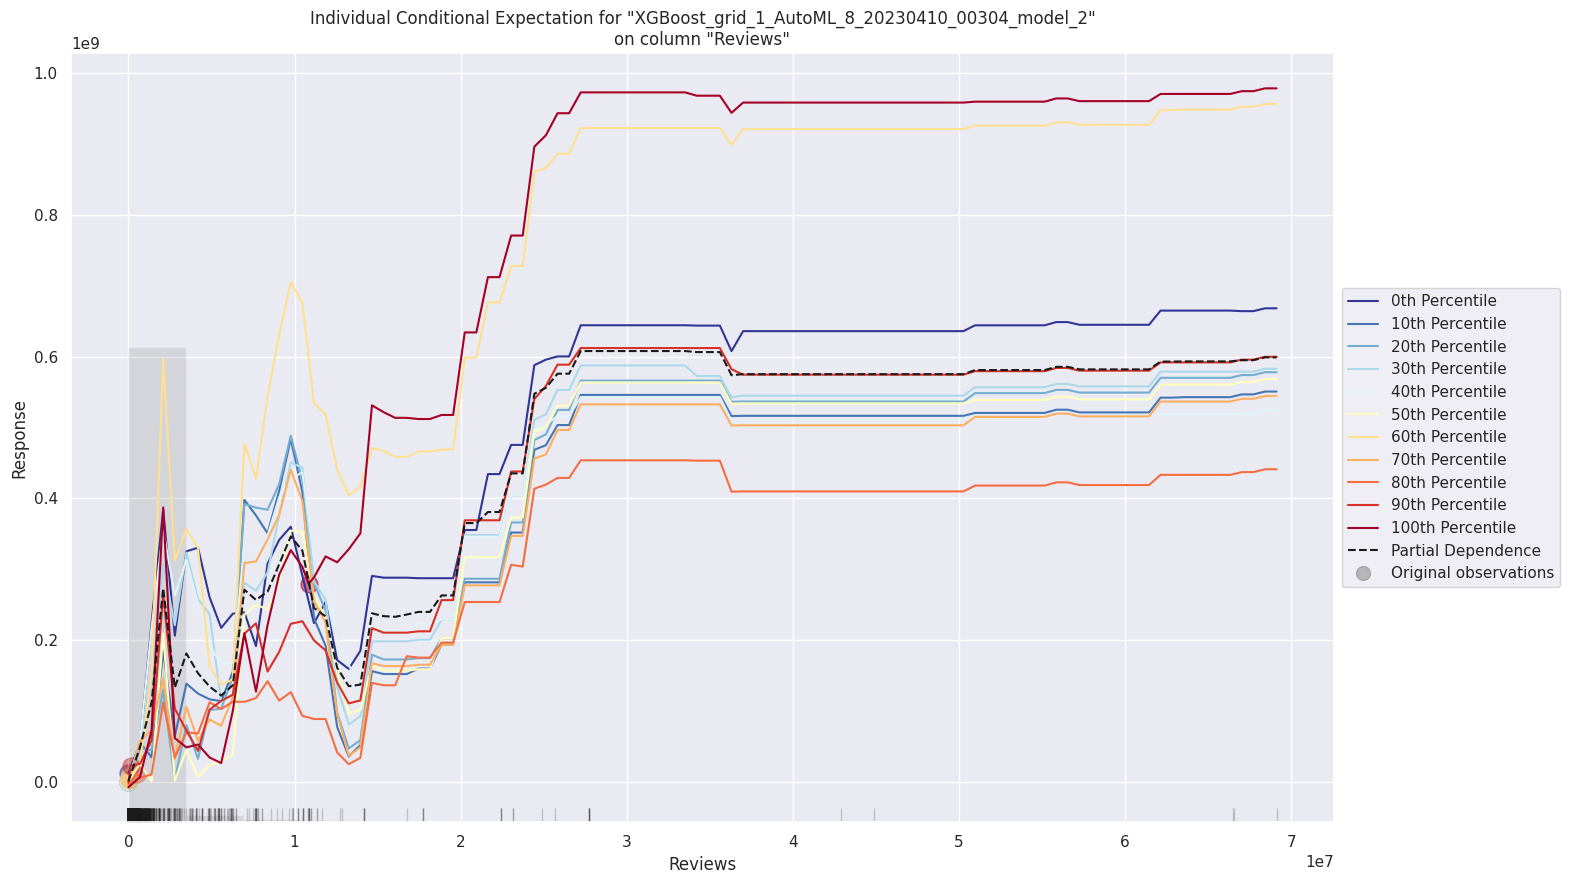

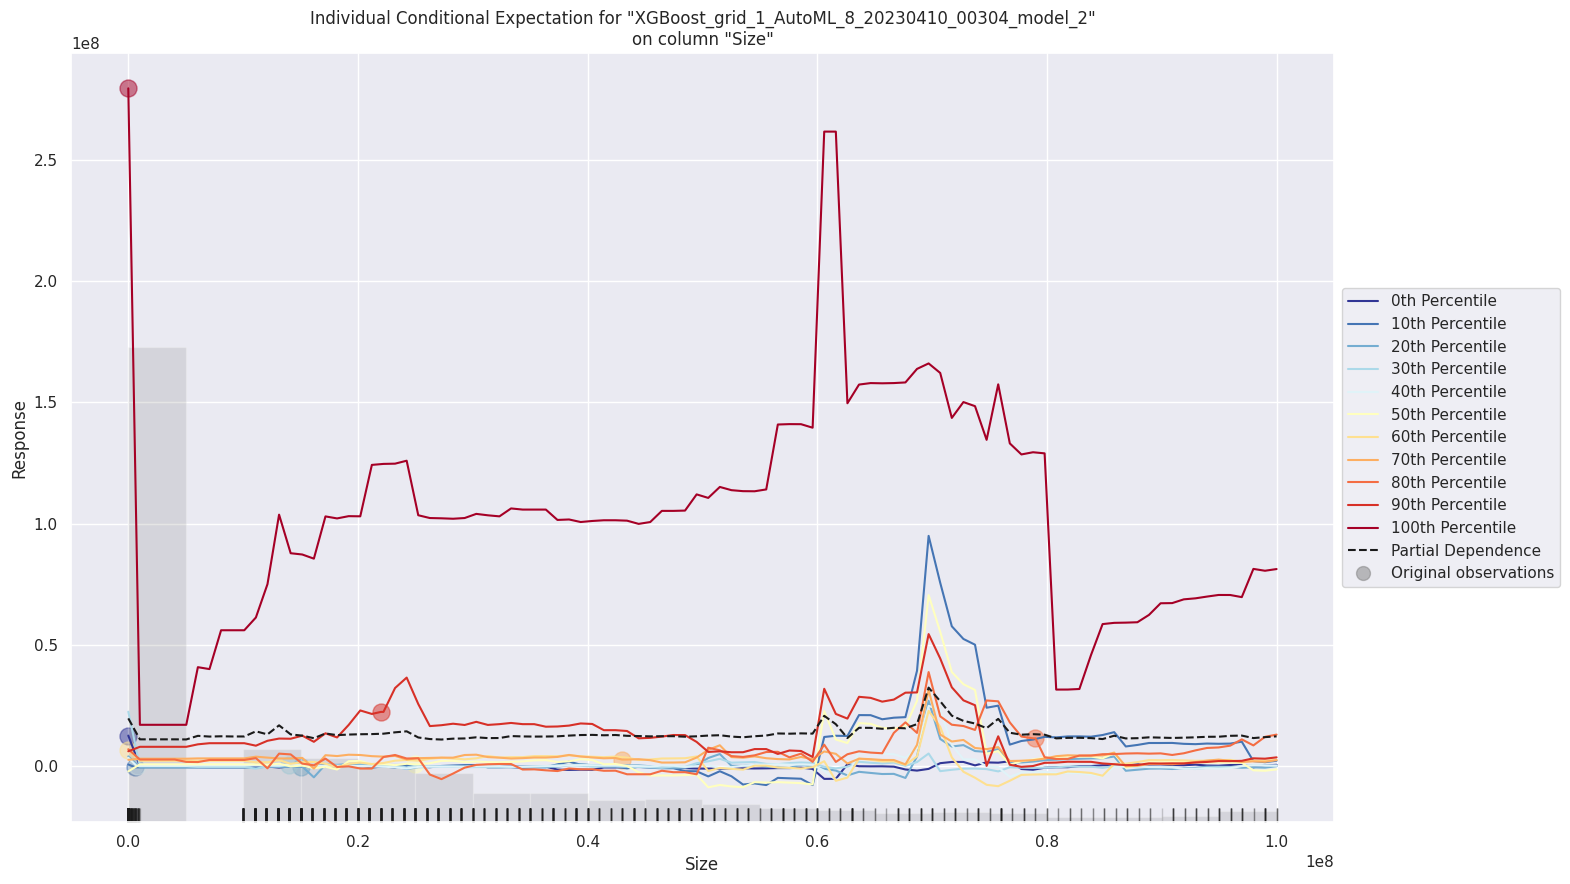

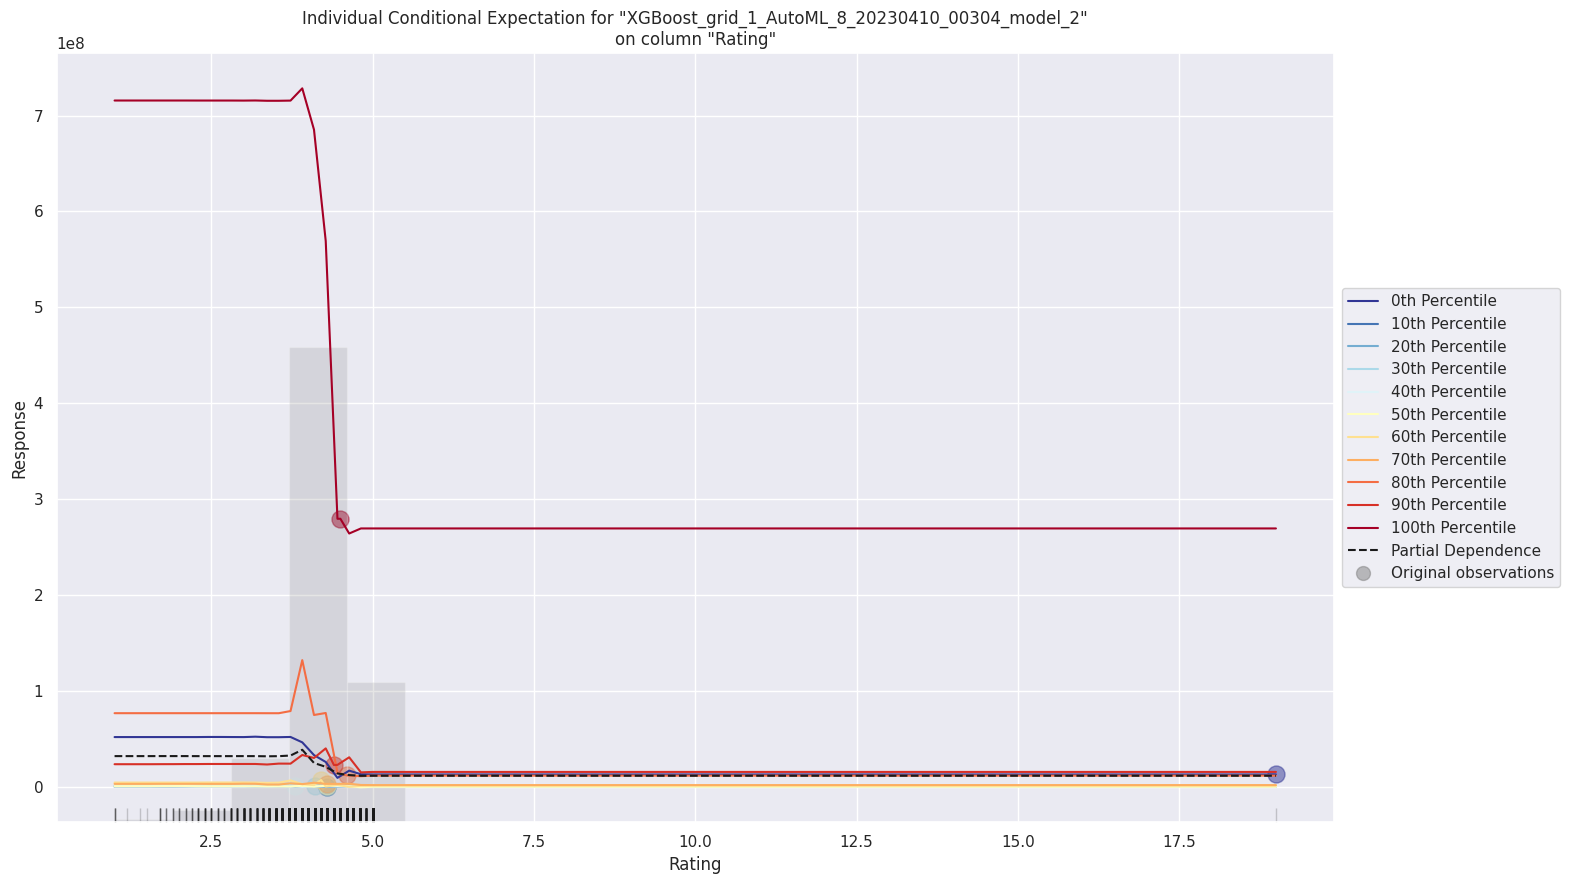

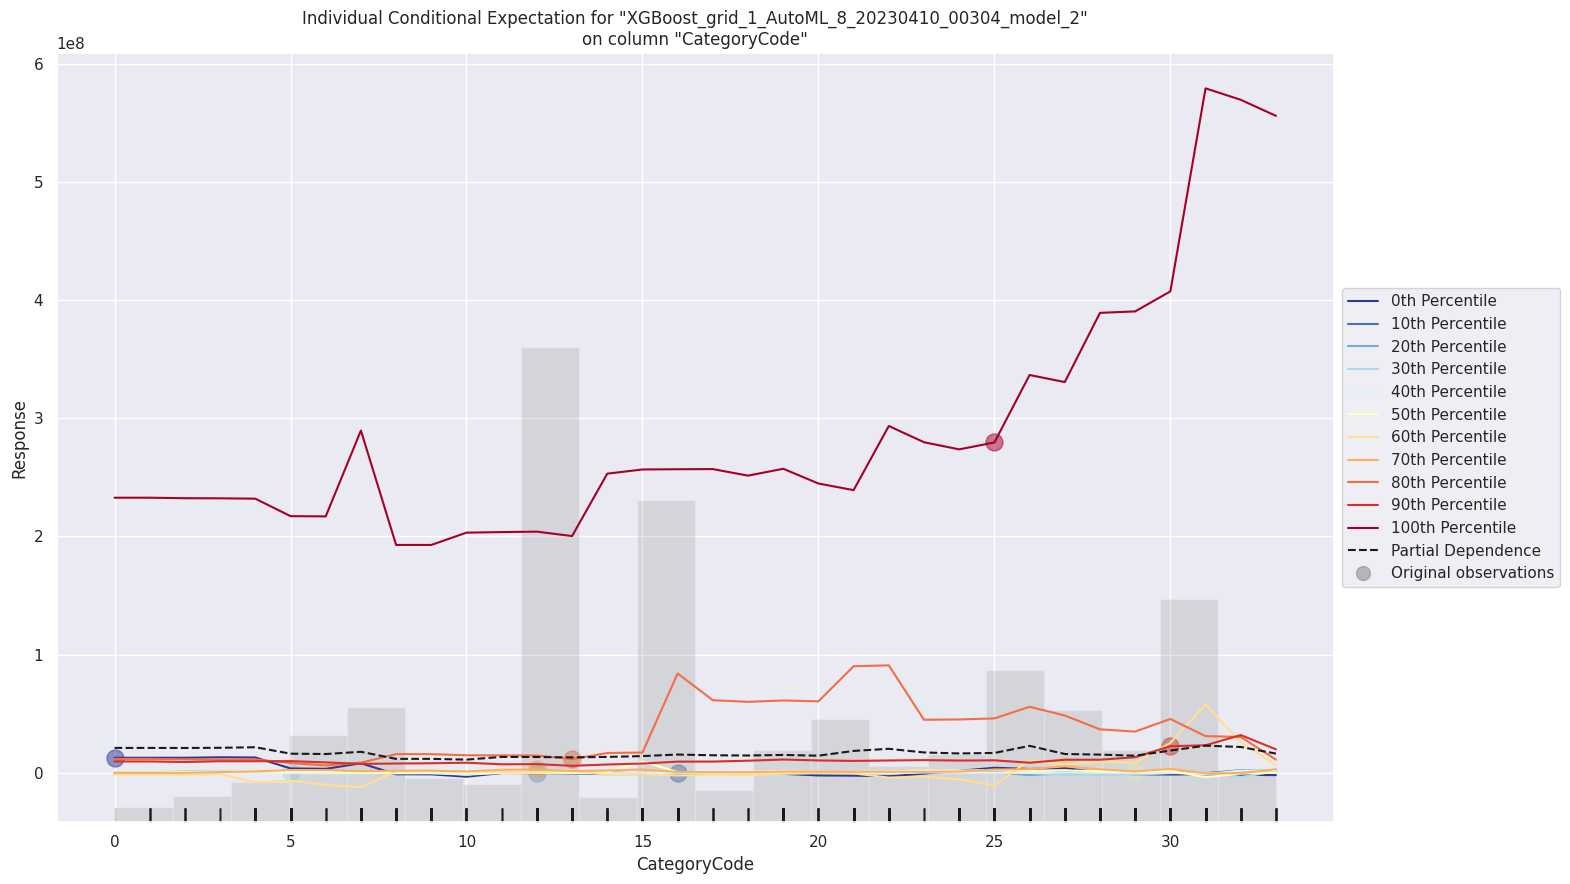

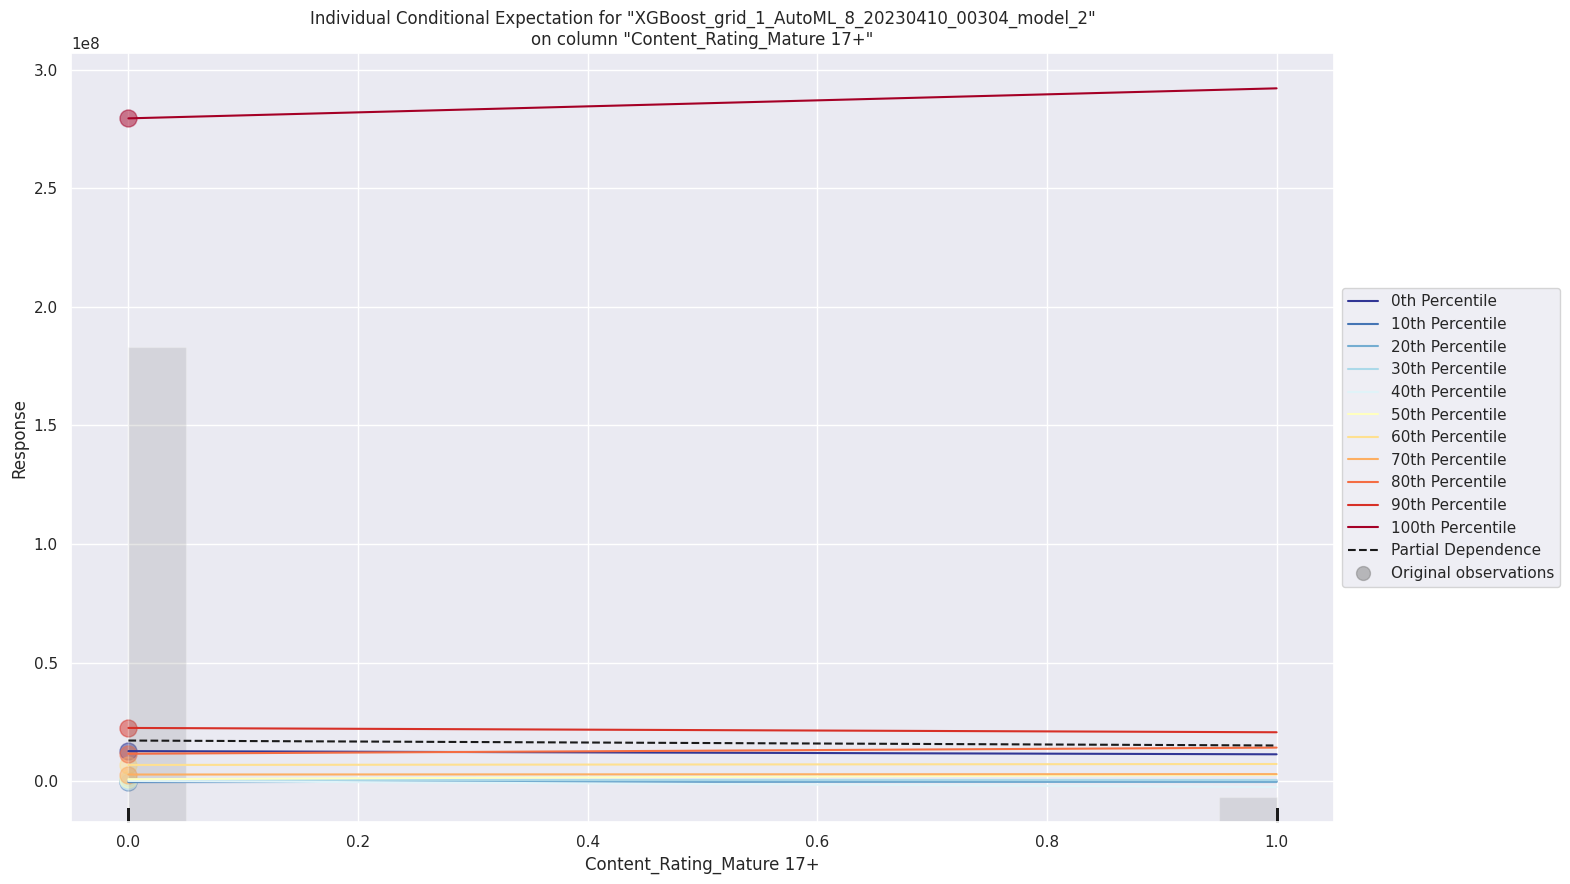

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
autoML_model.explain(autoML[1])  # AutoML Explainability

# Hyperparameter Tuning of AutoML's Best Model

In [ ]:
train, validate, test = np.split(
    new_df.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(X.columns),
    y="Installs",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)


def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")

Parse progress: |

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid2_model_10
Best R2: 0.8945343882552289


"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


# What evaluation metric are you using?
The evaluation metrics which I am using are

1.Mean Squared Error

2.Root Mean Squared Error

3.Mean Absolute Error

4.Mean Residual Deviance

5.Accuracy

--These evaluation metrics are used to evaluate the best model, as it is a regression problem. Here, Mean Residual Deviance and Accuracy are the most important metrics used to evaluate the mode.

--The residual deviance tells us how well the response variable can be predicted by a model with p predictor variables. The lower the value, the better the model is able to predict the value of the response variable.

--Accuracy tells us how correct and precise our model is.

# How do training, validation, and test metrics compare?
The best model (AutoML's Hyperparameter tuned model) has done pretty well on both the Training Dataset as well as Validation Dataset.


In [ ]:
best_drf_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: gbm_grid2_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          505382                 14           14           14            552           995           798.14

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 904607801502111.1
RMSE: 30076698.64699434
MAE: 5539076.5295713255
RMSLE: 2.2073515638177597
Mean Residual Deviance: 904607801502111.1

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 1253513361290850.8
RMSE: 35404990.62689963
MAE: 5811744.648784362
RMSLE: 2.392315562571873
Mean Residual Deviance: 1253513361290850.8

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae     validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  -----------------  ---------------------
     2023-04-09 19:47:35  29.467 sec  0.0                nan                 nan                 nan                  nan                 nan                nan
     2023-04-09 19:47:35  29.509 sec  1.0                54651696.09104141   8163772.181519783   2986807885627551.0   62570955.20649061   9456789.673006872  3915124435452655.0
     2023-04-09 19:47:35  29.541 sec  2.0                46727672.5628207    6813557.097152226   2183475383138186.8   46744393.73549256   7958492.254957196  2185038345698755.5
     2023-04-09 19:47:35  29.569 sec  3.0                48824838.35923925   7385948.171328288   2383864840805840.5   43978192.64024101   7523504.711066131  1934081427902148.5
     2023-04-09 19:47:35  29.596 sec  4.0                45558061.284362085  6901169.068771059   2075536947989691.5   42582519.061009325  7247405.000932039  1813270929581222.5
     2023-04-09 19:47:35  29.624 sec  5.0                45554063.719773024  7177814.968640941   2075172721385140.8   39645387.42992509   6787676.591988922  1571756744468862.8
     2023-04-09 19:47:35  29.652 sec  6.0                47179503.1024089    7306078.716064405   2225905512990211.0   39511316.19770548   6654073.643089721  1561144107675063.0
     2023-04-09 19:47:35  29.683 sec  7.0                46482820.75512471   7353636.0463270005  2160652625353052.5   39101262.13117441   6567302.271289812  1528908700250814.0
     2023-04-09 19:47:35  29.717 sec  8.0                45225594.93528459   7078152.007412196   2045354437250439.2   38623689.15487866   6503326.786715197  1491789363932691.8
     2023-04-09 19:47:35  29.748 sec  9.0                44165512.92356417   6908506.494272307   1950592531801514.0   38009764.33641039   6345750.882113715  1444742184909455.0
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                ---
     2023-04-09 19:47:36  31.205 sec  41.0               31249082.759719368  5669984.944351331   976505173323790.2    36095901.35479279   5899822.012821147  1302914094614932.0
     2023-04-09 19:47:36  31.274 sec  42.0               31004748.168292105  5702070.636999203   961294408979212.8    36129275.01809637   5890417.075673658  1305324513333242.8
     2023-04-09 19:47:36  31.334 sec  43.0               30956471.271921612  5685748.180830102   958303113609308.0    35958134.11440926   5887699.55695016   1292987408989843.0
     2023-04-09 19:47:37  31.395 sec  44.0               30910125.589482866  5681952.540203136   955435863957603.5    35860570.82280197   5861770.272840852  1285980539737196.0
     2023-04-09 19:47:37

In [ ]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_drf_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["Installs"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# Model Selection

In [ ]:
svm_explainer = shap.Explainer(svm_model.predict, x_train_100)
svm_shap_values = svm_explainer(x_train_100)

Permutation explainer: 101it [24:01, 14.41s/it]


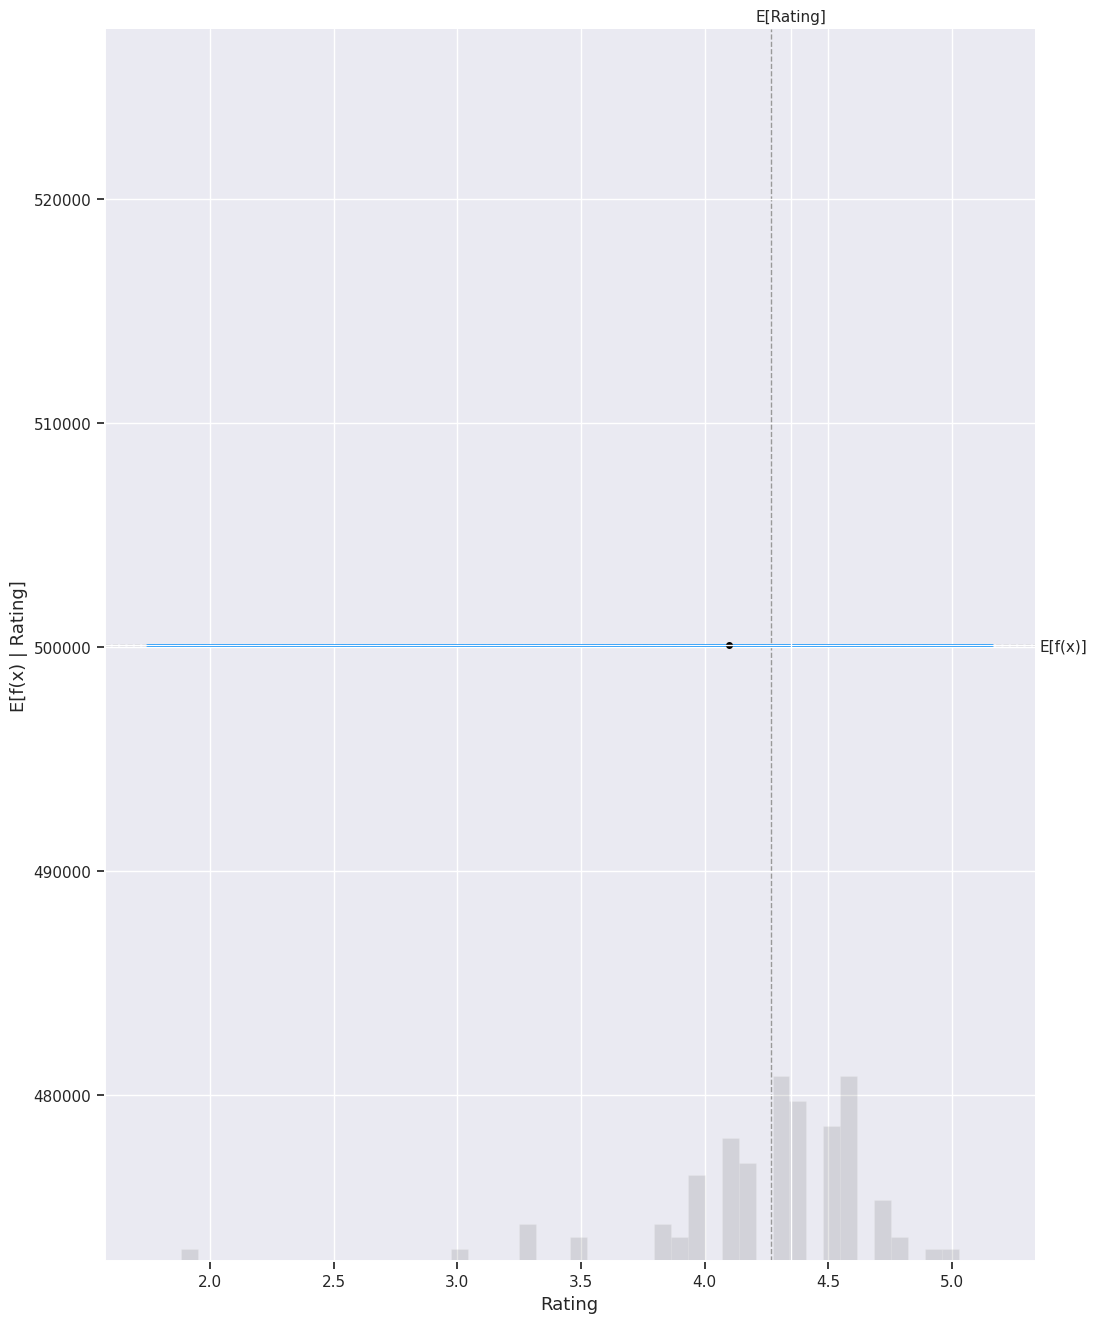

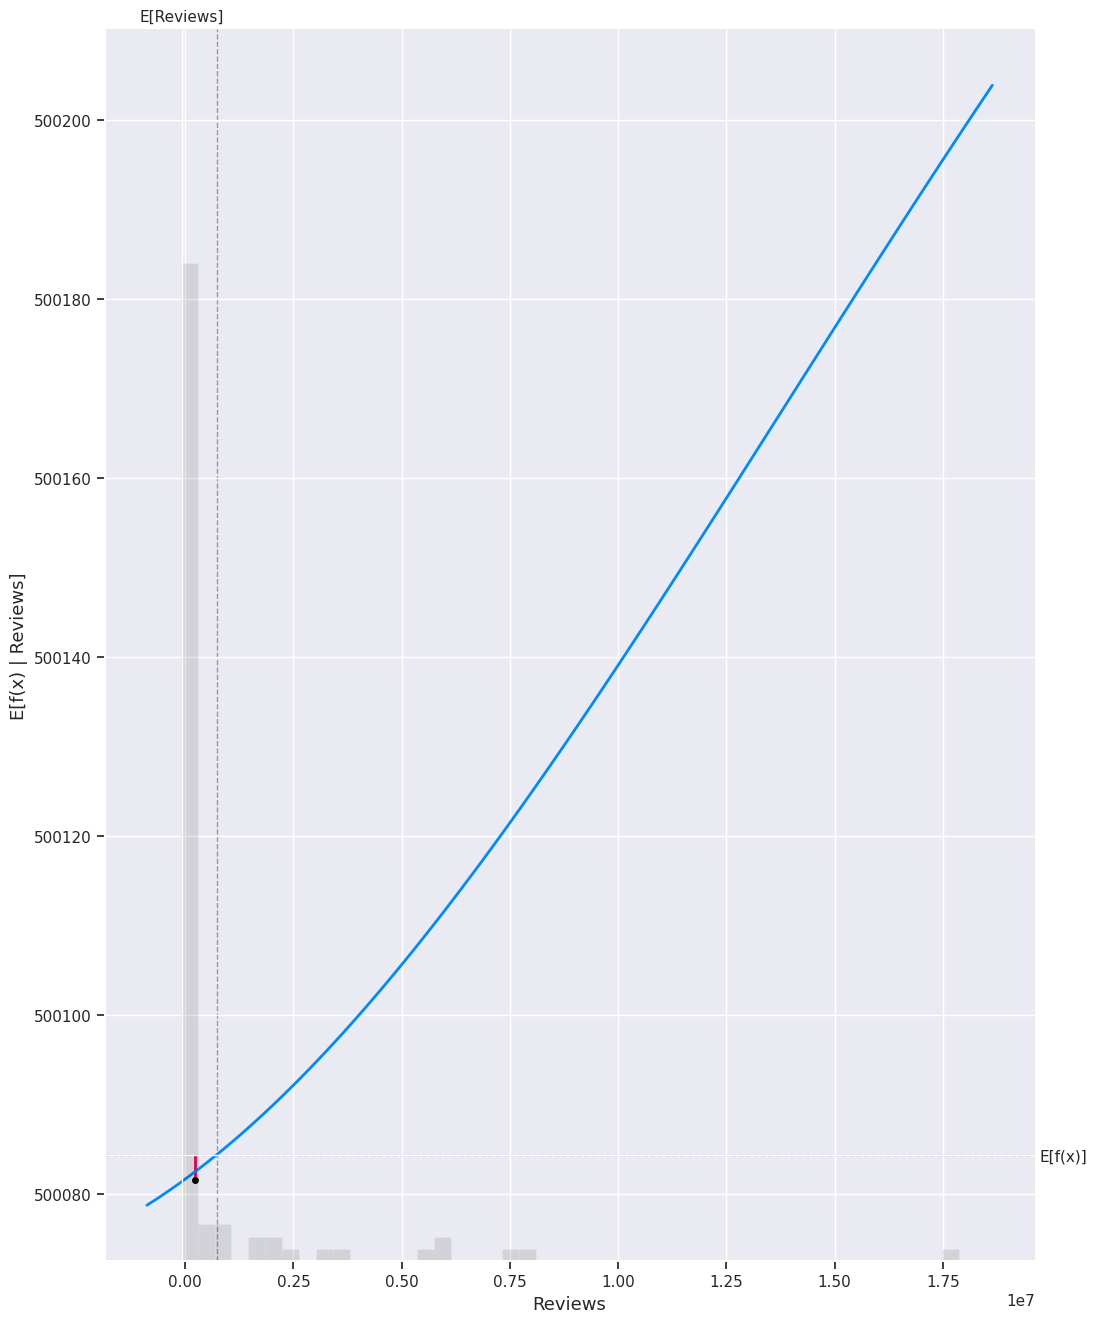

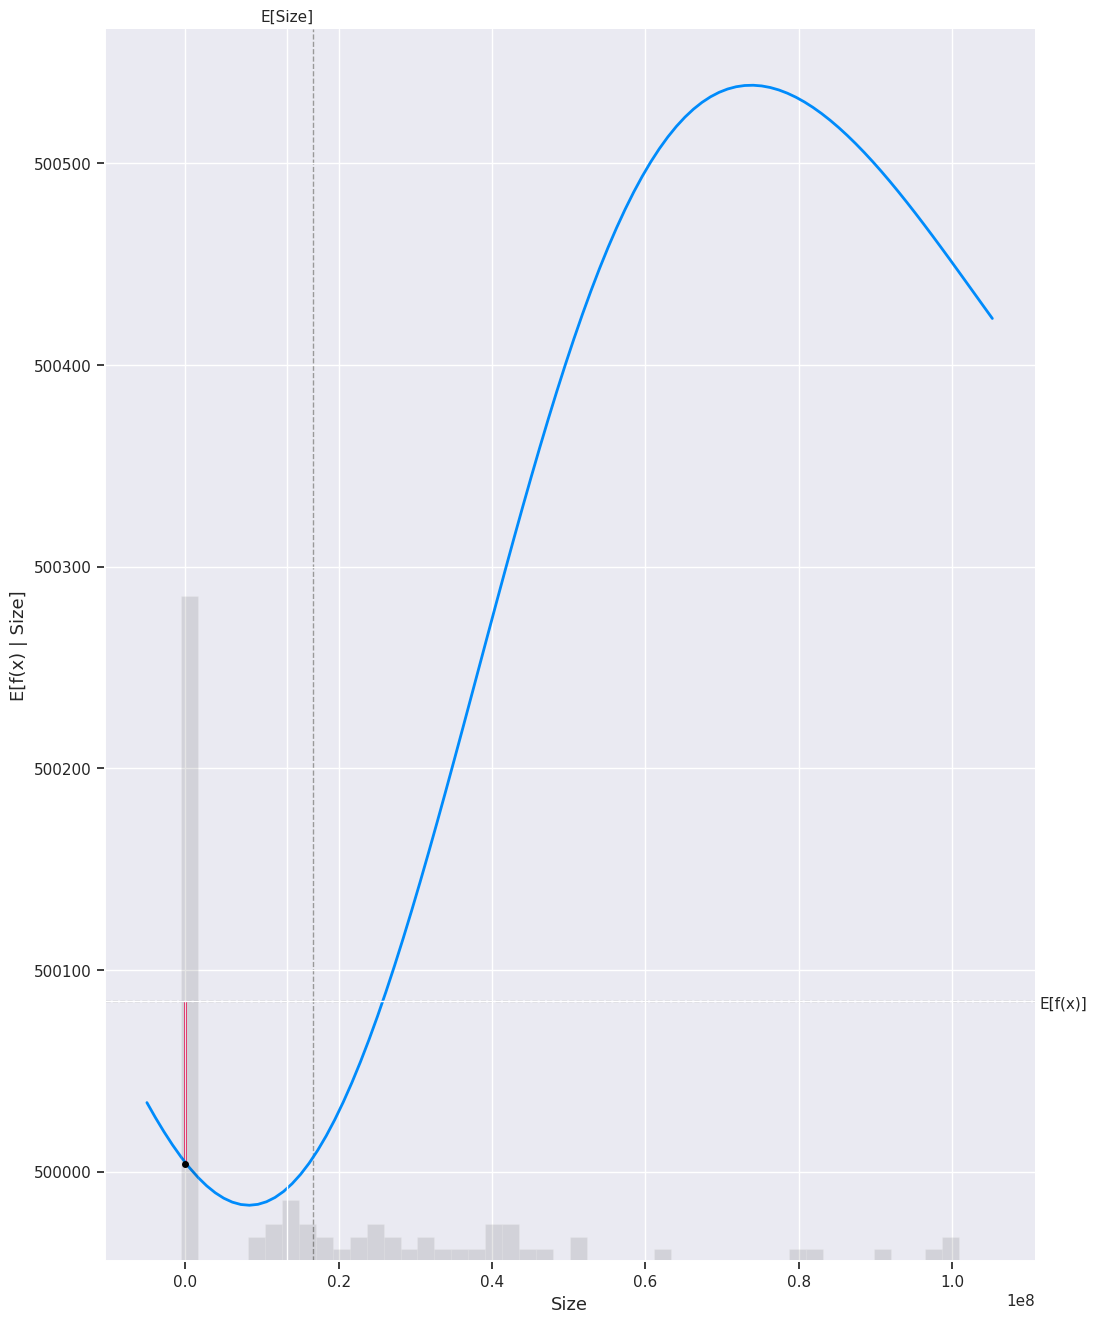

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.


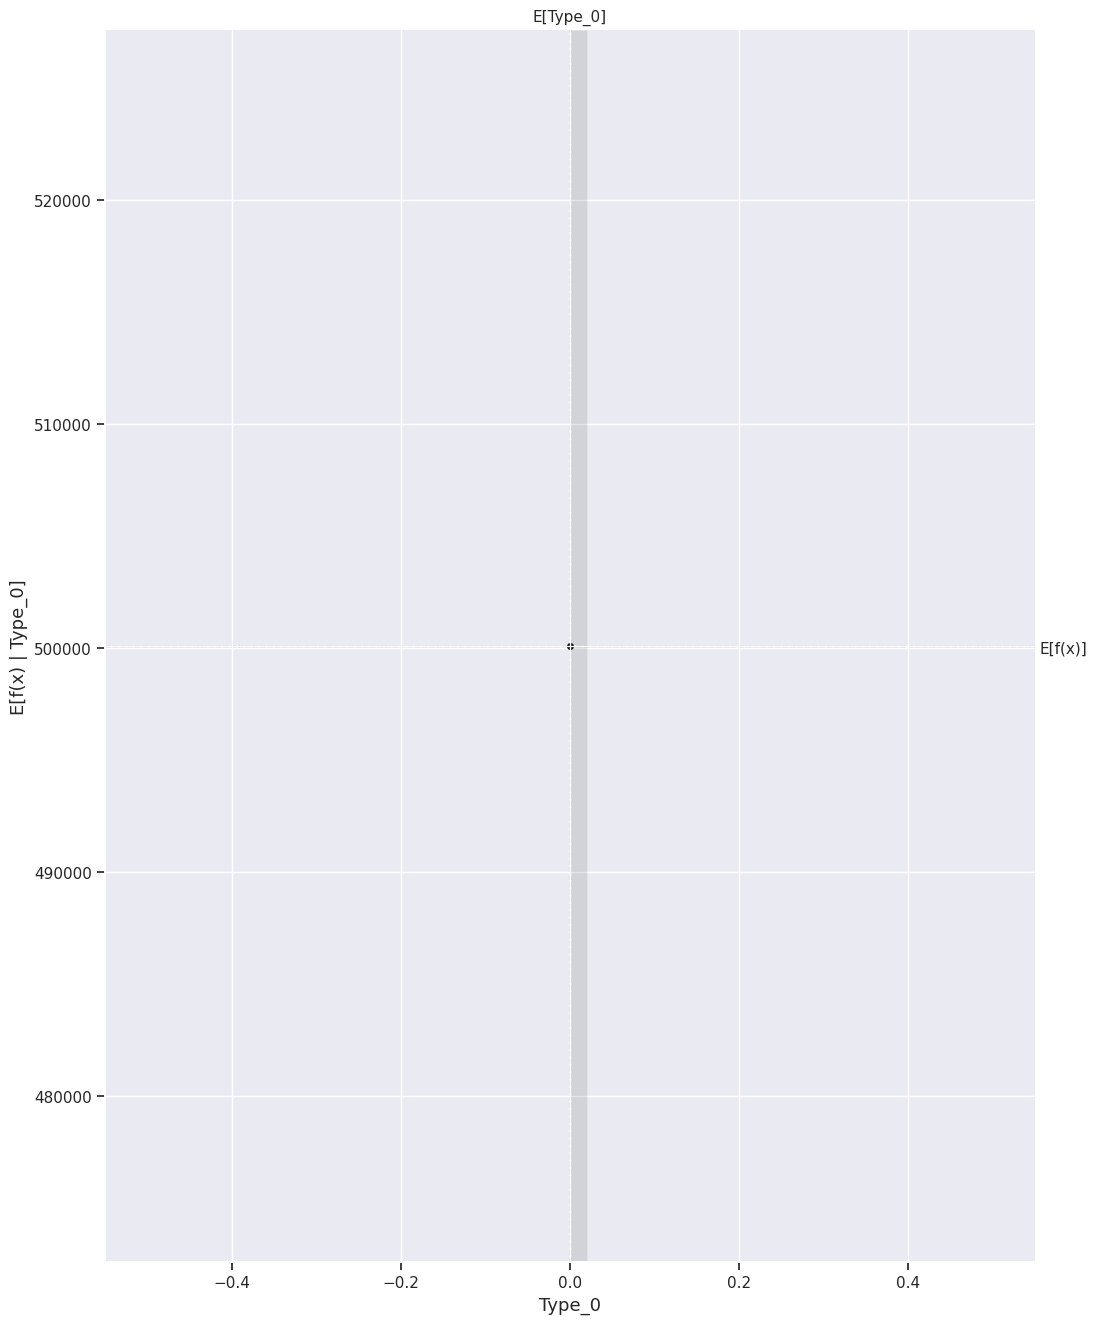

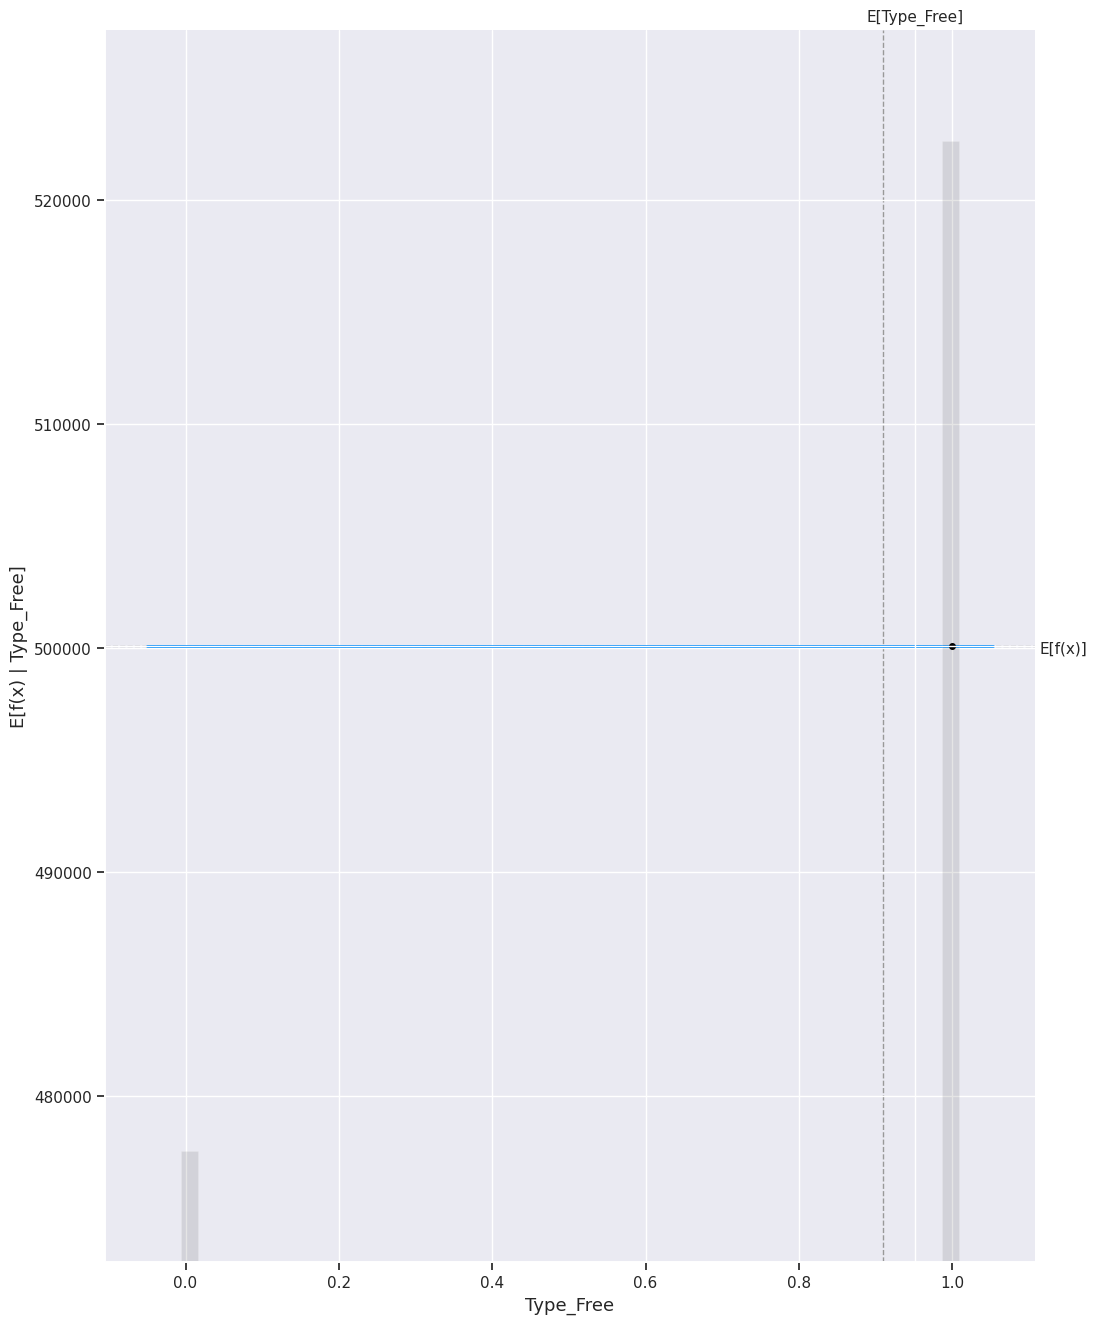

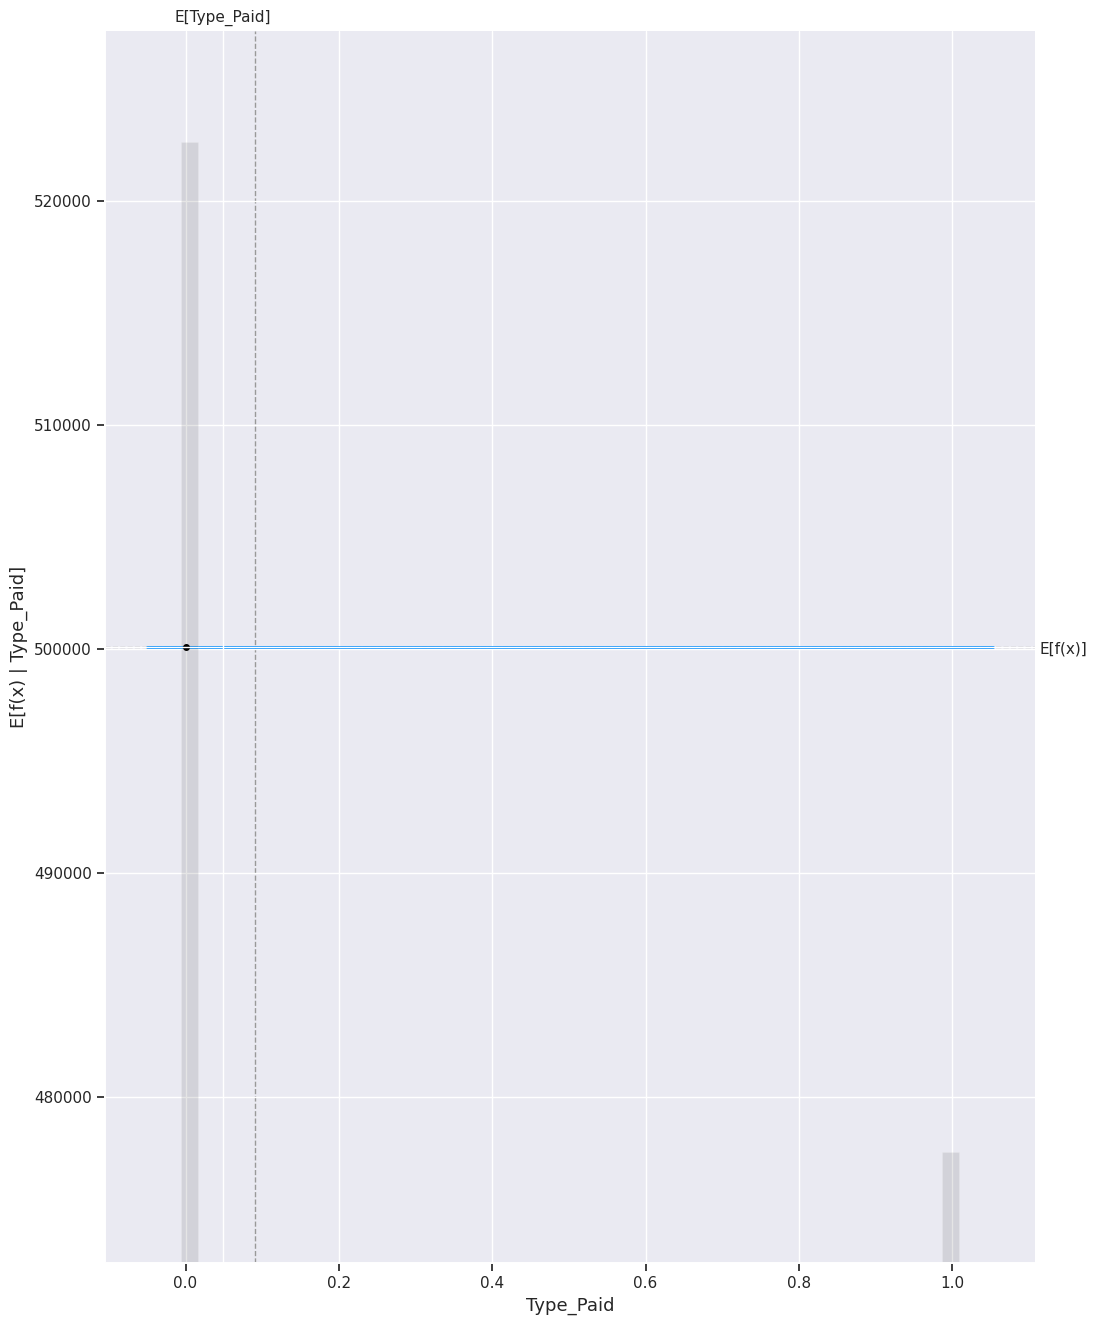

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.


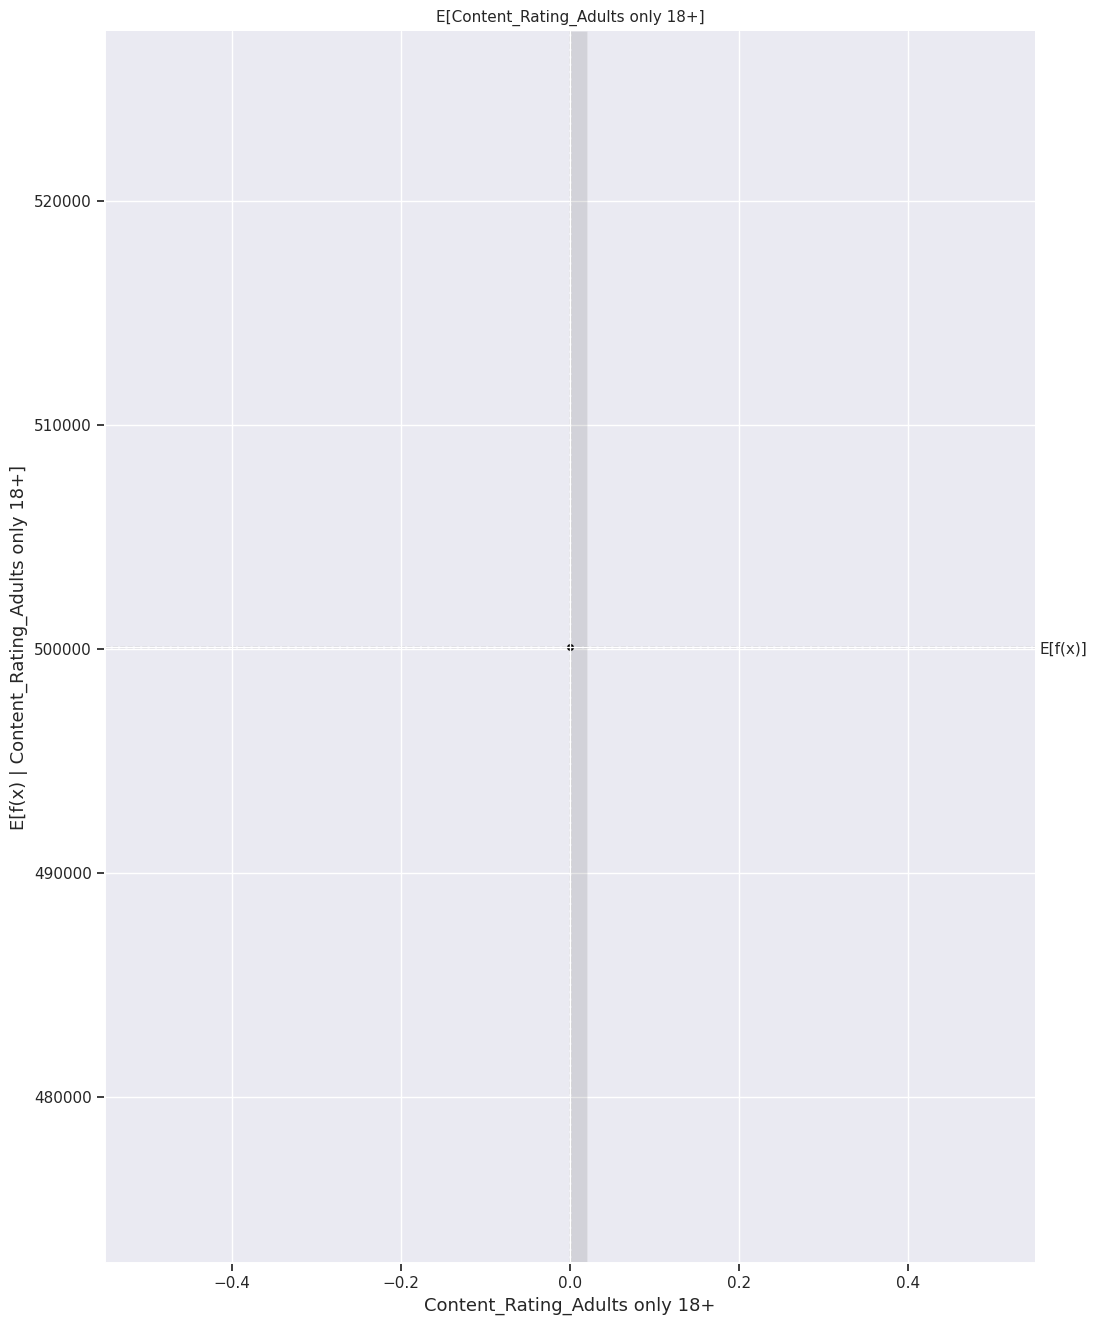

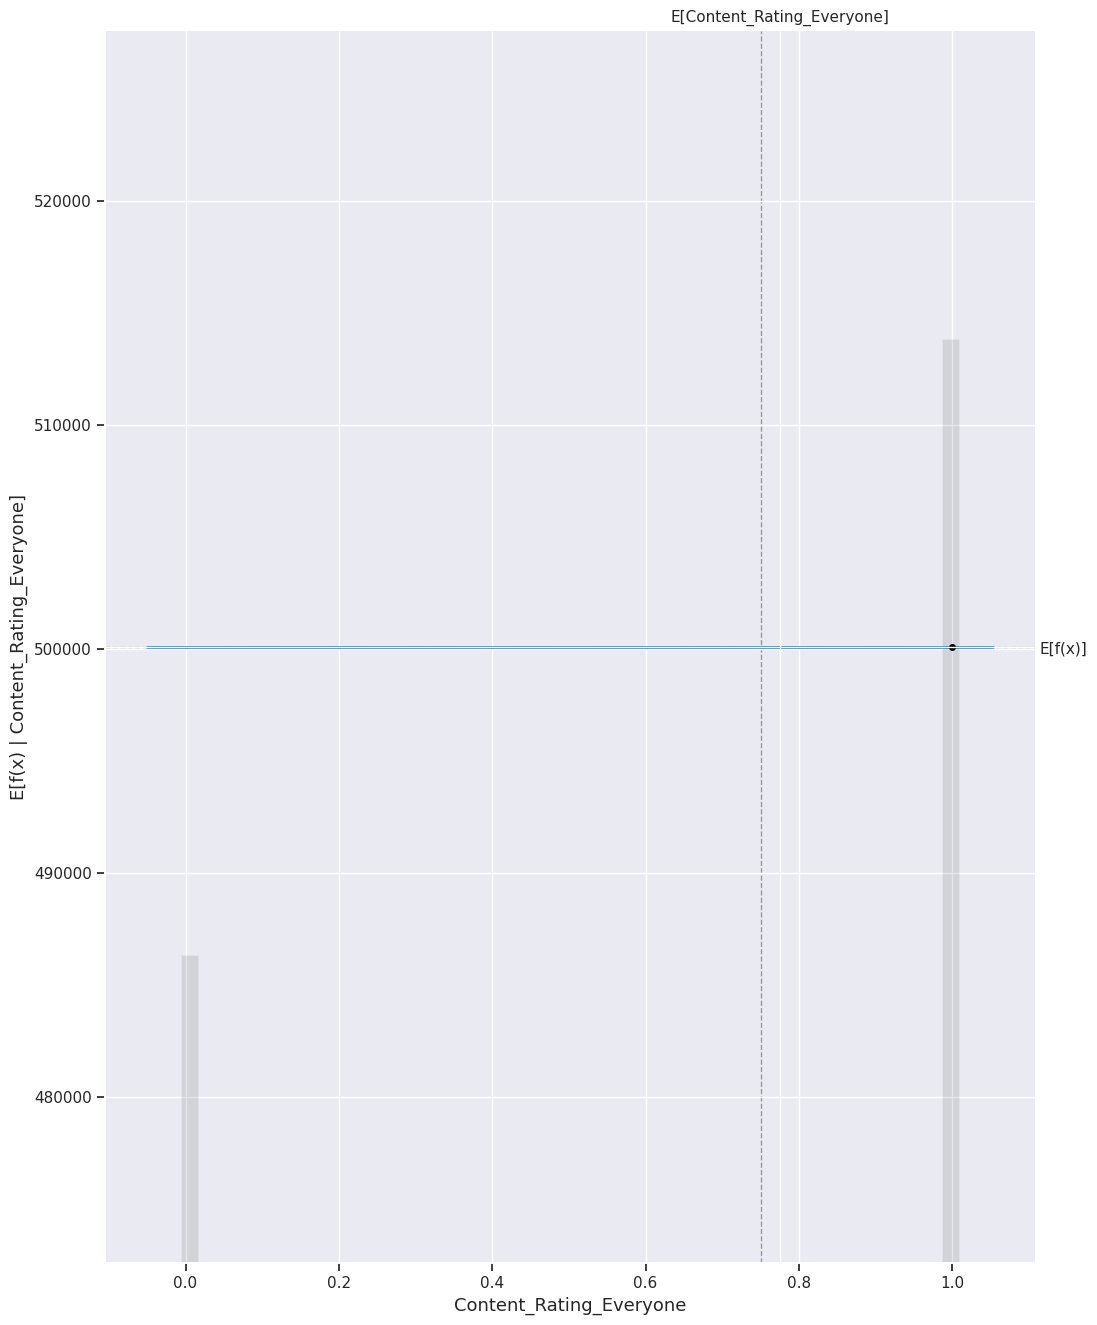

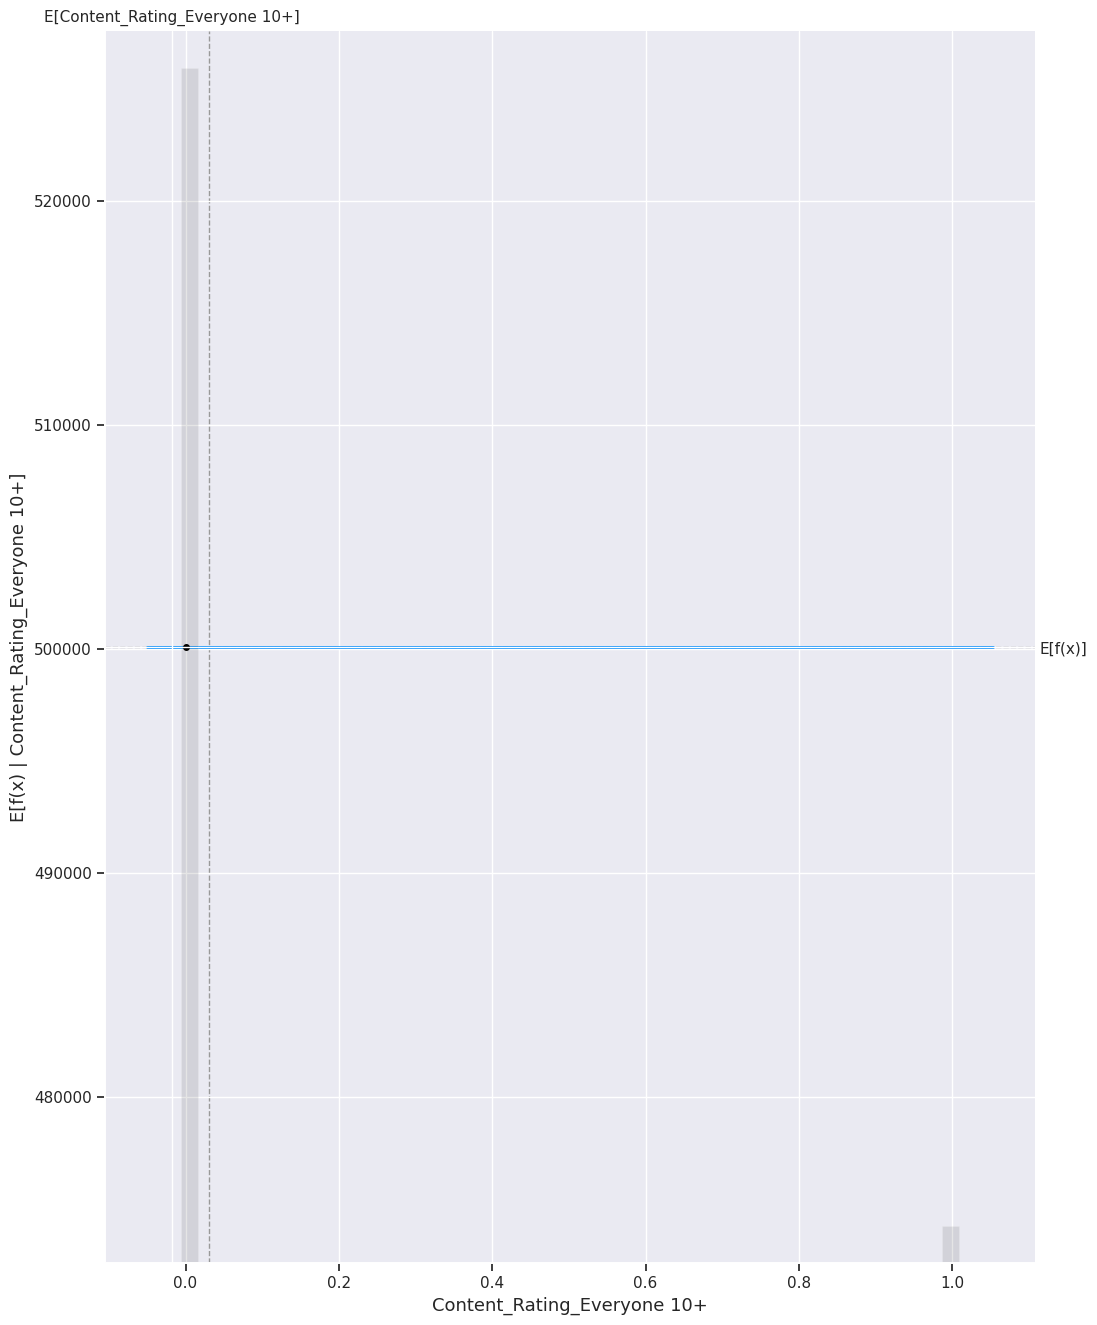

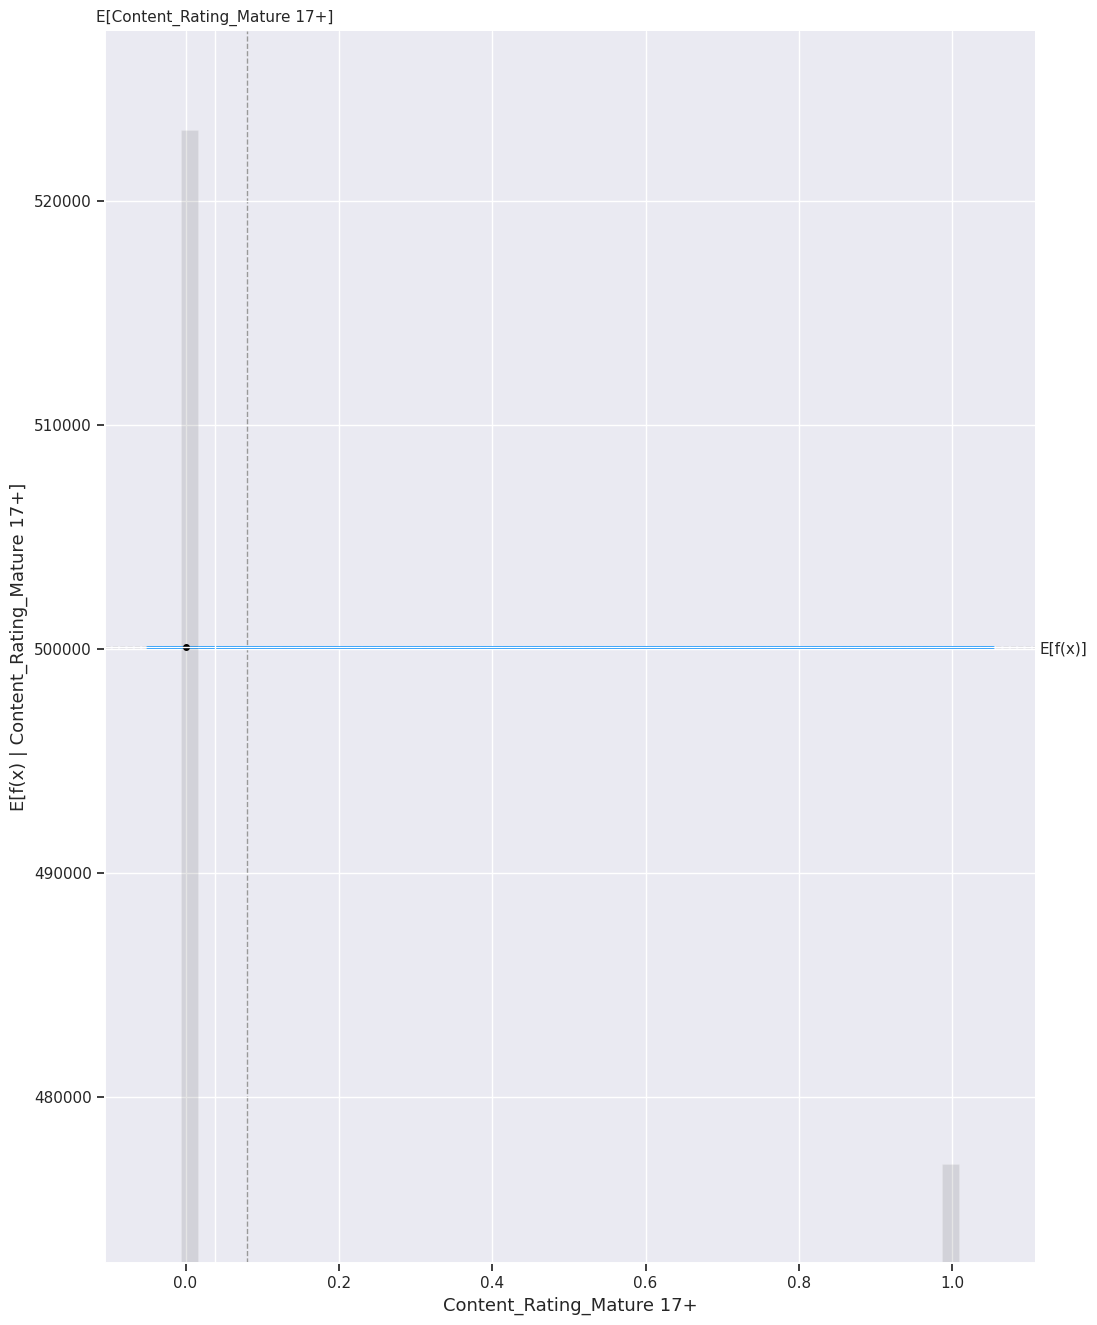

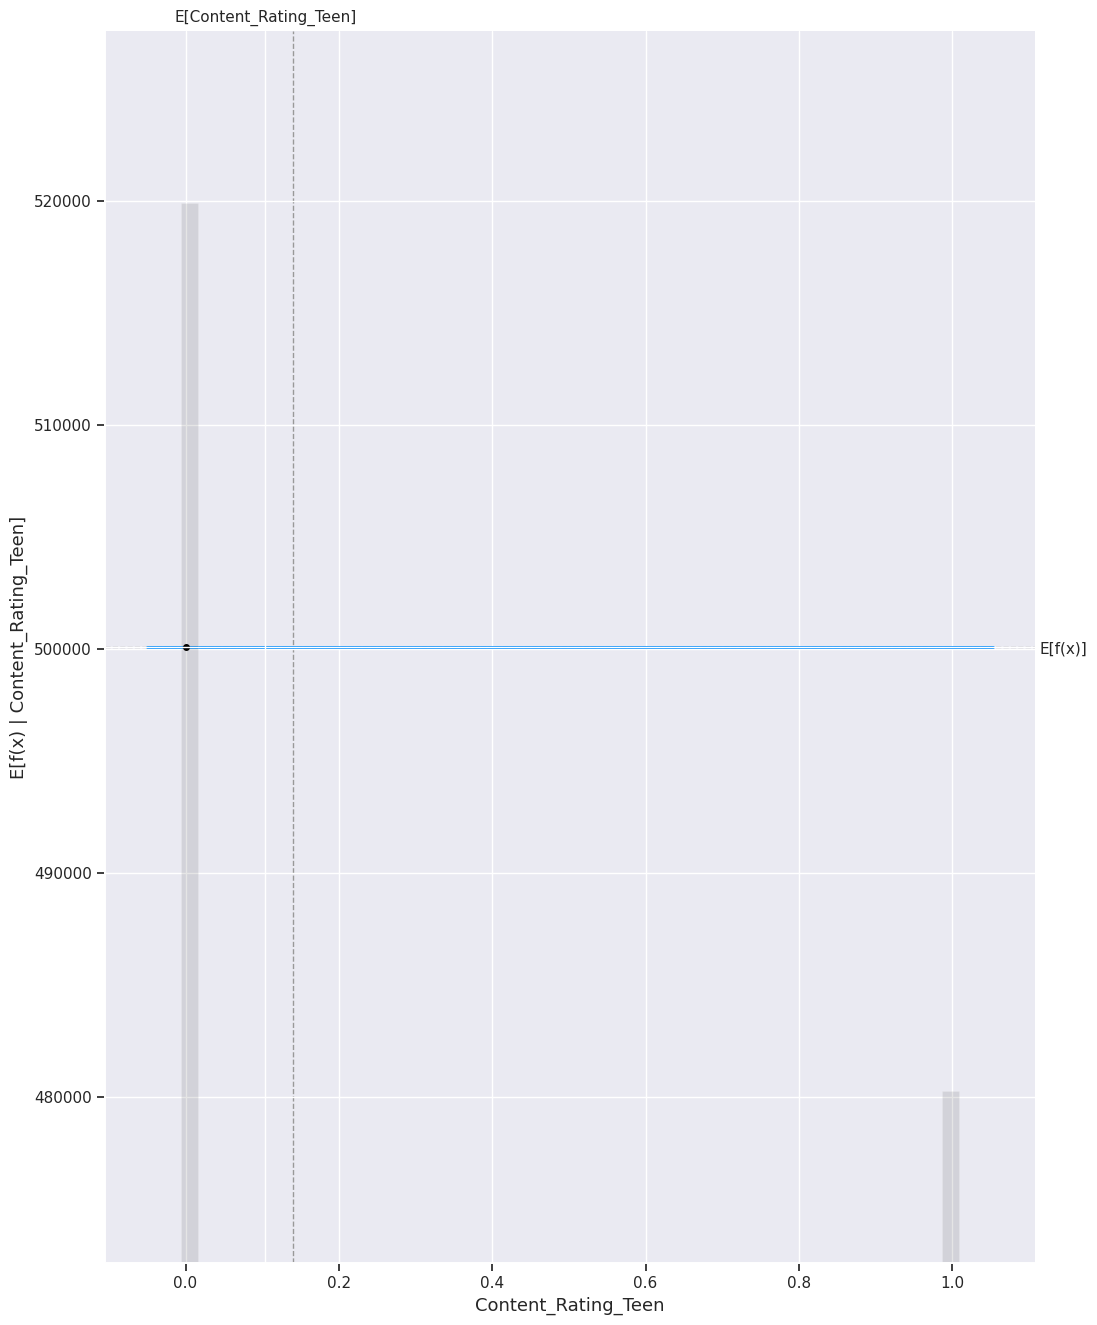

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.


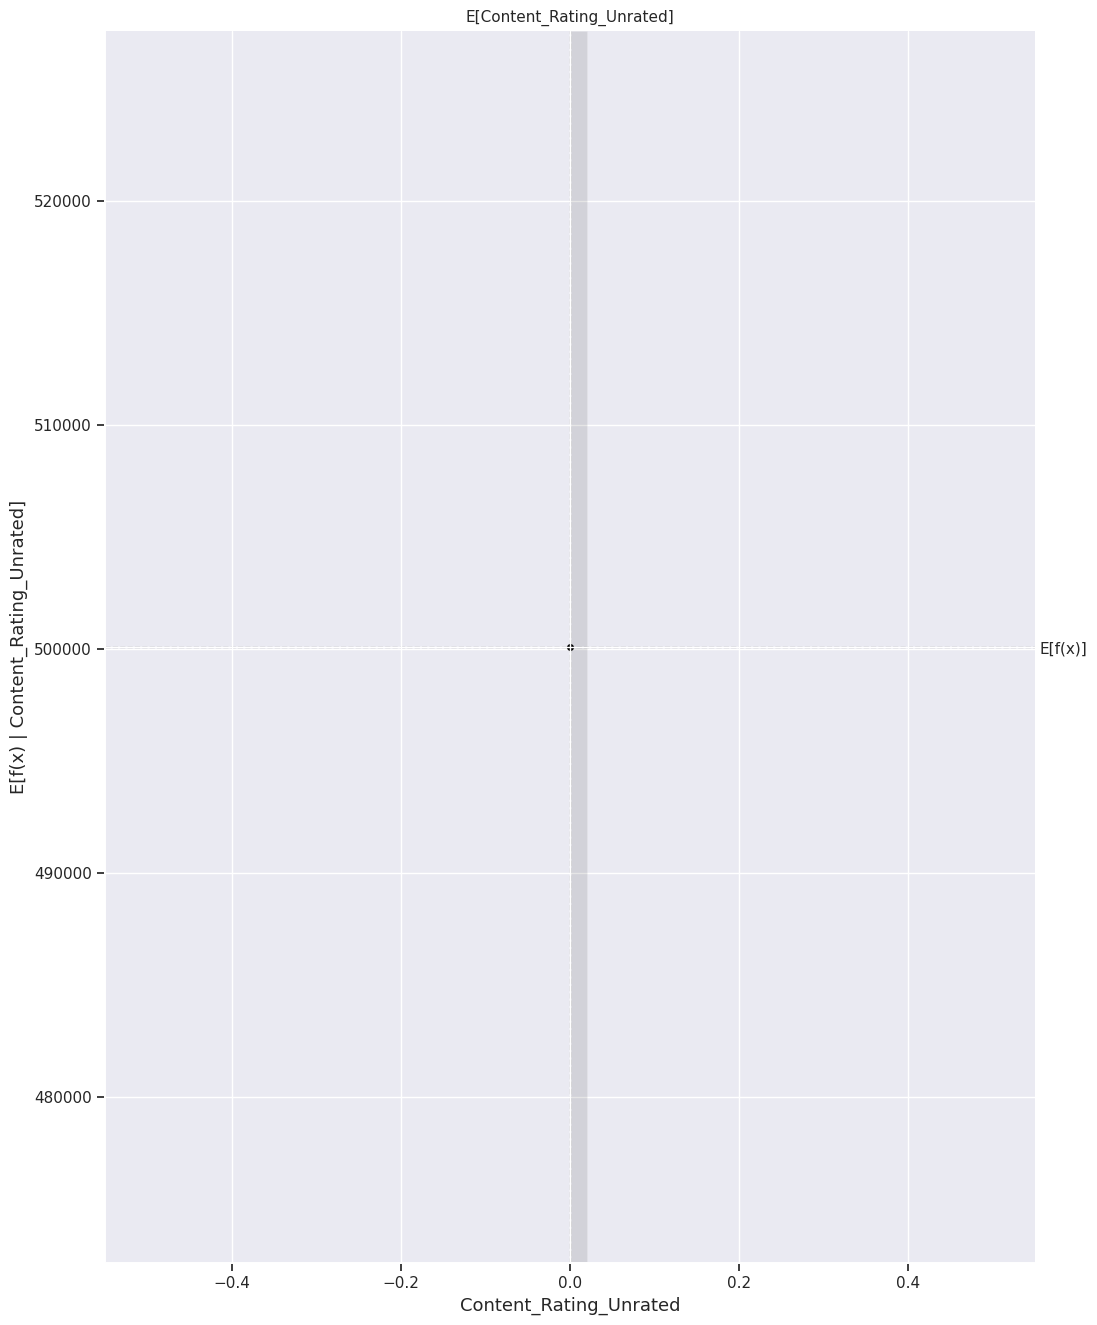

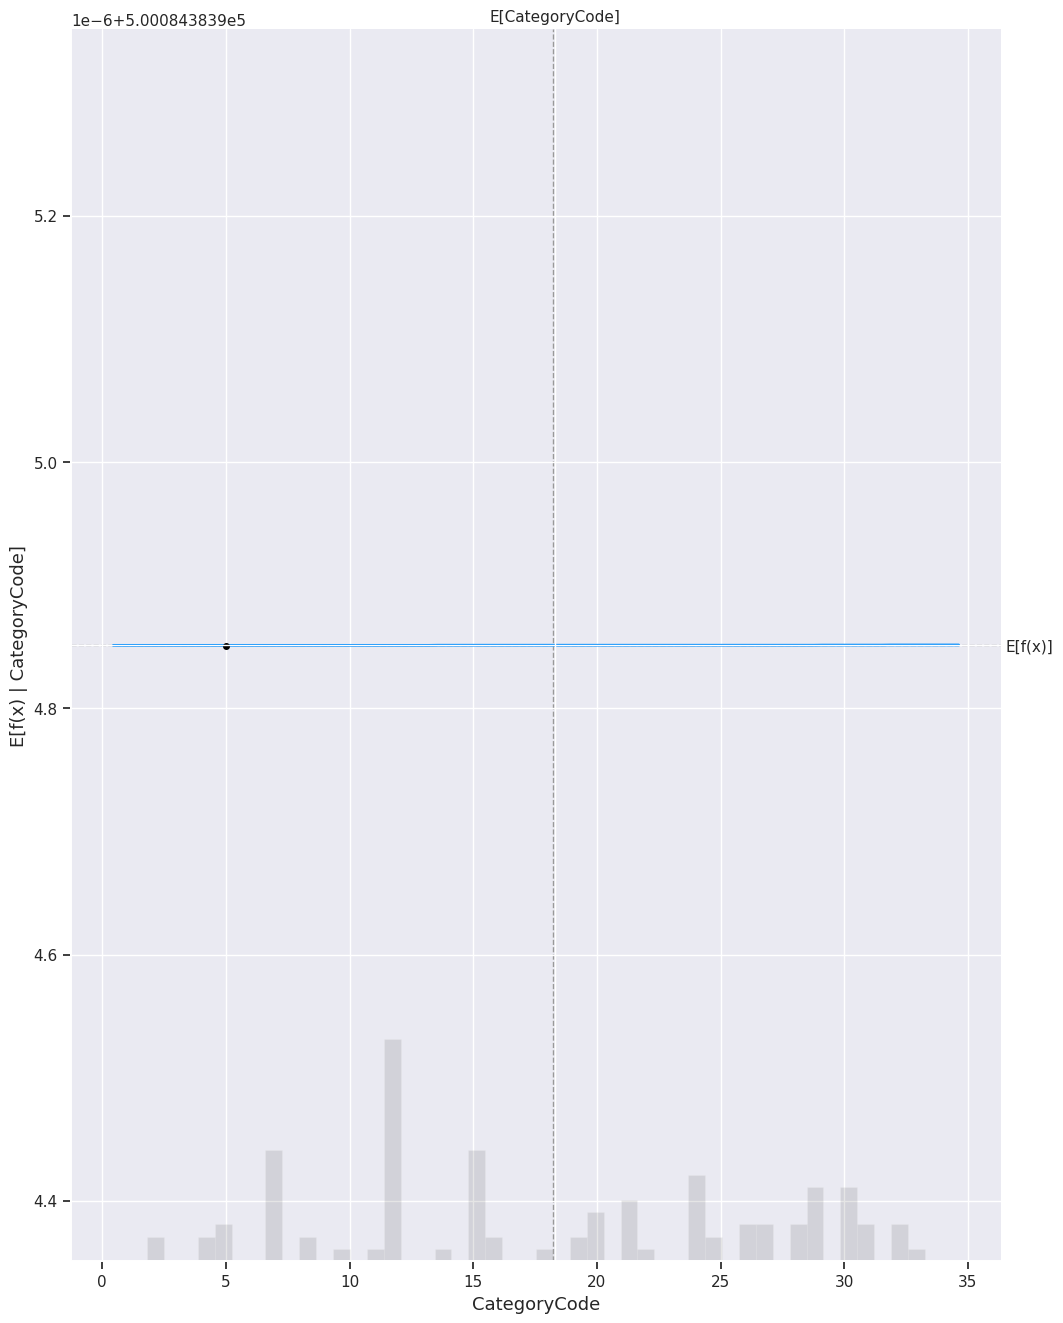

In [ ]:
for i in x_train_100.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        svm_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=svm_shap_values[sample_ind : sample_ind + 1, :],
    )

# Interpreting SHAP Feature Importance Plot for Linear and Tree-based model

It's easy to understand the concept underlying SHAP feature importance: Features with high absolute Shapley values are significant. We average the absolute Shapley values for each feature throughout the data because we want to determine global relevance. The features are then sorted and plotted in decreasing order of relevance.

The following plot is

SHAP feature importance plot for SVM model Using the above plot we can come to the conclusion that the Size is the most important feature, followed by Reviews.

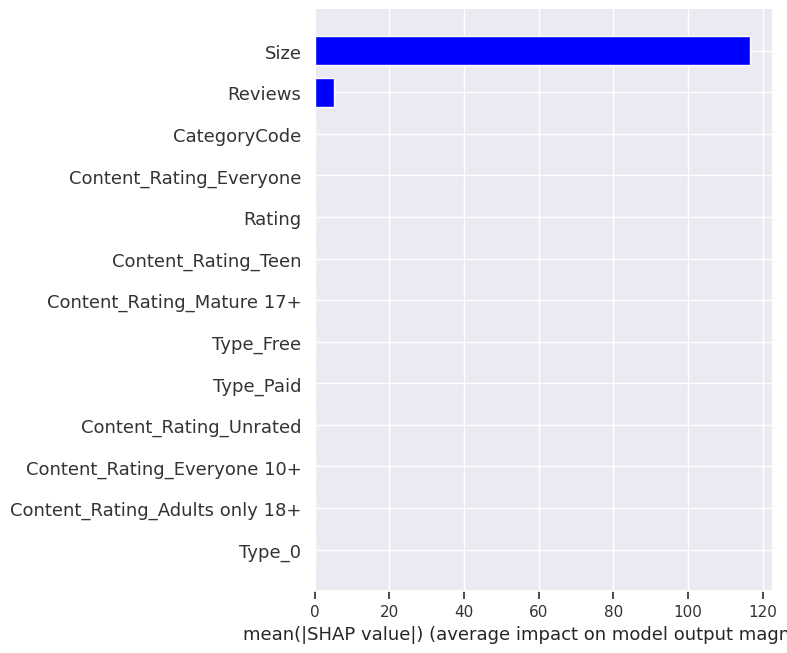

In [ ]:
# SHAP variable importance for a Linear Model
shap.summary_plot(svm_shap_values, x_train, plot_type="bar", color="blue")

In [ ]:
# Waterfall plot for linear model
def get_SHAP(index=18):
    shap.plots.waterfall(svm_shap_values[index], max_display=14)

# Interpreting Waterfall SHAP visualization
Let's consider the same sample (sample_ind = 18).
It says that f(x) = 5000000.786 is what we got as a model output and the expected output for this sample was 5e+0834.384. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that Size has the biggest and most positive impact in increasing the Installs of an App. Followed by Reviews.

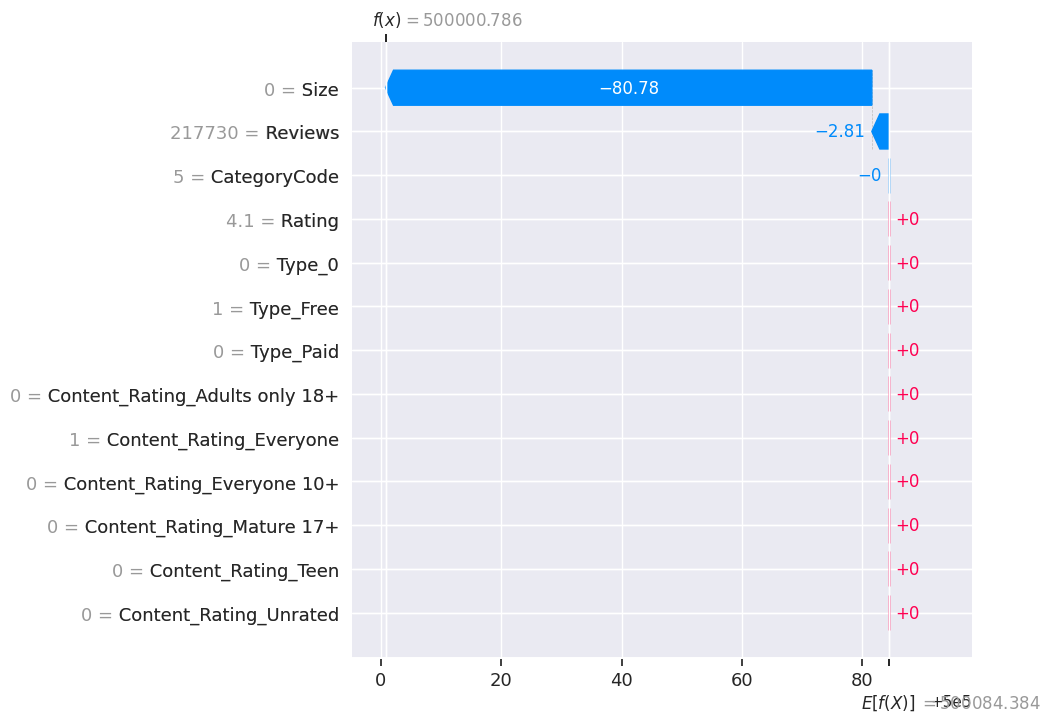

In [ ]:
get_SHAP()

# Interpret the summary plot SVM Model
Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

Each dot(both red and blue) represents a feature of a Google Play Store APP
Red color represents high values whereas blue color represents low value
If a dot(a feature of Google Play Store App) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
The position of a dot(a feature of Google Play Store App) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.
Let us try to understand how the features are affecting the model.

Higher value of Size tends to have a positive impact on the Installs of an app
Higher values of Reviews tends to have a positive impact on the Installs of an app.
We could also interpret the intensity of impact

This visualization is very useful when it comes to interpreting how our model is working.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


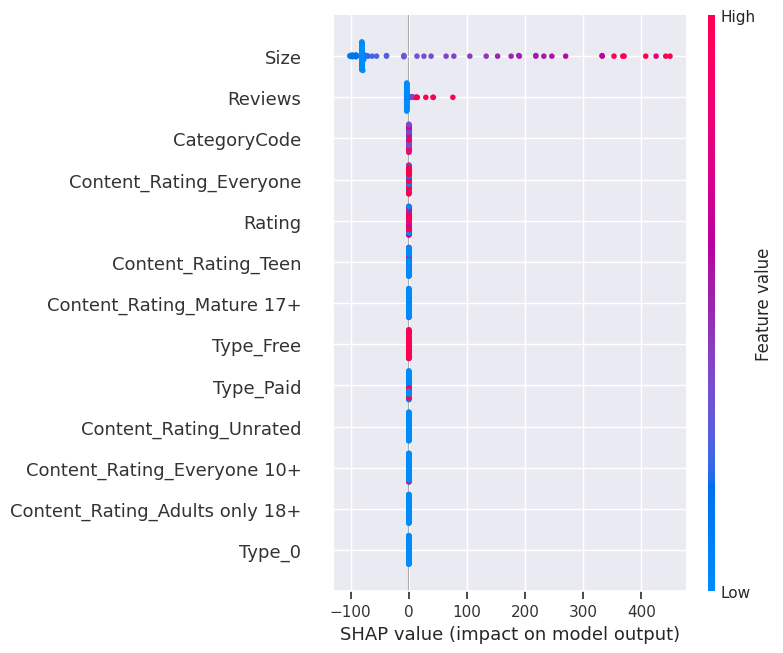

In [ ]:
# SHAP summary for Linear Model
shap.summary_plot(svm_shap_values, x_train_100)

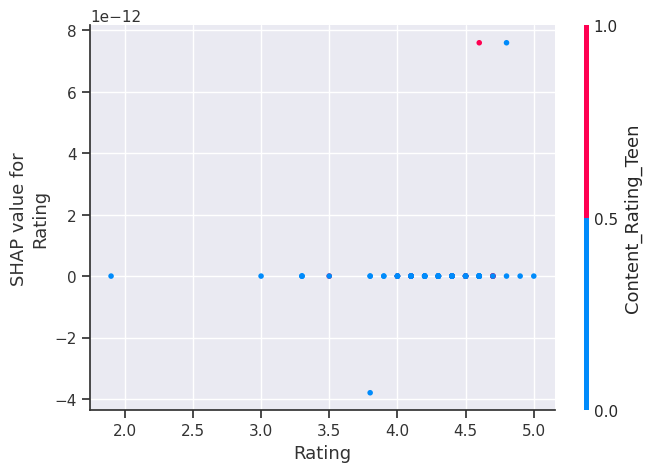

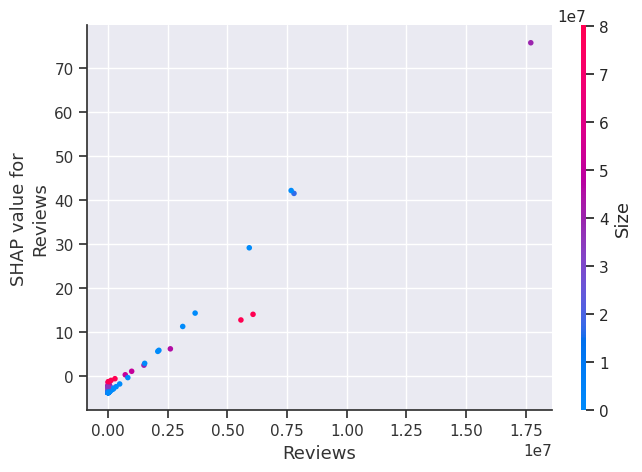

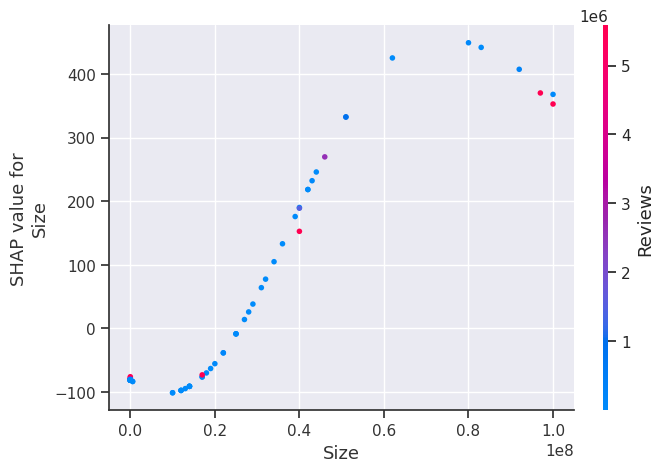

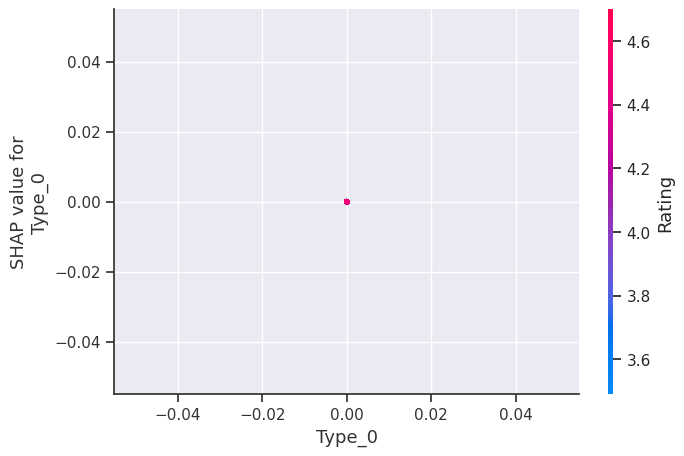

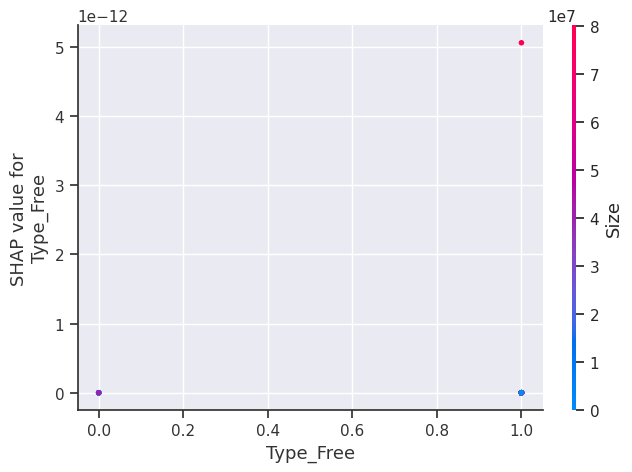

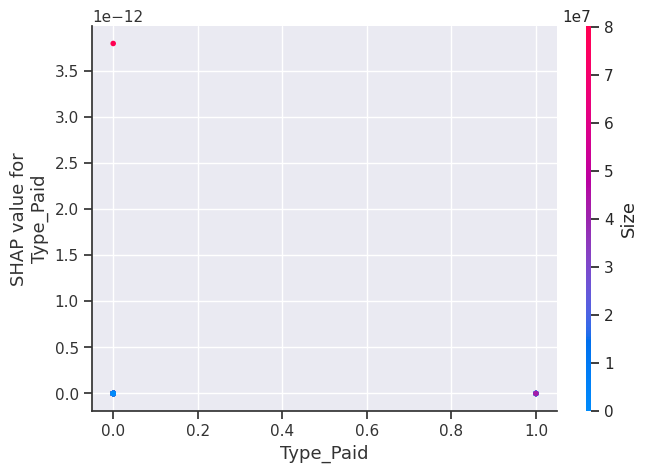

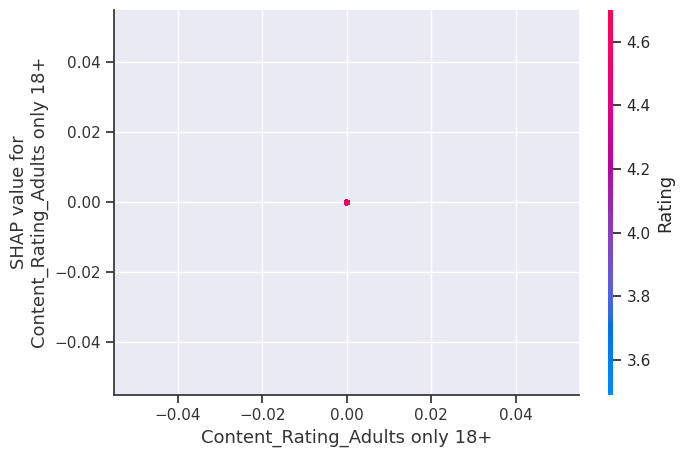

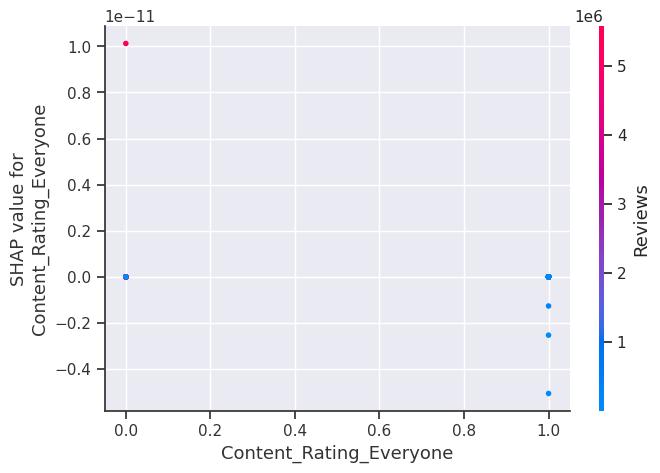

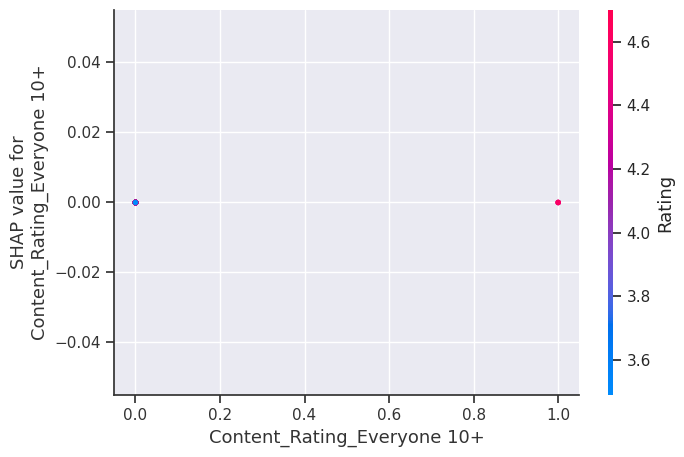

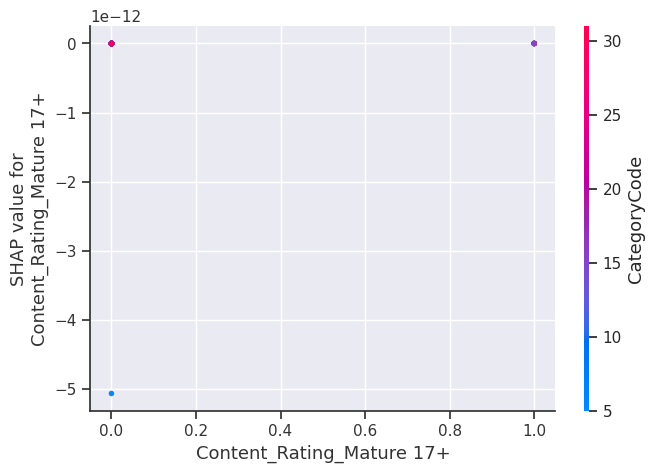

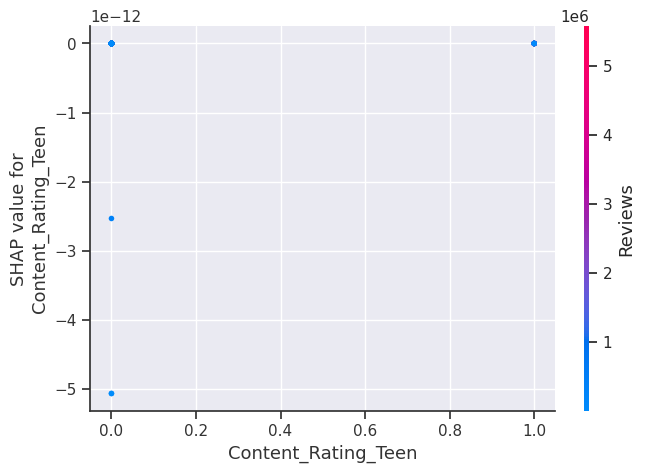

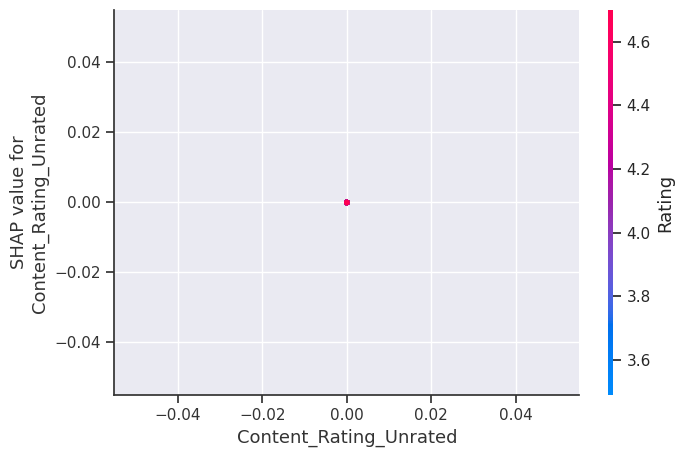

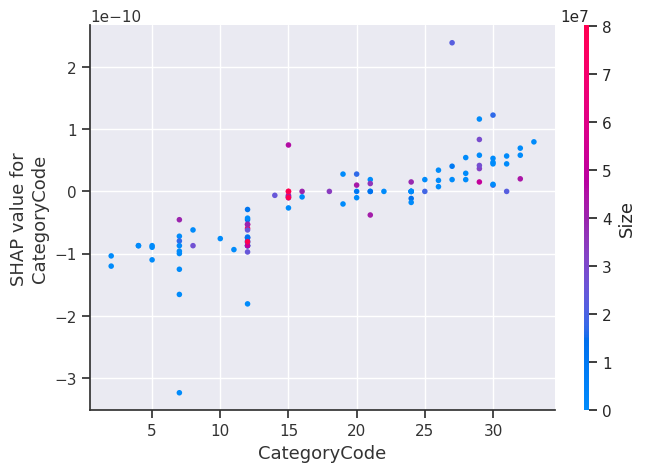

In [ ]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, svm_shap_values.values, x_train_100)

# Heatmap Visualization for Linear and Tree-based model
This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target(Installs).
Here the Y-axis is Features
and X-axis is Instance of that feature
The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect
The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is

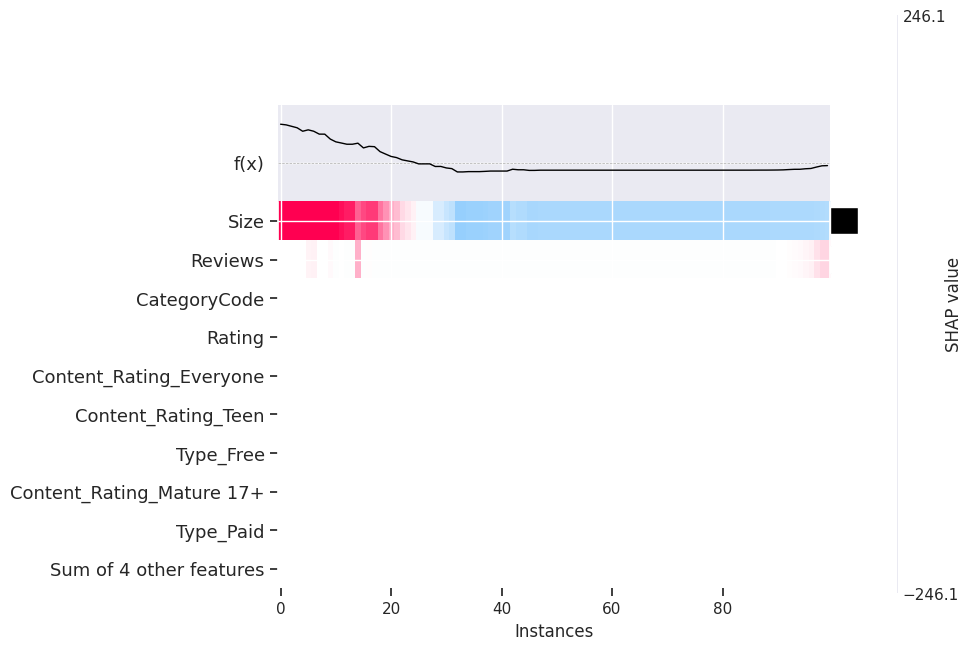

In [ ]:
shap.plots.heatmap(svm_shap_values)  # SHAP HeatMap of a Tree Based Model

# Learning Outcomes
1. I gained knowledge of the entire data science project lifecycle, from data preparation to hyperparameter tweaking.

2. The majority of the time should be spent on data preparation, such as cleaning, normalizing, choosing features, imputed values, etc.

3. The majority of practitioners overlook hyperparameter tweaking, which is the second most crucial step after data preparation. However, the outcome justifies the time spent.

4. Several models must be trained, and the best models should be chosen for deployment because some algorithms are significantly more effective than others at performing certain tasks.

The most valuable lesson from this series of activities is 5.Model Interpretation(Unboxing the Black Blox). Understanding what caused a model to accurately forecast a result has been made simpler by SHAP, LIME, and PDP.

# References
1.https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

2.https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

3.https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Full_ML_Report/Wine-Quality-Analysis.ipynb

4.Chatgpt


# MIT License

Copyright (c) 2023 Yash Panchal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE